# POLICE USE OF FORCE

### 1. Import packages

In [404]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from datetime import datetime
import datetime as dt
import warnings
from wrangling_funcs import get_data_type, category_to_numeric_convertor, get_missing_data, stringdate_to_datetime, get_xpercent_missing_data, get_unique


### 2. Load data

In [405]:
main_records = pd.read_csv('uof_main_records.csv')
indiv_records = pd.read_csv('uof_individual_records.csv')

C:\Users\srafi\AppData\Local\Temp\ipykernel_14908\1981408482.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  main_records = pd.read_csv('uof_main_records.csv')


### 3. Feature Exploration
#### Main Records

In [406]:
pd.options.display.max_columns = None
main_records.head()

,BatchFileName,PoliceServiceType,PoliceService,OPP_PoliceService,IncidentNumber,Date,ApproximateTimeForceApplied,LocationType_ResidentialBuilding,LocationType_NonResidentialBuilding,LocationType_MotorVehicle,LocationType_OpenSpace,LocationType_PublicTransportation,ReportType,TypeTeam,NumberTeam,Attire,AssignmentType,IncidentType,HumaneDestructionAnimal_Distance,HumaneDestructionAnimal_Handgun,HumaneDestructionAnimal_Rifle,HumaneDestructionAnimal_Shotgun,HumaneDestructionAnimal_NumberRoundsDischarged,InteractionType,NumberIndividuals,NumberOtherOfficers,OfficerInvolvedInjuries_PhysicalInjuries,OfficerInvolvedInjuries_Treatment_No,OfficerInvolvedInjuries_Treatment_FirstAid,OfficerInvolvedInjuries_Treatment_MedicalPersonnelScene,OfficerInvolvedInjuries_Treatment_AdmissionMedicalFacility,OfficerInvolvedInjuries_Treatment_MedicalFacility,OfficerInvolvedInjuries_Treatment_Unknown,OfficerInvolvedInjuries_Treatment_Other,NoInteractionIndividual_ReasonUseOfForce_EffectArrest,NoInteractionIndividual_ReasonUseOfForce_PreventOffence,NoInteractionIndividual_ReasonUseOfForce_PreventEscape,NoInteractionIndividual_ReasonUseOfForce_ProtectOtherOfficers,NoInteractionIndividual_ReasonUseOfForce_ProtectPublic,NoInteractionIndividual_ReasonUseOfForce_ProtectSelf,NoInteractionIndividual_ReasonUseOfForce_ProtectIndividual,NoInteractionIndividual_ReasonUseOfForce_Unintentional,NoInteractionIndividual_ReasonUseOfForce_Other,NoInteractionIndividual_TypeForceUsed_CEW_Check,NoInteractionIndividual_TypeForceUsed_CEW_Discharged,NoInteractionIndividual_TypeForceUsed_Firearm_Handgun_Check,NoInteractionIndividual_TypeForceUsed_Firearm_Handgun_Drawn,NoInteractionIndividual_TypeForceUsed_Firearm_Handgun_Discharged,NoInteractionIndividual_TypeForceUsed_Firearm_Rifle_Check,NoInteractionIndividual_TypeForceUsed_Firearm_Rifle_Discharged,NoInteractionIndividual_TypeForceUsed_Firearm_ShotgunLethal_Check,NoInteractionIndividual_TypeForceUsed_Firearm_ShotgunLethal_Discharged,NoIndividualAnimalOnly_ReasonUseOfForce_EffectArrest,NoIndividualAnimalOnly_ReasonUseOfForce_PreventOffence,NoIndividualAnimalOnly_ReasonUseOfForce_PreventEscape,NoIndividualAnimalOnly_ReasonUseOfForce_ProtectOtherOfficers,NoIndividualAnimalOnly_ReasonUseOfForce_ProtectPublic,NoIndividualAnimalOnly_ReasonUseOfForce_ProtectSelf,NoIndividualAnimalOnly_ReasonUseOfForce_ProtectIndividual,NoIndividualAnimalOnly_ReasonUseOfForce_Unintentional,NoIndividualAnimalOnly_ReasonUseOfForce_Other,NoIndividualAnimalOnly_TypeForceUsed_CEW,NoIndividualAnimalOnly_TypeForceUsed_Firearm,Inclusion_SOLGEN_ARA_Analysis
0,418729783,Municipal Police,Guelph,NaN,GUE-517995,2023-03-14,04:37,1.0,NaN,NaN,NaN,NaN,Individual,NaN,NaN,Uniform,"Patrol (e.g., general, foot, bicycle, ATV, sno...",Weapon(s),NaN,NaN,NaN,NaN,NaN,Interaction with Individual(s),2.0,0.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
1,243682269,Municipal Police,Waterloo Regional,NaN,WAT-981704,2023-01-02,01:40,1.0,NaN,NaN,NaN,NaN,Individual,NaN,NaN,Uniform,Tactical,Weapon(s),NaN,NaN,NaN,NaN,NaN,Interaction with Individual(s),1.0,6.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
2,527449862,Municipal Police,Waterloo Regional,NaN,WAT-411772,2023-01-02,23:20,NaN,NaN,NaN,1.0,NaN,Individual,NaN,NaN,Uniform,"Patrol (e.g., general, foot, bicycle, ATV, sno...",Weapon(s),NaN,NaN,NaN,NaN,NaN,Interaction with Individual(s),1.0,3.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
3,159503911,Municipal Police,Peel Regional,NaN,PEL-908442,2023-02-28,08:05,1.0,NaN,NaN,NaN,NaN,Team,Other,5.0,Non-Uniform,"Investigations (CIB, Major Crime)","Executing Warrant (e.g., DNA, arrest, search)",NaN,NaN,NaN,NaN,NaN,Interaction with Individual(s),1.0,5.0,No,NaN,NaN,NaN,NaN,NaN,Na

In [407]:
main_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10935 entries, 0 to 10934
Data columns (total 64 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   BatchFileName                                                           10935 non-null  int64  
 1   PoliceServiceType                                                       10935 non-null  object 
 2   PoliceService                                                           10935 non-null  object 
 3   OPP_PoliceService                                                       2984 non-null   object 
 4   IncidentNumber                                                          10935 non-null  object 
 5   Date                                                                    10935 non-null  object 
 6   ApproximateTimeForceApplied                                             10935 

In [408]:
# Checking numerical values ranges
main_records.describe().T

,count,mean,std,min,25%,50%,75%,max
BatchFileName,10935.0,5.555871e+08,2.582868e+08,100085475.0,335160964.5,557982254.0,781721397.5,999900773.0
LocationType_ResidentialBuilding,4753.0,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,1.0
LocationType_NonResidentialBuilding,1172.0,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,1.0
LocationType_MotorVehicle,835.0,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,1.0
LocationType_OpenSpace,4555.0,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,1.0
LocationType_PublicTransportation,485.0,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,1.0
NumberTeam,1647.0,7.527019e+00,3.475181e+00,2.0,4.0,8.0,10.0,30.0
HumaneDestructionAnimal_Handgun,656.0,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,1.0
HumaneDestructionAnimal_Rifle,269.0,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,1.0
HumaneDestructionAnimal_Shotgun,150.0,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,1.0


#### Individual Records

In [409]:
indiv_records.head()

,BatchFileName,Indiv_Index,Race,DifficultyPerceiving,AgeCategory,Gender,DistanceBetweenOfficerAndIndividual,ReasonUseOfForce_EffectArrest,ReasonUseOfForce_PreventOffence,ReasonUseOfForce_PreventEscape,ReasonUseOfForce_ProtectOtherOfficers,ReasonUseOfForce_ProtectPublic,ReasonUseOfForce_ProtectSelf,ReasonUseOfForce_ProtectIndividual,ReasonUseOfForce_Unintentional,ReasonUseOfForce_Other,FactorsInfluenceResponse_NatureIncident,FactorsInfluenceResponse_PastHistory,FactorsInfluenceResponse_PhysicalSizeStrength,FactorsInfluenceResponse_OtherFactors,IndividualActions_ResistantPassive,IndividualActions_ResistantActive,IndividualActions_Assaultive,IndividualActions_SeriousBodilyHarmDeath,PerceiveAccessWeapon,OfficerResponses_DirectionsToComply,OfficerResponses_Comply,OfficerResponses_AttemptDeescalation,OfficerResponses_DeescalationTechniques_Communication,OfficerResponses_DeescalationTechniques_Containment,OfficerResponses_DeescalationTechniques_Cover,OfficerResponses_DeescalationTechniques_Distance,OfficerResponses_DeescalationTechniques_Repositioning,OfficerResponses_DeescalationTechniques_Teamwork,OfficerResponses_DeescalationTechniques_Time,OfficerResponses_DeescalationTechniques_Other,OfficerResponses_AssistControllingBehaviour,OfficerResponses_Reason_ImminentThreat,OfficerResponses_Reason_ActionRequiredImmediately,OfficerResponses_Reason_DeescalationUsedOtherOfficers,OfficerResponses_Reason_Other,TypeForceUsed_PhysicalControl_Check,TypeForceUsed_PhysicalControl_EscortTechniques,TypeForceUsed_PhysicalControl_Grounding,TypeForceUsed_PhysicalControl_Jointlocks,TypeForceUsed_PhysicalControl_Pinning,TypeForceUsed_PhysicalControl_PressurePoints,TypeForceUsed_PhysicalControl_Strikes,TypeForceUsed_PhysicalControl_Other,TypeForceUsed_PhysicalControl_AssistControllingBehaviour,TypeForceUsed_IntermediateWeapon_Check,TypeForceUsed_IntermediateWeapon_OC_Check,TypeForceUsed_IntermediateWeapon_OC_AssistControllingBehaviour,TypeForceUsed_IntermediateWeapon_Baton_Check,TypeForceUsed_IntermediateWeapon_Baton_Hard,TypeForceUsed_IntermediateWeapon_Baton_Soft,TypeForceUsed_IntermediateWeapon_Baton_AssistControllingBehaviour,TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_Check,TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_AssistControllingBehaviour,TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_WhyNot_CartridgeMalfunction,TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_WhyNot_Disconnect,TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_WhyNot_InsufficientProbeSpread,TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_WhyNot_OperatorError,TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_WhyNot_ProbeMiss,TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_WhyNot_WeaponMalfunction,TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_WhyNot_Other,TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_Drawn,TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_Pointed,TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_Discharged,TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_DeloymentMode_Cartridge,TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_DeloymentMode_DrivePushStun,TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_DeloymentMode_ThreePointContact,TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_DrivePushStunCycles,TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_ThreePointContactCycles,TypeForceUsed_LessLethalFirearm_Check,TypeForceUsed_LessLethalFirearm_Shotgun_Check,TypeForceUsed_LessLethalFirearm_Shotgun_Pointed,TypeForceUsed_LessLethalFirearm_Shotgun_Discharged,TypeForceUsed_LessLethalFirearm_Shotgun_AssistControllingBehaviour,TypeForceUsed_LessLethalFirearm_ExtendedRangeImpactWeapon_Check,TypeForceUsed_LessLethalFirearm_ExtendedRangeImpactWeapon_Pointed,TypeForceUsed_LessLethalFirearm_ExtendedRangeImpactWeapon_Discharged,TypeForceUsed_LessLethalFirearm_ExtendedRangeImpactWeapon_AssistControllingBehaviour,TypeForceUsed_Other_Check,TypeForceUsed_Other_AssistC

In [410]:
indiv_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12805 entries, 0 to 12804
Columns: 112 entries, BatchFileName to IndividualInjuries_Treatment_Other
dtypes: float64(86), int64(2), object(24)
memory usage: 10.9+ MB


In [411]:
pd.options.display.max_rows = None
indiv_records.describe().T

,count,mean,std,min,25%,50%,75%,max
BatchFileName,12805.0,5.536165e+08,2.565705e+08,100085475.0,338263460.0,550955015.0,780620355.0,999900773.0
Indiv_Index,12805.0,1.596330e+00,1.435166e+00,1.0,1.0,1.0,2.0,20.0
ReasonUseOfForce_EffectArrest,10224.0,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,1.0
ReasonUseOfForce_PreventOffence,5273.0,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,1.0
ReasonUseOfForce_PreventEscape,5717.0,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,1.0
ReasonUseOfForce_ProtectOtherOfficers,9973.0,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,1.0
ReasonUseOfForce_ProtectPublic,7634.0,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,1.0
ReasonUseOfForce_ProtectSelf,11206.0,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,1.0
ReasonUseOfForce_ProtectIndividual,3457.0,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,1.0
ReasonUseOfForce_Unintentional,84.0,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,1.0


#### 3.3 Checking for data types

In [412]:
for key in get_data_type(main_records).keys():
    print(key, "\n", get_data_type(main_records)[key])

float64_dtype 
 ['LocationType_ResidentialBuilding', 'LocationType_NonResidentialBuilding', 'LocationType_MotorVehicle', 'LocationType_OpenSpace', 'LocationType_PublicTransportation', 'NumberTeam', 'HumaneDestructionAnimal_Handgun', 'HumaneDestructionAnimal_Rifle', 'HumaneDestructionAnimal_Shotgun', 'HumaneDestructionAnimal_NumberRoundsDischarged', 'NumberIndividuals', 'NumberOtherOfficers', 'OfficerInvolvedInjuries_Treatment_No', 'OfficerInvolvedInjuries_Treatment_FirstAid', 'OfficerInvolvedInjuries_Treatment_MedicalPersonnelScene', 'OfficerInvolvedInjuries_Treatment_AdmissionMedicalFacility', 'OfficerInvolvedInjuries_Treatment_MedicalFacility', 'OfficerInvolvedInjuries_Treatment_Unknown', 'OfficerInvolvedInjuries_Treatment_Other', 'NoInteractionIndividual_ReasonUseOfForce_EffectArrest', 'NoInteractionIndividual_ReasonUseOfForce_PreventOffence', 'NoInteractionIndividual_ReasonUseOfForce_PreventEscape', 'NoInteractionIndividual_ReasonUseOfForce_ProtectOtherOfficers', 'NoInteractionIndi

In [413]:
# a copy of main and individual dataframes
df_main_records = main_records.copy()
df_indiv_records = indiv_records.copy()

### columns check for main records

#### BatchFileName

In [414]:
df_main_records.BatchFileName.nunique() 

10935

##### PoliceServiceType

In [415]:
df_main_records.PoliceServiceType.unique()   # Type of police OOP is outside of Municipal Areas such as Toronto, and GTA, municipal police:Toronto

array(['Municipal Police', 'Ontario Provincial Police'], dtype=object)

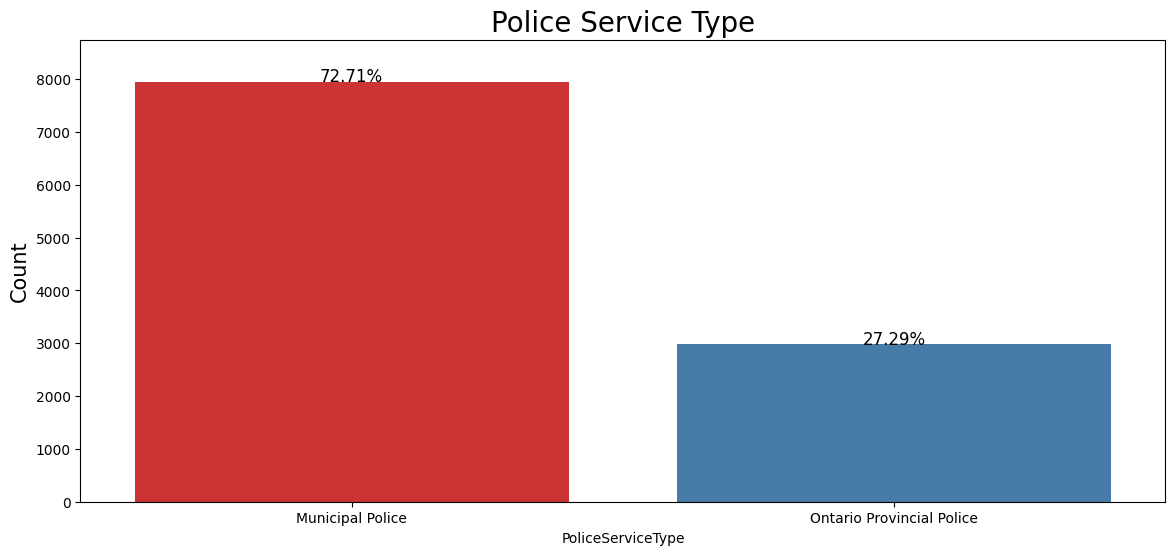

In [790]:
# The frequency of Race
total = df_main_records[~df_main_records['PoliceServiceType'].isnull()].shape[0]

plt.figure(figsize = (14,6))

ax = sns.countplot(x="PoliceServiceType", data=df_main_records, palette="Set1", legend=False, hue = "PoliceServiceType")
ax.set_ylabel("Count", fontsize=15)
ax.set_title("Police Service Type", fontsize=20)
sizes=[]
for p in ax.patches:
    height = p.get_height()
    sizes.append(height)
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
ax.set_ylim(0, max(sizes) * 1.10)

plt.show()

##### PoliceService

In [416]:
df_main_records.PoliceService.unique()   # gives info about the city where the police is using the force

array(['Guelph', 'Waterloo Regional', 'Peel Regional',
       'Ontario Provincial Police', 'Barrie', 'Ottawa', 'Greater Sudbury',
       'Sault Ste. Marie', 'Thunder Bay', 'Peterborough', 'London',
       'West Grey', 'North Bay', 'St. Thomas', 'Hanover', 'Hamilton',
       'Stratford', 'Toronto', 'Chatham-Kent', 'Cornwall', 'La Salle',
       'Brockville', 'South Simcoe', 'Halton Regional', 'Durham Regional',
       'Kingston', 'Windsor', 'Timmins', 'Niagara Regional', 'Sarnia',
       'Gananoque', 'Woodstock', 'Owen Sound', 'Deep River',
       'Saugeen Shores', 'Cobourg', 'Port Hope', 'Brantford',
       'York Regional', 'Smiths Falls', 'Aylmer', 'Kawartha Lakes',
       'Belleville', 'Strathroy-Caradoc'], dtype=object)

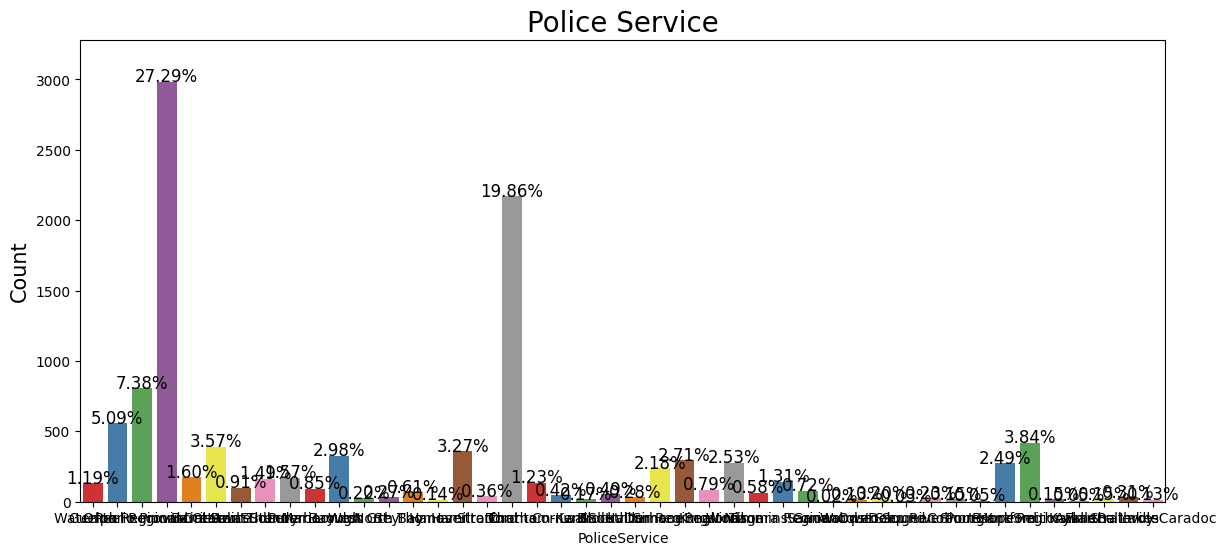

In [789]:
# The frequency of Race
total = df_main_records[~df_main_records['PoliceService'].isnull()].shape[0]

plt.figure(figsize = (14,6))

ax = sns.countplot(x="PoliceService", data=df_main_records, palette="Set1", legend=False, hue = "PoliceService")
ax.set_ylabel("Count", fontsize=15)

ax.set_title("Police Service", fontsize=20)
sizes=[]
for p in ax.patches:
    height = p.get_height()
    sizes.append(height)
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
ax.set_ylim(0, max(sizes) * 1.10)

plt.show()

#### OPP_PoliceService

In [417]:
df_main_records.OPP_PoliceService.unique()  

array([nan, 'North West Region', 'General Headquarters',
       'North East Region', 'Central Region', 'West Region',
       'Highway Safety Division', 'East Region'], dtype=object)

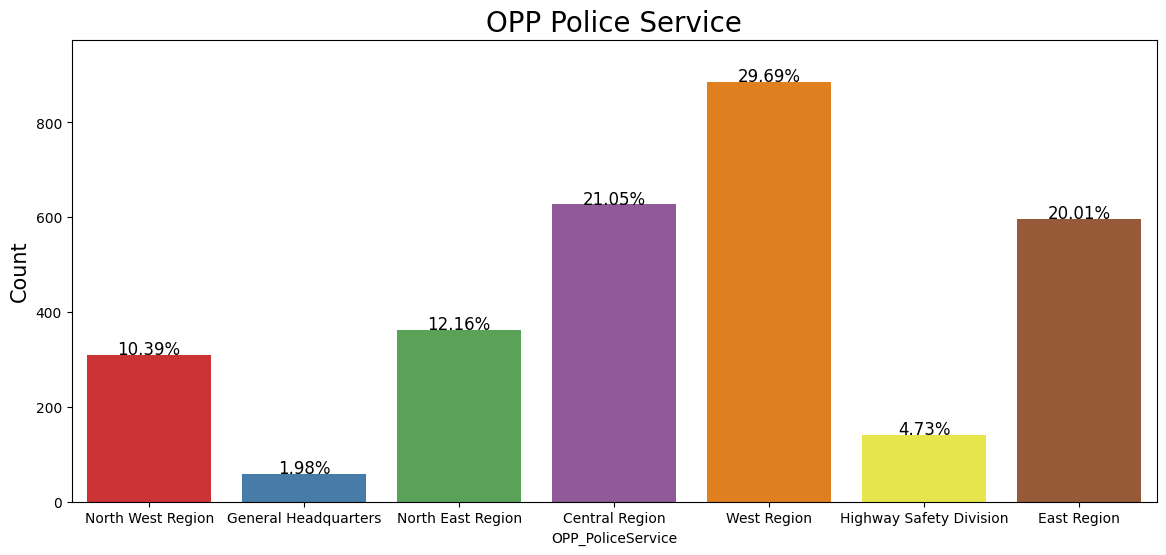

In [783]:
# The frequency of Race
total = df_main_records[~df_main_records['OPP_PoliceService'].isnull()].shape[0]

plt.figure(figsize = (14,6))

ax = sns.countplot(x="OPP_PoliceService", data=df_main_records, palette="Set1", legend=False, hue = "OPP_PoliceService")
ax.set_ylabel("Count", fontsize=15)
ax.set_title("OPP Police Service", fontsize=20)
sizes=[]
for p in ax.patches:
    height = p.get_height()
    sizes.append(height)
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
ax.set_ylim(0, max(sizes) * 1.10)

plt.show()

#### IncidentNumber

In [418]:
df_main_records.IncidentNumber.nunique() 

7635

#### ReportType

In [419]:
df_main_records.ReportType.unique()  

array(['Individual', 'Team'], dtype=object)

#### TypeTeam

In [420]:
df_main_records.TypeTeam.unique()  # Team of the police involved

array([nan, 'Other', 'Hostage Rescue Team', 'Tactical Team',
       'Containment Team', 'Major Crime Unit', 'Drug Enforcement Unit',
       'Canine Unit', 'Public Order Unit', 'Mobile Surveillance Unit',
       'Guns and Gangs Unit', 'Apprehension Squad'], dtype=object)

#### NumberTeam

In [421]:
df_main_records.NumberTeam.unique()

array([nan,  5.,  2.,  9., 14., 11., 10.,  4.,  3., 12.,  8.,  7.,  6.,
       15., 13., 17., 16., 30., 18.])

#### Attire

In [422]:
df_main_records.Attire.unique()

array(['Uniform', 'Non-Uniform'], dtype=object)

#### AssignmentType

In [423]:
df_main_records.AssignmentType.unique()

array(['Patrol (e.g., general, foot, bicycle, ATV, snowmobile) ',
       'Tactical', 'Investigations (CIB, Major Crime)', 'Drugs', 'Other',
       'Prisoner Transportation/Care/Control',
       'Guns and Gangs, ROPE, Other Specialized Units', 'Traffic',
       'Targeted Community Response Units/Hostage Rescue', 'Canine',
       'Containment', 'Paid Duty', 'Administrative (e.g., station duty)',
       'Marine', 'Court Appearance', 'Off Duty', 'Public Order',
       'Court Security'], dtype=object)

#### IncidentType

In [424]:
df_main_records.IncidentType.unique()

array(['Weapon(s)', 'Executing Warrant (e.g., DNA, arrest, search)',
       'Assisting Other Police Service/Agency (e.g., EMS, animal welfare inspectors)',
       'Barricaded Individual/Disturbance/Individual in Crisis/Wellness/Safety Check',
       'Family/Neighbour/Other Type of Dispute',
       'Other Federal/Provincial Statutes (e.g., LLA)',
       'Traffic (e.g., RIDE, vehicle collision)',
       'Violent Crime (including Intimate Partner Violence)',
       'Active Attacker',
       'Police Custody Related (e.g. prisoner control, fingerprinting, lock-up area)',
       'Person Stop', 'Stolen Vehicle',
       'Investigation (follow-up, ongoing)', 'Property Crime', 'Alarm',
       'Public Order', 'Animal Complaint', 'Humane Destruction of Animal'],
      dtype=object)

In [425]:
get_unique(df_main_records, 'IncidentType')

({'IncidentType': array(['Weapon(s)', 'Executing Warrant (e.g., DNA, arrest, search)',
         'Assisting Other Police Service/Agency (e.g., EMS, animal welfare inspectors)',
         'Barricaded Individual/Disturbance/Individual in Crisis/Wellness/Safety Check',
         'Family/Neighbour/Other Type of Dispute',
         'Other Federal/Provincial Statutes (e.g., LLA)',
         'Traffic (e.g., RIDE, vehicle collision)',
         'Violent Crime (including Intimate Partner Violence)',
         'Active Attacker',
         'Police Custody Related (e.g. prisoner control, fingerprinting, lock-up area)',
         'Person Stop', 'Stolen Vehicle',
         'Investigation (follow-up, ongoing)', 'Property Crime', 'Alarm',
         'Public Order', 'Animal Complaint', 'Humane Destruction of Animal'],
        dtype=object)},
 {'IncidentType': 18})

#### LocationType

In [426]:
import re
def add_space_before_capitals(text):
    # Use regex to find capitals and add space before them
    modified_text = re.sub(r'(?<!^)(?=[A-Z])', ' ', text)
    return modified_text

In [427]:
get_unique(df_main_records, 'LocationType')

({'LocationType_ResidentialBuilding': array([ 1., nan]),
  'LocationType_NonResidentialBuilding': array([nan,  1.]),
  'LocationType_MotorVehicle': array([nan,  1.]),
  'LocationType_OpenSpace': array([nan,  1.]),
  'LocationType_PublicTransportation': array([nan,  1.])},
 {'LocationType_ResidentialBuilding': 1,
  'LocationType_NonResidentialBuilding': 1,
  'LocationType_MotorVehicle': 1,
  'LocationType_OpenSpace': 1,
  'LocationType_PublicTransportation': 1})

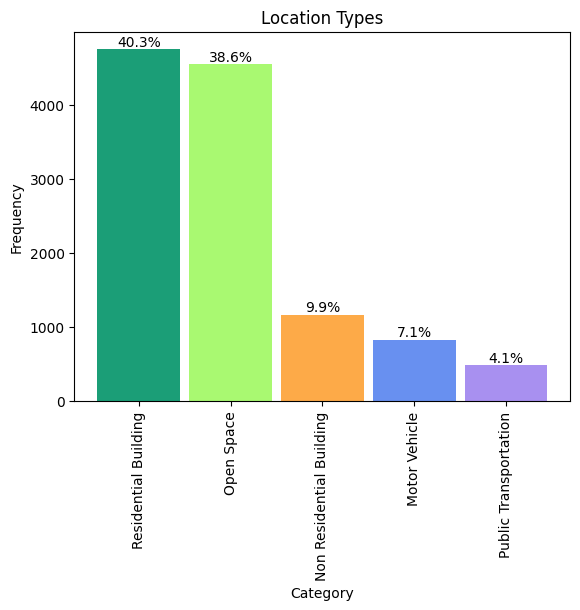

In [429]:
LocationTypecols = list(get_unique(df_main_records, 'LocationType')[0].keys())
# Sum the occurrence of each category
category_counts = df_main_records[LocationTypecols].sum().sort_values(ascending=False)
category_counts_index = [add_space_before_capitals(item.split('_')[1]) for item in category_counts.index]
category_counts.index = category_counts_index

# Plot 
fig, ax = plt.subplots()
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0']
category_counts.plot(kind='bar', color=colors, width = 0.9)
plt.title('Location Types')
plt.xlabel('Category')
plt.ylabel('Frequency')

category_counts['val'] = category_counts.apply(lambda x: (x/category_counts.sum())*100)
labels = category_counts['val'].round(1).astype('str') + '%'
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    #ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()


#### OfficerInvolvedInjury

In [430]:
get_unique(df_main_records, 'OfficerInvolvedInjuries')

({'OfficerInvolvedInjuries_PhysicalInjuries': array(['No', 'Yes', nan], dtype=object),
  'OfficerInvolvedInjuries_Treatment_No': array([nan,  1.]),
  'OfficerInvolvedInjuries_Treatment_FirstAid': array([nan,  1.]),
  'OfficerInvolvedInjuries_Treatment_MedicalPersonnelScene': array([nan,  1.]),
  'OfficerInvolvedInjuries_Treatment_AdmissionMedicalFacility': array([nan,  1.]),
  'OfficerInvolvedInjuries_Treatment_MedicalFacility': array([nan,  1.]),
  'OfficerInvolvedInjuries_Treatment_Unknown': array([nan,  1.]),
  'OfficerInvolvedInjuries_Treatment_Other': array([nan,  1.])},
 {'OfficerInvolvedInjuries_PhysicalInjuries': 2,
  'OfficerInvolvedInjuries_Treatment_No': 1,
  'OfficerInvolvedInjuries_Treatment_FirstAid': 1,
  'OfficerInvolvedInjuries_Treatment_MedicalPersonnelScene': 1,
  'OfficerInvolvedInjuries_Treatment_AdmissionMedicalFacility': 1,
  'OfficerInvolvedInjuries_Treatment_MedicalFacility': 1,
  'OfficerInvolvedInjuries_Treatment_Unknown': 1,
  'OfficerInvolvedInjuries_Treatm

In [431]:
category_counts = df_main_records.groupby(by='OfficerInvolvedInjuries_PhysicalInjuries')['OfficerInvolvedInjuries_PhysicalInjuries'].count().sort_values(ascending=False)

In [432]:
category_counts

OfficerInvolvedInjuries_PhysicalInjuries
No     8032
Yes     196
Name: OfficerInvolvedInjuries_PhysicalInjuries, dtype: int64

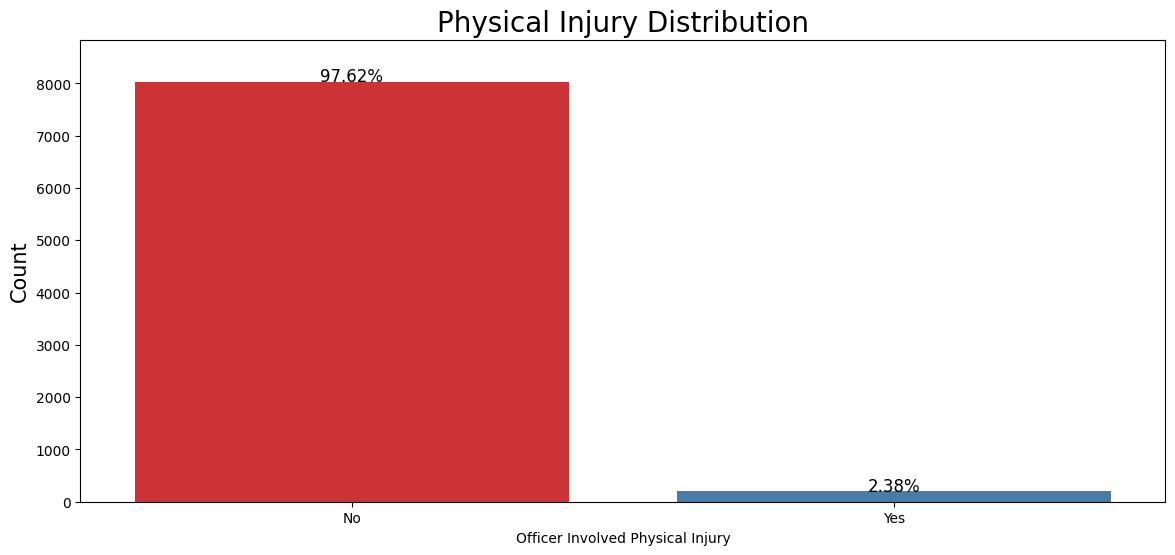

In [776]:
# The frequency of physical injury
#category_counts = df_main_records.groupby(by='OfficerInvolvedInjuries_PhysicalInjuries')['OfficerInvolvedInjuries_PhysicalInjuries'].count().sort_values(ascending=False)
total = df_main_records[~df_main_records['OfficerInvolvedInjuries_PhysicalInjuries'].isnull()].shape[0]

plt.figure(figsize = (14,6))

ax = sns.countplot(x="OfficerInvolvedInjuries_PhysicalInjuries", data=df_main_records, palette="Set1", legend=False, hue = "OfficerInvolvedInjuries_PhysicalInjuries")
#ax.set_xticklabels(ax.get_xticklabels(),rotation=45, fontsize=14)
#ax.set_xlabel("Loan Status Categories", fontsize=14)
ax.set_ylabel("Count", fontsize=15)
ax.set_xlabel('Officer Involved Physical Injury')
ax.set_title("Physical Injury Distribution", fontsize=20)
sizes=[]
for p in ax.patches:
    height = p.get_height()
    sizes.append(height)
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
ax.set_ylim(0, max(sizes) * 1.10)

plt.show()

##### If officer had a physical injury, what treatment was used?

In [434]:
OfficerInvolvedInjury_Treatmentcols = list(get_unique(df_main_records, 'OfficerInvolvedInjuries_Treatment')[0].keys())
OfficerInvolvedInjury_Treatmentcols

['OfficerInvolvedInjuries_Treatment_No',
 'OfficerInvolvedInjuries_Treatment_FirstAid',
 'OfficerInvolvedInjuries_Treatment_MedicalPersonnelScene',
 'OfficerInvolvedInjuries_Treatment_AdmissionMedicalFacility',
 'OfficerInvolvedInjuries_Treatment_MedicalFacility',
 'OfficerInvolvedInjuries_Treatment_Unknown',
 'OfficerInvolvedInjuries_Treatment_Other']

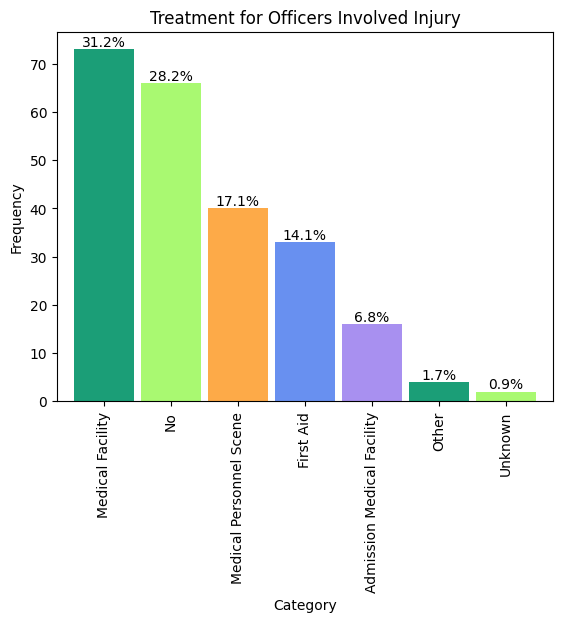

In [435]:
# Sum the occurrence of each category
#category_counts = df_main_records[df_main_records['OfficerInvolvedInjuries_PhysicalInjuries']=='Yes'][OfficerInvolvedInjury_Treatmentcols].sum().sort_values(ascending=False)
category_counts = df_main_records[OfficerInvolvedInjury_Treatmentcols].sum().sort_values(ascending=False)
category_counts_index = [add_space_before_capitals(item.split('OfficerInvolvedInjuries_Treatment_')[1]) for item in category_counts.index]
# for between two _ we use this code s.split('_')[1].split('_')[0].strip('.')
category_counts.index = category_counts_index

# Plot
fig, ax = plt.subplots()
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0']
category_counts.plot(kind='bar', color=colors, width = 0.9)
plt.title('Treatment for Officers Involved Injury')
plt.xlabel('Category')
plt.ylabel('Frequency')

''''
total = len(category_counts)
sizes=[]
for p in ax.patches:
    height = p.get_height()
    sizes.append(height)
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
ax.set_ylim(0, max(sizes) * 1.10)
'''

category_counts['val'] = category_counts.apply(lambda x: (x/category_counts.sum())*100)
labels = category_counts['val'].round(1).astype('str') + '%'
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    #ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()

In [436]:
# combining Medical Facility and Admission Medical Facility
MedicalFacilitycols = [item for item in OfficerInvolvedInjury_Treatmentcols if "MedicalFacility" in item]
MedicalFacilitycols

['OfficerInvolvedInjuries_Treatment_AdmissionMedicalFacility',
 'OfficerInvolvedInjuries_Treatment_MedicalFacility']

In [437]:
# Adding the two columns
df_main_records['OfficerInvolvedInjuries_Treatment_MedicalFacilityandAdmissionMedicalFacilityCombined'] = df_main_records['OfficerInvolvedInjuries_Treatment_AdmissionMedicalFacility'].fillna(0) + df_main_records['OfficerInvolvedInjuries_Treatment_MedicalFacility'].fillna(0)
#a.drop(columns=['OfficerInvolvedInjuries_Treatment_AdmissionMedicalFacility',  'OfficerInvolvedInjuries_Treatment_MedicalFacility'], inplace=True)

In [438]:
# combining other and unknown
UnknownOthercols = [item for item in OfficerInvolvedInjury_Treatmentcols if "Unknown"  in item or "Other" in item]
UnknownOthercols

['OfficerInvolvedInjuries_Treatment_Unknown',
 'OfficerInvolvedInjuries_Treatment_Other']

In [439]:
df_main_records['OfficerInvolvedInjuries_Treatment_UnknownandOtherCombined'] = df_main_records['OfficerInvolvedInjuries_Treatment_Unknown'].fillna(0) + df_main_records['OfficerInvolvedInjuries_Treatment_Other'].fillna(0)

In [440]:
OfficerInvolvedInjury_Treatmentcols = list(get_unique(df_main_records, 'OfficerInvolvedInjuries_Treatment')[0].keys())
OfficerInvolvedInjury_Treatmentcols_shortened = [item for item in OfficerInvolvedInjury_Treatmentcols if item not in ['OfficerInvolvedInjuries_Treatment_AdmissionMedicalFacility', 'OfficerInvolvedInjuries_Treatment_MedicalFacility', 'OfficerInvolvedInjuries_Treatment_Unknown', 'OfficerInvolvedInjuries_Treatment_Other']]

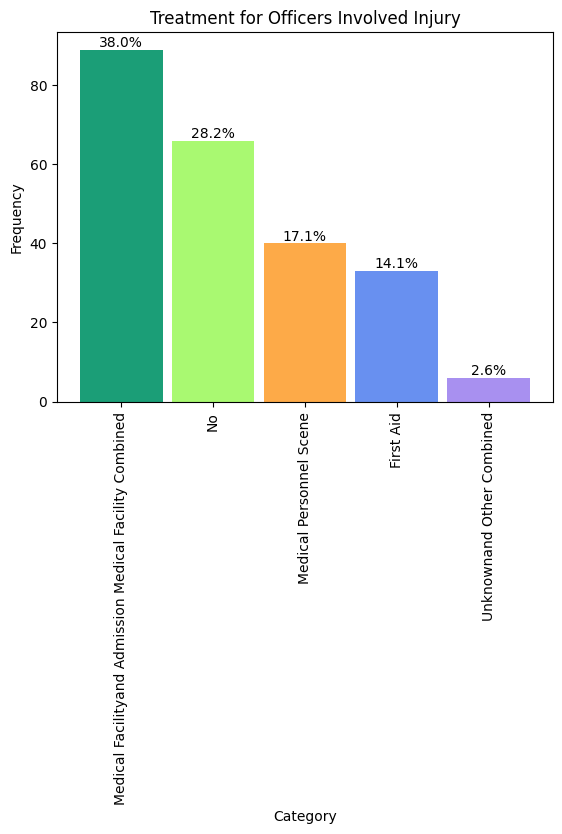

In [441]:
# Sum the occurrence of each category
#category_counts = df_main_records[df_main_records['OfficerInvolvedInjuries_PhysicalInjuries']=='Yes'][OfficerInvolvedInjury_Treatmentcols].sum().sort_values(ascending=False)
#https://stackoverflow.com/questions/73674585/pandas-matplotlib-labels-bars-as-percentage
category_counts = df_main_records[OfficerInvolvedInjury_Treatmentcols_shortened].sum().sort_values(ascending=False)
category_counts_index = [add_space_before_capitals(item.split('OfficerInvolvedInjuries_Treatment_')[1]) for item in category_counts.index]
# for between two _ we use this code s.split('_')[1].split('_')[0].strip('.')
category_counts.index = category_counts_index

# Plot
fig, ax = plt.subplots()
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0']
category_counts.plot(kind='bar', color=colors, width = 0.9)
plt.title('Treatment for Officers Involved Injury')
plt.xlabel('Category')
plt.ylabel('Frequency')

category_counts['val'] = category_counts.apply(lambda x: (x/category_counts.sum())*100)
labels = category_counts['val'].round(1).astype('str') + '%'
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    #ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()

#### NoInteractionIndividualReasonUseOfForce 

In [442]:
get_unique(df_main_records, 'NoInteractionIndividual_ReasonUseOfForce')

({'NoInteractionIndividual_ReasonUseOfForce_EffectArrest': array([nan,  1.]),
  'NoInteractionIndividual_ReasonUseOfForce_PreventOffence': array([nan,  1.]),
  'NoInteractionIndividual_ReasonUseOfForce_PreventEscape': array([nan,  1.]),
  'NoInteractionIndividual_ReasonUseOfForce_ProtectOtherOfficers': array([nan,  1.]),
  'NoInteractionIndividual_ReasonUseOfForce_ProtectPublic': array([nan,  1.]),
  'NoInteractionIndividual_ReasonUseOfForce_ProtectSelf': array([nan,  1.]),
  'NoInteractionIndividual_ReasonUseOfForce_ProtectIndividual': array([nan,  1.]),
  'NoInteractionIndividual_ReasonUseOfForce_Unintentional': array([nan,  1.]),
  'NoInteractionIndividual_ReasonUseOfForce_Other': array([nan,  1.])},
 {'NoInteractionIndividual_ReasonUseOfForce_EffectArrest': 1,
  'NoInteractionIndividual_ReasonUseOfForce_PreventOffence': 1,
  'NoInteractionIndividual_ReasonUseOfForce_PreventEscape': 1,
  'NoInteractionIndividual_ReasonUseOfForce_ProtectOtherOfficers': 1,
  'NoInteractionIndividual_R

In [443]:
NoInteractionIndividual_ReasonUseOfForcecols = list(get_unique(df_main_records, 'NoInteractionIndividual_ReasonUseOfForce')[0].keys())

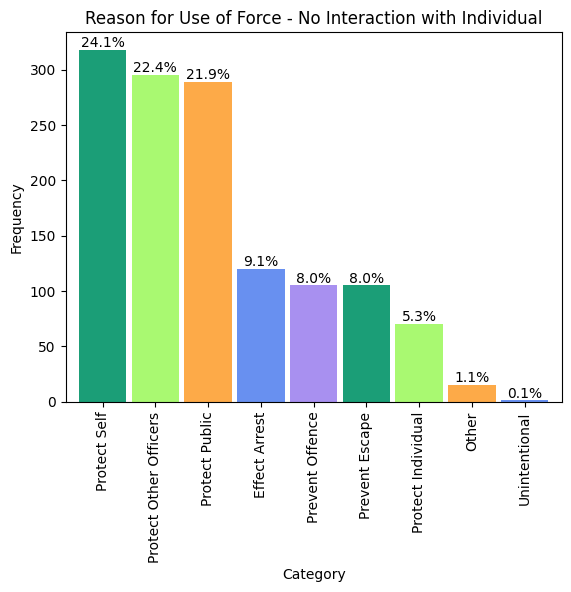

In [444]:
# Sum the occurrence of each category
category_counts = df_main_records[NoInteractionIndividual_ReasonUseOfForcecols].sum().sort_values(ascending=False)
category_counts_index = [add_space_before_capitals(item.split('NoInteractionIndividual_ReasonUseOfForce_')[1]) for item in category_counts.index]
# for between two _ we use this code s.split('_')[1].split('_')[0].strip('.')
category_counts.index = category_counts_index

# Plot
fig, ax = plt.subplots()
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0']
category_counts.plot(kind='bar', color=colors, width = 0.9)
plt.title('Reason for Use of Force - No Interaction with Individual')
plt.xlabel('Category')
plt.ylabel('Frequency')

category_counts['val'] = category_counts.apply(lambda x: (x/category_counts.sum())*100)
labels = category_counts['val'].round(1).astype('str') + '%'
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    #ax.yaxis.set_major_formatter(mtick.PercentFormatter()) 
    
plt.show()

#### NoInteractionIndividual_TypeForceUsed 

In [445]:
get_unique(df_main_records, 'NoInteractionIndividual_TypeForceUsed')

({'NoInteractionIndividual_TypeForceUsed_CEW_Check': array([nan,  1.]),
  'NoInteractionIndividual_TypeForceUsed_CEW_Discharged': array([nan,  1.]),
  'NoInteractionIndividual_TypeForceUsed_Firearm_Handgun_Check': array([nan,  1.]),
  'NoInteractionIndividual_TypeForceUsed_Firearm_Handgun_Drawn': array([nan,  1.]),
  'NoInteractionIndividual_TypeForceUsed_Firearm_Handgun_Discharged': array([nan]),
  'NoInteractionIndividual_TypeForceUsed_Firearm_Rifle_Check': array([nan,  1.]),
  'NoInteractionIndividual_TypeForceUsed_Firearm_Rifle_Discharged': array([nan]),
  'NoInteractionIndividual_TypeForceUsed_Firearm_ShotgunLethal_Check': array([nan]),
  'NoInteractionIndividual_TypeForceUsed_Firearm_ShotgunLethal_Discharged': array([nan])},
 {'NoInteractionIndividual_TypeForceUsed_CEW_Check': 1,
  'NoInteractionIndividual_TypeForceUsed_CEW_Discharged': 1,
  'NoInteractionIndividual_TypeForceUsed_Firearm_Handgun_Check': 1,
  'NoInteractionIndividual_TypeForceUsed_Firearm_Handgun_Drawn': 1,
  'NoI

In [446]:
NoInteractionIndividual_TypeForceUsedcols = list(get_unique(df_main_records, 'NoInteractionIndividual_TypeForceUsed')[0].keys())

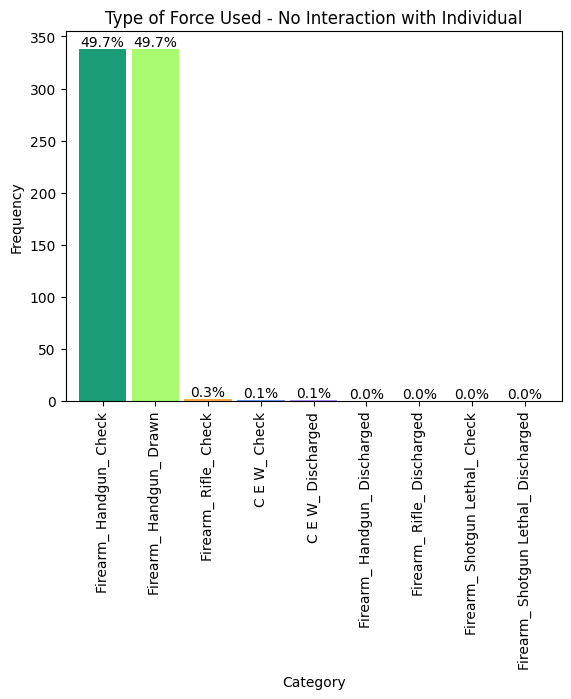

In [447]:
# Sum the occurrence of each category
category_counts = df_main_records[NoInteractionIndividual_TypeForceUsedcols].sum().sort_values(ascending=False)
category_counts_index = [add_space_before_capitals(item.split('NoInteractionIndividual_TypeForceUsed_')[1]) for item in category_counts.index]
# for between two _ we use this code s.split('_')[1].split('_')[0].strip('.')
category_counts.index = category_counts_index

# Plot
fig, ax = plt.subplots()
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0']
category_counts.plot(kind='bar', color=colors, width = 0.9)
plt.title('Type of Force Used - No Interaction with Individual')
plt.xlabel('Category')
plt.ylabel('Frequency')

category_counts['val'] = category_counts.apply(lambda x: (x/category_counts.sum())*100)
labels = category_counts['val'].round(1).astype('str') + '%'
for container in ax.containers:
    ax.bar_label(container, labels=labels)
   # ax.yaxis.set_major_formatter(mtick.PercentFormatter()) 
plt.show()

#### NoIndividualAnimalOnly_ReasonUseOfForce

In [699]:
get_unique(df_main_records, 'NoIndividualAnimalOnly_ReasonUseOfForce')

({'NoIndividualAnimalOnly_ReasonUseOfForce_EffectArrest': array([nan,  1.]),
  'NoIndividualAnimalOnly_ReasonUseOfForce_PreventOffence': array([nan,  1.]),
  'NoIndividualAnimalOnly_ReasonUseOfForce_PreventEscape': array([nan,  1.]),
  'NoIndividualAnimalOnly_ReasonUseOfForce_ProtectOtherOfficers': array([nan,  1.]),
  'NoIndividualAnimalOnly_ReasonUseOfForce_ProtectPublic': array([nan,  1.]),
  'NoIndividualAnimalOnly_ReasonUseOfForce_ProtectSelf': array([nan,  1.]),
  'NoIndividualAnimalOnly_ReasonUseOfForce_ProtectIndividual': array([nan,  1.]),
  'NoIndividualAnimalOnly_ReasonUseOfForce_Unintentional': array([nan]),
  'NoIndividualAnimalOnly_ReasonUseOfForce_Other': array([nan,  1.])},
 {'NoIndividualAnimalOnly_ReasonUseOfForce_EffectArrest': 1,
  'NoIndividualAnimalOnly_ReasonUseOfForce_PreventOffence': 1,
  'NoIndividualAnimalOnly_ReasonUseOfForce_PreventEscape': 1,
  'NoIndividualAnimalOnly_ReasonUseOfForce_ProtectOtherOfficers': 1,
  'NoIndividualAnimalOnly_ReasonUseOfForce_Pro

In [449]:
NoIndividualAnimalOnly_ReasonUseOfForcecols = list(get_unique(df_main_records, 'NoIndividualAnimalOnly_ReasonUseOfForce')[0].keys())

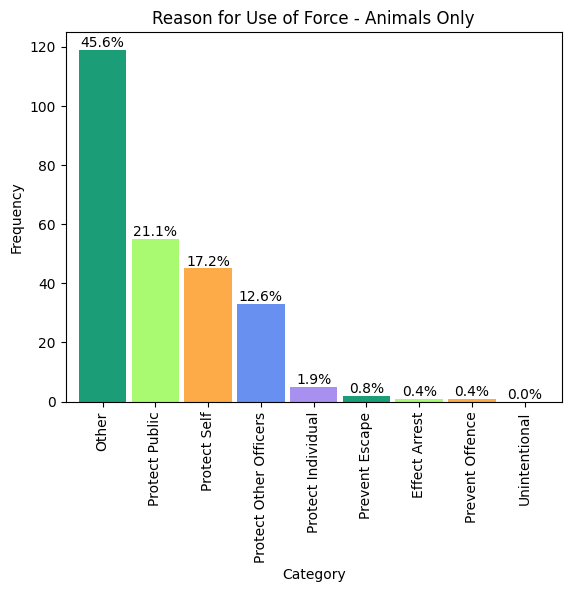

In [450]:
# Sum the occurrence of each category
category_counts = df_main_records[NoIndividualAnimalOnly_ReasonUseOfForcecols].sum().sort_values(ascending=False)
category_counts_index = [add_space_before_capitals(item.split('NoIndividualAnimalOnly_ReasonUseOfForce_')[1]) for item in category_counts.index]
# for between two _ we use this code s.split('_')[1].split('_')[0].strip('.')
category_counts.index = category_counts_index

# Plot
fig, ax = plt.subplots()
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0']
category_counts.plot(kind='bar', color=colors, width = 0.9)
plt.title('Reason for Use of Force - Animals Only')
plt.xlabel('Category')
plt.ylabel('Frequency')

category_counts['val'] = category_counts.apply(lambda x: (x/category_counts.sum())*100)
labels = category_counts['val'].round(1).astype('str') + '%'
for container in ax.containers:
    ax.bar_label(container, labels=labels)

plt.show()

#### NoIndividualAnimalOnly_TypeForceUsed

In [451]:
get_unique(df_main_records, 'NoIndividualAnimalOnly_TypeForceUsed')

({'NoIndividualAnimalOnly_TypeForceUsed_CEW': array([nan,  1.]),
  'NoIndividualAnimalOnly_TypeForceUsed_Firearm': array([nan,  1.])},
 {'NoIndividualAnimalOnly_TypeForceUsed_CEW': 1,
  'NoIndividualAnimalOnly_TypeForceUsed_Firearm': 1})

In [452]:
NoIndividualAnimalOnly_TypeForceUsedcols = list(get_unique(df_main_records, 'NoIndividualAnimalOnly_TypeForceUsed')[0].keys())

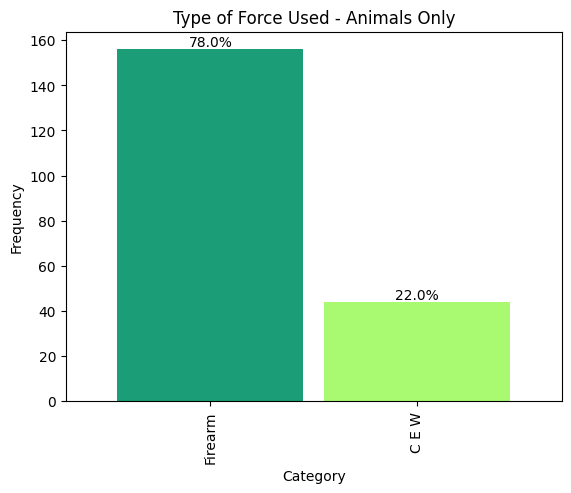

In [453]:
category_counts = df_main_records[NoIndividualAnimalOnly_TypeForceUsedcols].sum().sort_values(ascending=False)
category_counts_index = [add_space_before_capitals(item.split('NoIndividualAnimalOnly_TypeForceUsed_')[1]) for item in category_counts.index]
# for between two _ we use this code s.split('_')[1].split('_')[0].strip('.')
category_counts.index = category_counts_index

# Plot
fig, ax = plt.subplots()
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0']
category_counts.plot(kind='bar', color=colors, width = 0.9)
plt.title('Type of Force Used - Animals Only')
plt.xlabel('Category')
plt.ylabel('Frequency')

category_counts['val'] = category_counts.apply(lambda x: (x/category_counts.sum())*100)
labels = category_counts['val'].round(1).astype('str') + '%'
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    #ax.yaxis.set_major_formatter(mtick.PercentFormatter()) 
plt.show()

#### HumaneDestructionAnimals

In [454]:
category_counts

Firearm                                             156.0
C E W                                                44.0
val        Firearm    78.0
C E W      22.0
dtype: float64
dtype: object

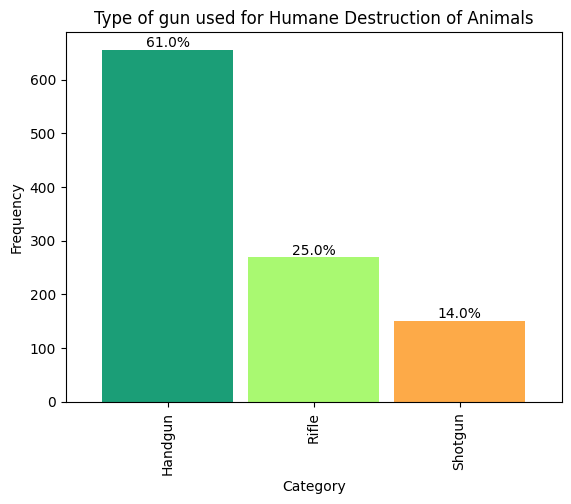

In [455]:
HumaneDestructionAnimal_guncols = ['HumaneDestructionAnimal_Handgun', 'HumaneDestructionAnimal_Rifle',  'HumaneDestructionAnimal_Shotgun']
# Sum the occurrence of each category
category_counts = df_main_records[HumaneDestructionAnimal_guncols].sum().sort_values(ascending=False)
category_counts_index = [add_space_before_capitals(item.split('HumaneDestructionAnimal_')[1]) for item in category_counts.index]
# for between two _ we use this code s.split('_')[1].split('_')[0].strip('.')
category_counts.index = category_counts_index

# Plot
fig, ax = plt.subplots()
colors = ['#1b9e77', '#a9f971', '#fdaa48']
category_counts.plot(kind='bar', color=colors, width = 0.9)
plt.title('Type of gun used for Humane Destruction of Animals')
plt.xlabel('Category')
plt.ylabel('Frequency')

category_counts['val'] = category_counts.apply(lambda x: (x/category_counts.sum())*100)
labels = category_counts['val'].round(1).astype('str') + '%'
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    #ax.yaxis.set_major_formatter(mtick.PercentFormatter()) 
plt.show()

In [456]:
get_unique(df_main_records, 'HumaneDestructionAnimal')

({'HumaneDestructionAnimal_Distance': array([nan, 'Greater than 7 metres (approx. 23 ft)',
         'Less than 3 metres (approx. 10ft)',
         '3 to 7 Metres (approx. 10 to 23 ft)'], dtype=object),
  'HumaneDestructionAnimal_Handgun': array([nan,  1.]),
  'HumaneDestructionAnimal_Rifle': array([nan,  1.]),
  'HumaneDestructionAnimal_Shotgun': array([nan,  1.]),
  'HumaneDestructionAnimal_NumberRoundsDischarged': array([nan,  2.,  3.,  4.,  1.,  5.,  6., 10.,  7., 13.,  0.])},
 {'HumaneDestructionAnimal_Distance': 3,
  'HumaneDestructionAnimal_Handgun': 1,
  'HumaneDestructionAnimal_Rifle': 1,
  'HumaneDestructionAnimal_Shotgun': 1,
  'HumaneDestructionAnimal_NumberRoundsDischarged': 10})

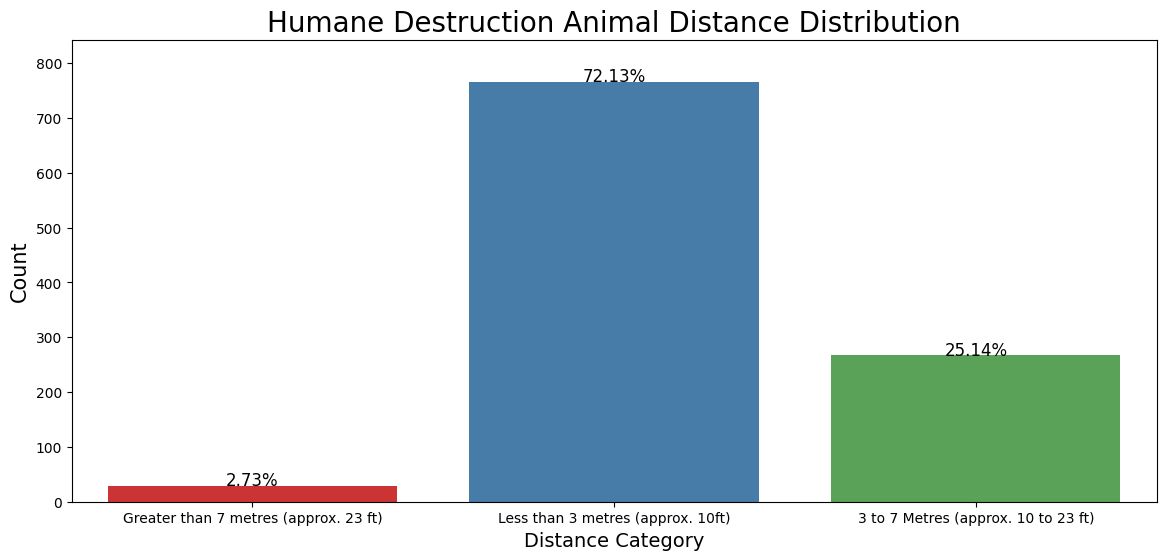

In [457]:
total = np.sum(df_main_records['HumaneDestructionAnimal_Distance'].count())

plt.figure(figsize = (14,6))

ax = sns.countplot(x="HumaneDestructionAnimal_Distance", data=df_main_records, palette="Set1", legend=False, hue = "HumaneDestructionAnimal_Distance")
ax.set_xlabel("Distance Category", fontsize=14)
ax.set_ylabel("Count", fontsize=15)
ax.set_title("Humane Destruction Animal Distance Distribution", fontsize=20)
sizes=[]
for p in ax.patches:
    height = p.get_height()
    sizes.append(height)
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
ax.set_ylim(0, max(sizes) * 1.10)

plt.show()

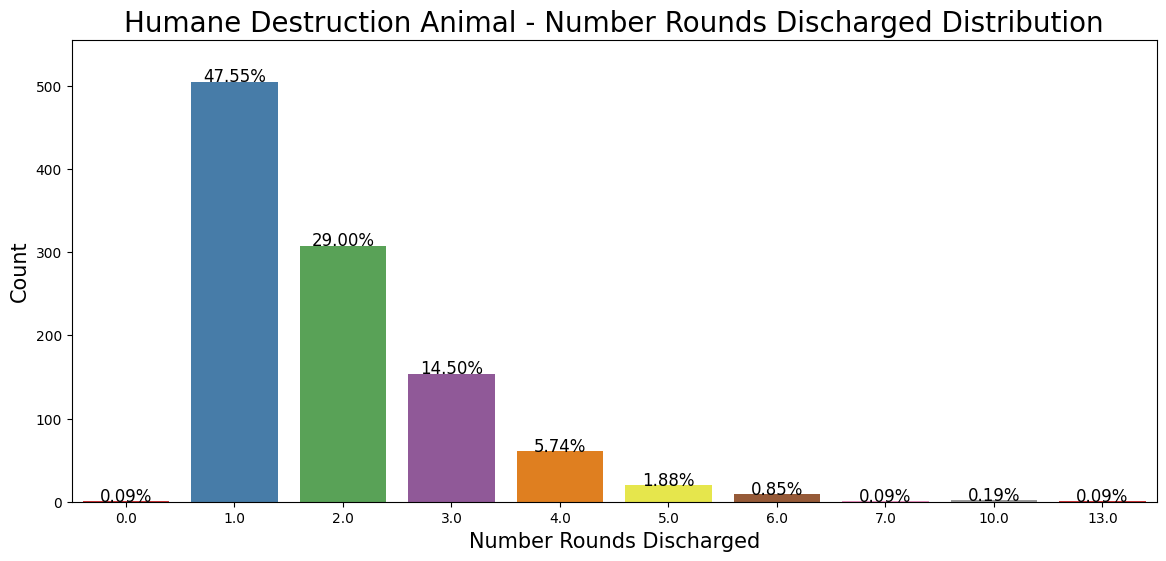

In [458]:

total = np.sum(df_main_records['HumaneDestructionAnimal_NumberRoundsDischarged'].count())

plt.figure(figsize = (14,6))

ax = sns.countplot(x="HumaneDestructionAnimal_NumberRoundsDischarged", data=df_main_records, palette="Set1", legend=False, hue = "HumaneDestructionAnimal_NumberRoundsDischarged")
#ax.set_xticklabels(ax.get_xticklabels(),rotation=45, fontsize=14)
#ax.set_xlabel("Loan Status Categories", fontsize=14)
ax.set_ylabel("Count", fontsize=15)
ax.set_xlabel('Number Rounds Discharged', fontsize=15)
ax.set_title("Humane Destruction Animal - Number Rounds Discharged Distribution", fontsize=20)
sizes=[]
for p in ax.patches:
    height = p.get_height()
    sizes.append(height)
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
ax.set_ylim(0, max(sizes) * 1.10)

plt.show()

## Individual Records All

In [459]:
df_indiv_records.head()

,BatchFileName,Indiv_Index,Race,DifficultyPerceiving,AgeCategory,Gender,DistanceBetweenOfficerAndIndividual,ReasonUseOfForce_EffectArrest,ReasonUseOfForce_PreventOffence,ReasonUseOfForce_PreventEscape,ReasonUseOfForce_ProtectOtherOfficers,ReasonUseOfForce_ProtectPublic,ReasonUseOfForce_ProtectSelf,ReasonUseOfForce_ProtectIndividual,ReasonUseOfForce_Unintentional,ReasonUseOfForce_Other,FactorsInfluenceResponse_NatureIncident,FactorsInfluenceResponse_PastHistory,FactorsInfluenceResponse_PhysicalSizeStrength,FactorsInfluenceResponse_OtherFactors,IndividualActions_ResistantPassive,IndividualActions_ResistantActive,IndividualActions_Assaultive,IndividualActions_SeriousBodilyHarmDeath,PerceiveAccessWeapon,OfficerResponses_DirectionsToComply,OfficerResponses_Comply,OfficerResponses_AttemptDeescalation,OfficerResponses_DeescalationTechniques_Communication,OfficerResponses_DeescalationTechniques_Containment,OfficerResponses_DeescalationTechniques_Cover,OfficerResponses_DeescalationTechniques_Distance,OfficerResponses_DeescalationTechniques_Repositioning,OfficerResponses_DeescalationTechniques_Teamwork,OfficerResponses_DeescalationTechniques_Time,OfficerResponses_DeescalationTechniques_Other,OfficerResponses_AssistControllingBehaviour,OfficerResponses_Reason_ImminentThreat,OfficerResponses_Reason_ActionRequiredImmediately,OfficerResponses_Reason_DeescalationUsedOtherOfficers,OfficerResponses_Reason_Other,TypeForceUsed_PhysicalControl_Check,TypeForceUsed_PhysicalControl_EscortTechniques,TypeForceUsed_PhysicalControl_Grounding,TypeForceUsed_PhysicalControl_Jointlocks,TypeForceUsed_PhysicalControl_Pinning,TypeForceUsed_PhysicalControl_PressurePoints,TypeForceUsed_PhysicalControl_Strikes,TypeForceUsed_PhysicalControl_Other,TypeForceUsed_PhysicalControl_AssistControllingBehaviour,TypeForceUsed_IntermediateWeapon_Check,TypeForceUsed_IntermediateWeapon_OC_Check,TypeForceUsed_IntermediateWeapon_OC_AssistControllingBehaviour,TypeForceUsed_IntermediateWeapon_Baton_Check,TypeForceUsed_IntermediateWeapon_Baton_Hard,TypeForceUsed_IntermediateWeapon_Baton_Soft,TypeForceUsed_IntermediateWeapon_Baton_AssistControllingBehaviour,TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_Check,TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_AssistControllingBehaviour,TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_WhyNot_CartridgeMalfunction,TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_WhyNot_Disconnect,TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_WhyNot_InsufficientProbeSpread,TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_WhyNot_OperatorError,TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_WhyNot_ProbeMiss,TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_WhyNot_WeaponMalfunction,TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_WhyNot_Other,TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_Drawn,TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_Pointed,TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_Discharged,TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_DeloymentMode_Cartridge,TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_DeloymentMode_DrivePushStun,TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_DeloymentMode_ThreePointContact,TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_DrivePushStunCycles,TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_ThreePointContactCycles,TypeForceUsed_LessLethalFirearm_Check,TypeForceUsed_LessLethalFirearm_Shotgun_Check,TypeForceUsed_LessLethalFirearm_Shotgun_Pointed,TypeForceUsed_LessLethalFirearm_Shotgun_Discharged,TypeForceUsed_LessLethalFirearm_Shotgun_AssistControllingBehaviour,TypeForceUsed_LessLethalFirearm_ExtendedRangeImpactWeapon_Check,TypeForceUsed_LessLethalFirearm_ExtendedRangeImpactWeapon_Pointed,TypeForceUsed_LessLethalFirearm_ExtendedRangeImpactWeapon_Discharged,TypeForceUsed_LessLethalFirearm_ExtendedRangeImpactWeapon_AssistControllingBehaviour,TypeForceUsed_Other_Check,TypeForceUsed_Other_AssistC

In [460]:
get_data_type(df_indiv_records)

{'float64_dtype': ['ReasonUseOfForce_EffectArrest',
  'ReasonUseOfForce_PreventOffence',
  'ReasonUseOfForce_PreventEscape',
  'ReasonUseOfForce_ProtectOtherOfficers',
  'ReasonUseOfForce_ProtectPublic',
  'ReasonUseOfForce_ProtectSelf',
  'ReasonUseOfForce_ProtectIndividual',
  'ReasonUseOfForce_Unintentional',
  'ReasonUseOfForce_Other',
  'FactorsInfluenceResponse_NatureIncident',
  'FactorsInfluenceResponse_PastHistory',
  'FactorsInfluenceResponse_PhysicalSizeStrength',
  'FactorsInfluenceResponse_OtherFactors',
  'IndividualActions_ResistantPassive',
  'IndividualActions_ResistantActive',
  'IndividualActions_Assaultive',
  'IndividualActions_SeriousBodilyHarmDeath',
  'PerceiveAccessWeapon',
  'OfficerResponses_DeescalationTechniques_Communication',
  'OfficerResponses_DeescalationTechniques_Containment',
  'OfficerResponses_DeescalationTechniques_Cover',
  'OfficerResponses_DeescalationTechniques_Distance',
  'OfficerResponses_DeescalationTechniques_Repositioning',
  'OfficerRe

In [461]:
df_indiv_records.Indiv_Index.unique()

array([ 1,  2,  3,  4,  5,  6, 10, 11,  7,  8,  9, 12, 13, 14, 15, 16, 17,
       18, 19, 20], dtype=int64)

#### Batch File number

In [462]:
(len(df_indiv_records), df_indiv_records.BatchFileName.nunique())

(12805, 9332)

In [463]:
df_indiv_records.BatchFileName.isnull().sum()

0

In [464]:
# duplicated rows
df_indiv_records[df_indiv_records.BatchFileName.duplicated()]['BatchFileName'].shape[0], df_indiv_records[df_indiv_records.BatchFileName.duplicated()]['BatchFileName'].nunique()

(3473, 1733)

#### Race

In [465]:
get_unique(df_indiv_records, 'Race')

({'Race': array(['White', 'Latino', 'South Asian', 'Black', 'Indigenous',
         'East/Southeast Asian', 'Middle Eastern'], dtype=object)},
 {'Race': 7})

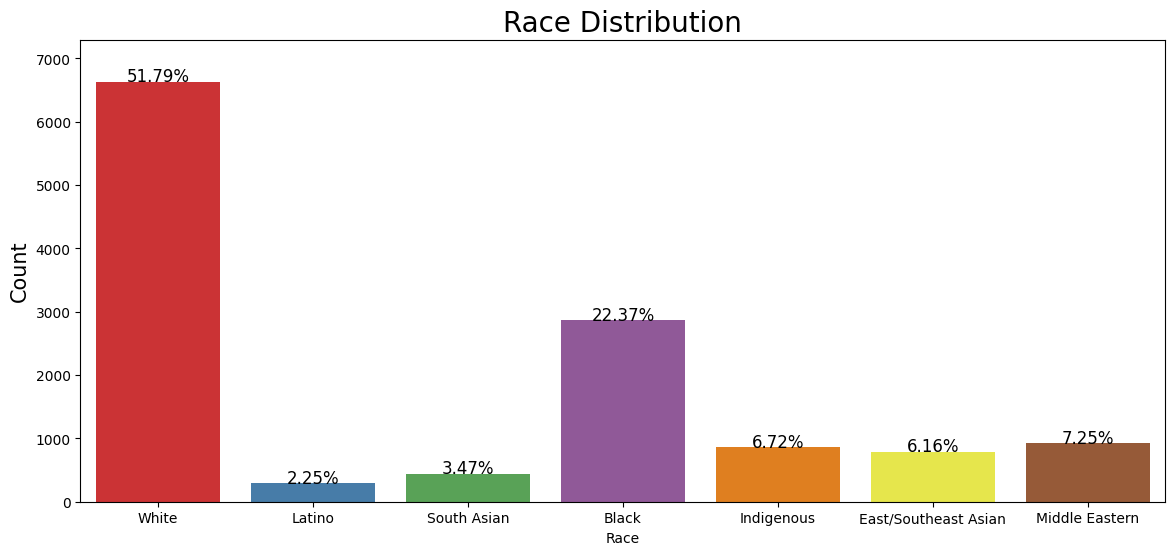

In [466]:
# The frequency of Race
total = len(df_indiv_records)

plt.figure(figsize = (14,6))

ax = sns.countplot(x="Race", data=df_indiv_records, palette="Set1", legend=False, hue = "Race")
ax.set_ylabel("Count", fontsize=15)
ax.set_xlabel('Race')
ax.set_title("Race Distribution", fontsize=20)
sizes=[]
for p in ax.patches:
    height = p.get_height()
    sizes.append(height)
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
ax.set_ylim(0, max(sizes) * 1.10)

plt.show()

#### DificultyPerceiving

In [467]:
get_unique(df_indiv_records, 'DifficultyPerceiving')

({'DifficultyPerceiving': array(['No', 'Yes'], dtype=object)},
 {'DifficultyPerceiving': 2})

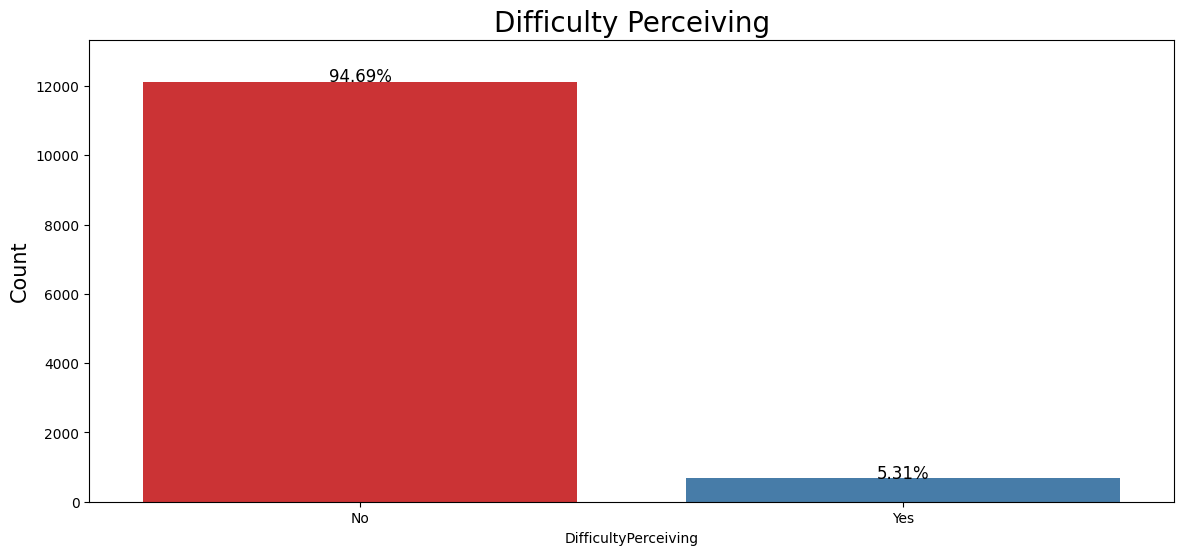

In [468]:
# The frequency of Race
total = len(df_indiv_records)

plt.figure(figsize = (14,6))

ax = sns.countplot(x="DifficultyPerceiving", data=df_indiv_records, palette="Set1", legend=False, hue = "DifficultyPerceiving")
ax.set_ylabel("Count", fontsize=15)
ax.set_title("Difficulty Perceiving", fontsize=20)
sizes=[]
for p in ax.patches:
    height = p.get_height()
    sizes.append(height)
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
ax.set_ylim(0, max(sizes) * 1.10)

plt.show()

#### AgeCategory

In [469]:
get_unique(df_indiv_records, 'AgeCategory')

({'AgeCategory': array(['45 - 54', '25 - 34', '35 - 44', '17 and younger', '18 - 24',
         '55 - 64', '65 and older'], dtype=object)},
 {'AgeCategory': 7})

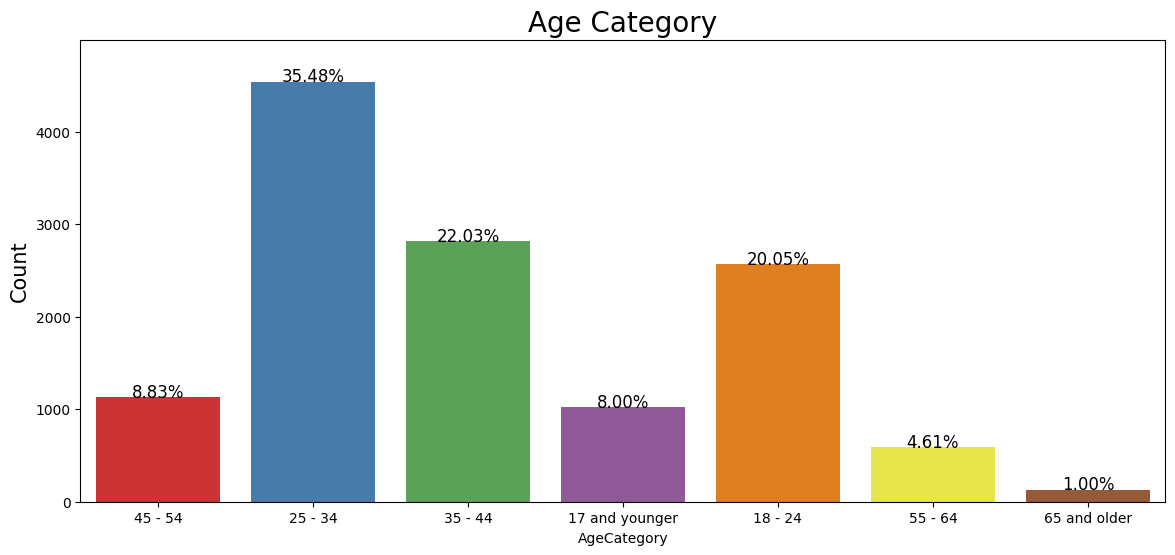

In [470]:
# The frequency of Age
total = len(df_indiv_records)

plt.figure(figsize = (14,6))

ax = sns.countplot(x="AgeCategory", data=df_indiv_records, palette="Set1", legend=False, hue = "AgeCategory")
ax.set_ylabel("Count", fontsize=15)
ax.set_title("Age Category", fontsize=20)
sizes=[]
for p in ax.patches:
    height = p.get_height()
    sizes.append(height)
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
ax.set_ylim(0, max(sizes) * 1.10)

plt.show()

#### Gender

In [471]:
get_unique(df_indiv_records, 'Gender')

({'Gender': array(['Male', 'Female', 'Trans/Non-binary/Other'], dtype=object)},
 {'Gender': 3})

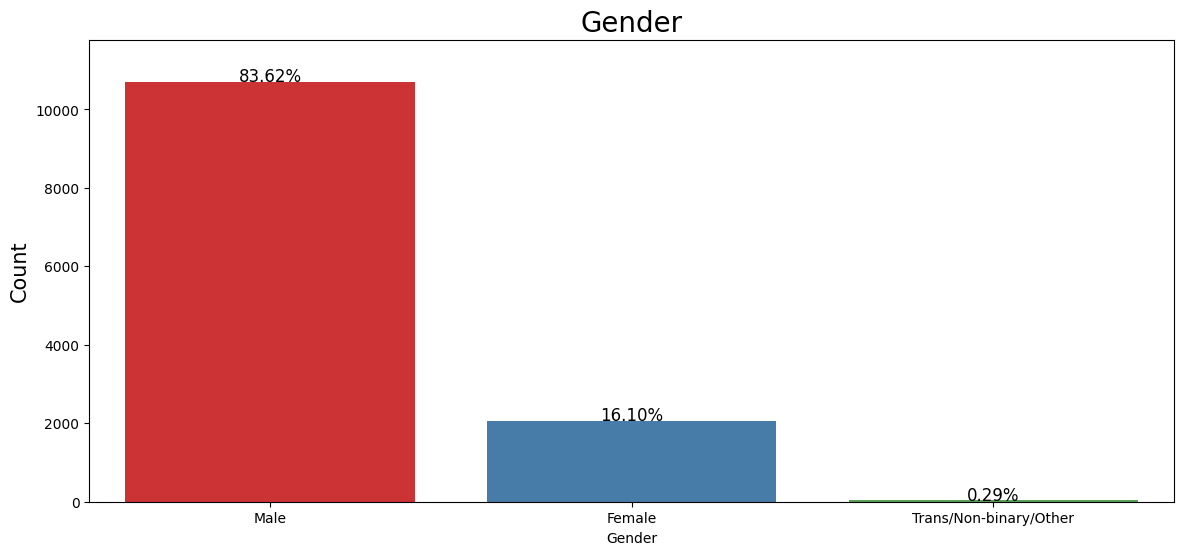

In [472]:
total = len(df_indiv_records)

plt.figure(figsize = (14,6))

ax = sns.countplot(x="Gender", data=df_indiv_records, palette="Set1", legend=False, hue = "Gender")
ax.set_ylabel("Count", fontsize=15)
ax.set_title("Gender", fontsize=20)
sizes=[]
for p in ax.patches:
    height = p.get_height()
    sizes.append(height)
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
ax.set_ylim(0, max(sizes) * 1.10)

plt.show()

#### DistanceBetweenOfficerAndIndividual

In [473]:
get_unique(df_indiv_records, 'DistanceBetweenOfficerAndIndividual')


({'DistanceBetweenOfficerAndIndividual': array(['3 to 7 metres (approx. 10 to 23 feet)',
         'Less than 3 metres (approx. 10 feet)',
         'Greater than 7 metres (more than 23 feet)'], dtype=object)},
 {'DistanceBetweenOfficerAndIndividual': 3})

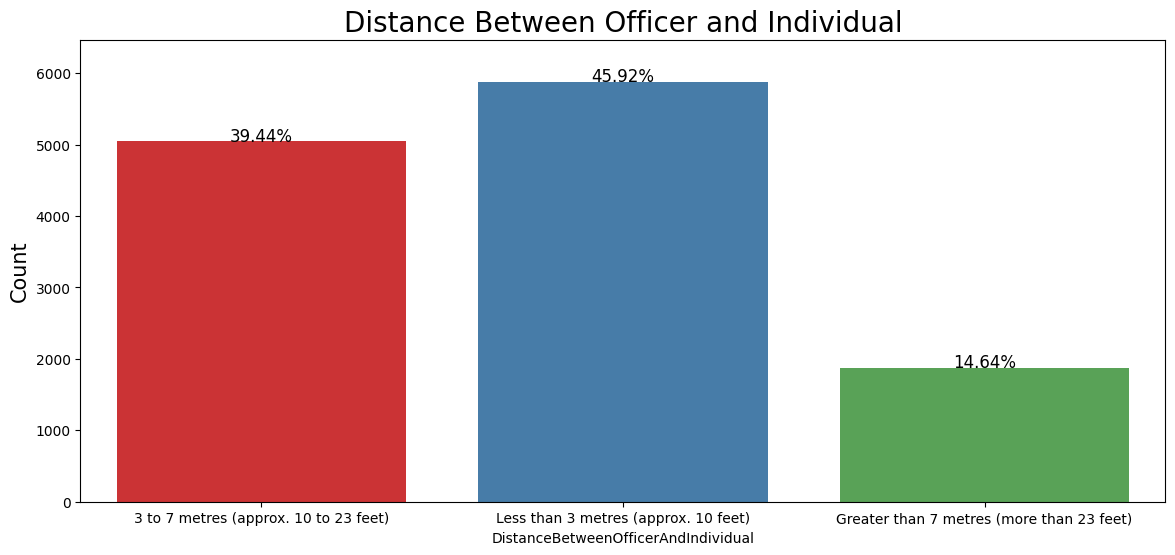

In [474]:
total = len(df_indiv_records)

plt.figure(figsize = (14,6))

ax = sns.countplot(x="DistanceBetweenOfficerAndIndividual", data=df_indiv_records, palette="Set1", legend=False, hue = "DistanceBetweenOfficerAndIndividual")
ax.set_ylabel("Count", fontsize=15)
ax.set_title("Distance Between Officer and Individual", fontsize=20)
sizes=[]
for p in ax.patches:
    height = p.get_height()
    sizes.append(height)
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
ax.set_ylim(0, max(sizes) * 1.10)

plt.show()

#### Does the distance between individual and office does affect the type of force used?

#### ReasonUseOfForce

In [475]:
get_unique(df_indiv_records, 'ReasonUseOfForce')


({'ReasonUseOfForce_EffectArrest': array([nan,  1.]),
  'ReasonUseOfForce_PreventOffence': array([nan,  1.]),
  'ReasonUseOfForce_PreventEscape': array([nan,  1.]),
  'ReasonUseOfForce_ProtectOtherOfficers': array([ 1., nan]),
  'ReasonUseOfForce_ProtectPublic': array([ 1., nan]),
  'ReasonUseOfForce_ProtectSelf': array([ 1., nan]),
  'ReasonUseOfForce_ProtectIndividual': array([nan,  1.]),
  'ReasonUseOfForce_Unintentional': array([nan,  1.]),
  'ReasonUseOfForce_Other': array([nan,  1.])},
 {'ReasonUseOfForce_EffectArrest': 1,
  'ReasonUseOfForce_PreventOffence': 1,
  'ReasonUseOfForce_PreventEscape': 1,
  'ReasonUseOfForce_ProtectOtherOfficers': 1,
  'ReasonUseOfForce_ProtectPublic': 1,
  'ReasonUseOfForce_ProtectSelf': 1,
  'ReasonUseOfForce_ProtectIndividual': 1,
  'ReasonUseOfForce_Unintentional': 1,
  'ReasonUseOfForce_Other': 1})

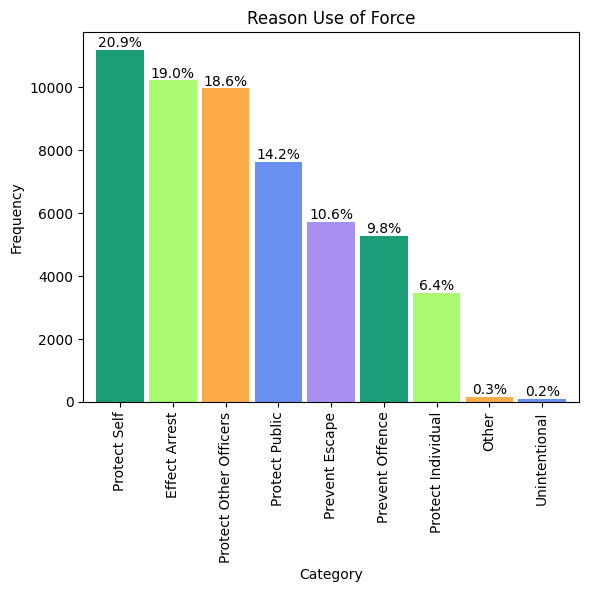

In [476]:
ReasonUseOfForcecols = list(get_unique(df_indiv_records, 'ReasonUseOfForce')[0].keys())
category_counts = df_indiv_records[ReasonUseOfForcecols].sum().sort_values(ascending=False)
category_counts_index = [add_space_before_capitals(item.split('ReasonUseOfForce_')[1]) for item in category_counts.index]
# for between two _ we use this code s.split('_')[1].split('_')[0].strip('.')
category_counts.index = category_counts_index

# Plot
fig, ax = plt.subplots()
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0']
category_counts.plot(kind='bar', color=colors, width = 0.9)
plt.title('Reason Use of Force')
plt.xlabel('Category')
plt.ylabel('Frequency')

category_counts['val'] = category_counts.apply(lambda x: (x/category_counts.sum())*100)
labels = category_counts['val'].round(1).astype('str') + '%'
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    #ax.yaxis.set_major_formatter(mtick.PercentFormatter()) 
plt.show()

In [706]:
category_counts_indiv

ReasonUseOfForce_EffectArrest            19.035561
ReasonUseOfForce_PreventOffence           9.817539
ReasonUseOfForce_PreventEscape           10.644200
ReasonUseOfForce_ProtectOtherOfficers    18.568237
ReasonUseOfForce_ProtectPublic           14.213368
ReasonUseOfForce_ProtectSelf             20.863899
ReasonUseOfForce_ProtectIndividual        6.436418
ReasonUseOfForce_Unintentional            0.156395
ReasonUseOfForce_Other                    0.264383
dtype: float64

In [705]:
category_counts_indiv = df_indiv_records[ReasonUseOfForcecols].sum() * 100 /(df_indiv_records[ReasonUseOfForcecols].sum()).sum()

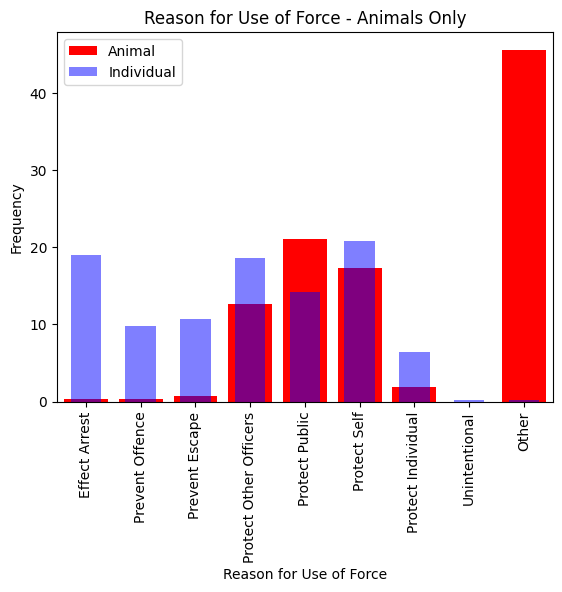

In [715]:
# Sum the occurrence of each category
NoIndividualAnimalOnly_ReasonUseOfForcecols = list(get_unique(df_main_records, 'NoIndividualAnimalOnly_ReasonUseOfForce')[0].keys())
category_counts_animal = df_main_records[NoIndividualAnimalOnly_ReasonUseOfForcecols].sum() * 100 /(df_main_records[NoIndividualAnimalOnly_ReasonUseOfForcecols].sum()).sum()
category_counts_animal_index = [add_space_before_capitals(item.split('NoIndividualAnimalOnly_ReasonUseOfForce_')[1]) for item in category_counts_animal.index]
# for between two _ we use this code s.split('_')[1].split('_')[0].strip('.')
category_counts_animal.index = category_counts_animal_index


ReasonUseOfForcecols = list(get_unique(df_indiv_records, 'ReasonUseOfForce')[0].keys())
category_counts_indiv = df_indiv_records[ReasonUseOfForcecols].sum() * 100 /(df_indiv_records[ReasonUseOfForcecols].sum()).sum()
category_counts_indiv_index = [add_space_before_capitals(item.split('ReasonUseOfForce_')[1]) for item in category_counts_indiv.index]
# for between two _ we use this code s.split('_')[1].split('_')[0].strip('.')
category_counts_indiv.index = category_counts_indiv_index

width =0.8

# Plot
fig, ax = plt.subplots()
#colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0']
category_counts_animal.plot(kind='bar', color='red', width = width, label='Animal')
category_counts_indiv.plot(kind='bar', color='blue', width = width*0.7, label='Individual', alpha=0.5)
plt.title('Reason for Use of Force - Animals Only')
plt.xlabel('Reason for Use of Force')
plt.ylabel('Frequency')
''''
category_counts_animal['val'] = category_counts.apply(lambda x: (x/category_counts_animal.sum())*100)
labels_animal = category_counts_animal['val'].round(1).astype('str') + '%'
for container in ax.containers:
    ax.bar_label(container, labels=labels_animal)

category_counts_indiv['val'] = category_counts.apply(lambda x: (x/category_counts_indiv.sum())*100)
labels_indiv = category_counts_indiv['val'].round(1).astype('str') + '%'
for container in ax.containers:
    ax.bar_label(container, labels=labels_indiv)
'''
plt.legend()
plt.show()

#### FactorsInfluenceResponse

In [477]:
get_unique(df_indiv_records, 'FactorsInfluenceResponse')

({'FactorsInfluenceResponse_NatureIncident': array([ 1., nan]),
  'FactorsInfluenceResponse_PastHistory': array([nan,  1.]),
  'FactorsInfluenceResponse_PhysicalSizeStrength': array([nan,  1.]),
  'FactorsInfluenceResponse_OtherFactors': array([nan,  1.])},
 {'FactorsInfluenceResponse_NatureIncident': 1,
  'FactorsInfluenceResponse_PastHistory': 1,
  'FactorsInfluenceResponse_PhysicalSizeStrength': 1,
  'FactorsInfluenceResponse_OtherFactors': 1})

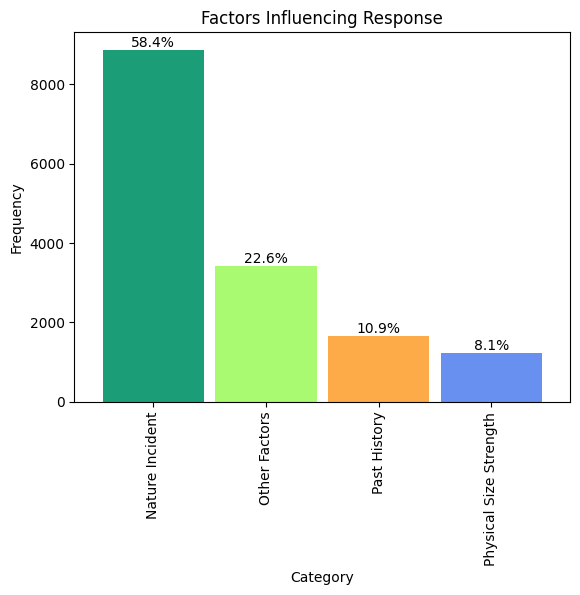

In [478]:
FactorsInfluenceResponsecols = list(get_unique(df_indiv_records, 'FactorsInfluenceResponse')[0].keys())
category_counts = df_indiv_records[FactorsInfluenceResponsecols].sum().sort_values(ascending=False)
category_counts_index = [add_space_before_capitals(item.split('FactorsInfluenceResponse_')[1]) for item in category_counts.index]
# for between two _ we use this code s.split('_')[1].split('_')[0].strip('.')
category_counts.index = category_counts_index

# Plot
fig, ax = plt.subplots()
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0']
category_counts.plot(kind='bar', color=colors, width = 0.9)
plt.title('Factors Influencing Response')
plt.xlabel('Category')
plt.ylabel('Frequency')

category_counts['val'] = category_counts.apply(lambda x: (x/category_counts.sum())*100)
labels = category_counts['val'].round(1).astype('str') + '%'
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    #ax.yaxis.set_major_formatter(mtick.PercentFormatter()) 
plt.show()

#### IndividualActions

In [479]:
get_unique(df_indiv_records, 'IndividualActions')

({'IndividualActions_ResistantPassive': array([nan,  1.]),
  'IndividualActions_ResistantActive': array([ 1., nan]),
  'IndividualActions_Assaultive': array([nan,  1.]),
  'IndividualActions_SeriousBodilyHarmDeath': array([nan,  1.])},
 {'IndividualActions_ResistantPassive': 1,
  'IndividualActions_ResistantActive': 1,
  'IndividualActions_Assaultive': 1,
  'IndividualActions_SeriousBodilyHarmDeath': 1})

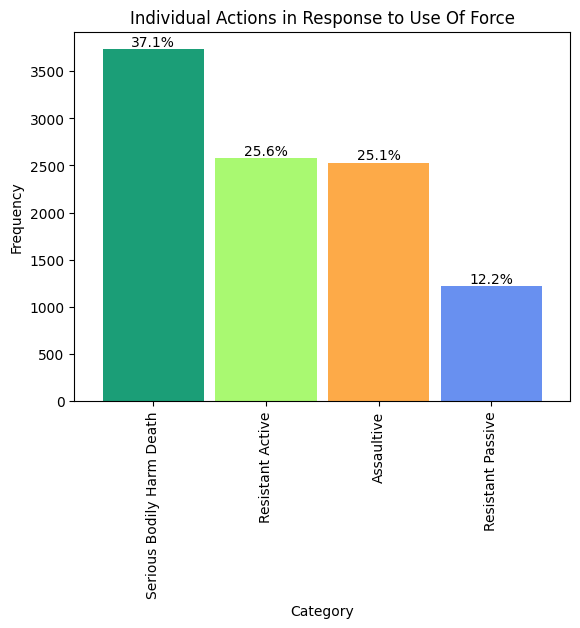

In [480]:
IndividualActionscols = list(get_unique(df_indiv_records, 'IndividualActions')[0].keys())
category_counts = df_indiv_records[IndividualActionscols].sum().sort_values(ascending=False)
category_counts_index = [add_space_before_capitals(item.split('IndividualActions_')[1]) for item in category_counts.index]
# for between two _ we use this code s.split('_')[1].split('_')[0].strip('.')
category_counts.index = category_counts_index

# Plot
fig, ax = plt.subplots()
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0']
category_counts.plot(kind='bar', color=colors, width = 0.9)
plt.title('Individual Actions in Response to Use Of Force')
plt.xlabel('Category')
plt.ylabel('Frequency')

category_counts['val'] = category_counts.apply(lambda x: (x/category_counts.sum())*100)
labels = category_counts['val'].round(1).astype('str') + '%'
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    #ax.yaxis.set_major_formatter(mtick.PercentFormatter()) 
plt.show()

#### PerceiveAccessWeapon

In [481]:

get_unique(df_indiv_records, 'PerceiveAccessWeapon')

({'PerceiveAccessWeapon': array([ 1., nan])}, {'PerceiveAccessWeapon': 1})

In [482]:
df_indiv_records.PerceiveAccessWeapon.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    NaN
Name: PerceiveAccessWeapon, dtype: float64

#### OfficerResponses

In [483]:
get_unique(df_indiv_records, 'OfficerResponses')

({'OfficerResponses_DirectionsToComply': array(['Yes', 'No'], dtype=object),
  'OfficerResponses_Comply': array(['Yes', nan, 'No'], dtype=object),
  'OfficerResponses_AttemptDeescalation': array(['Yes', 'No'], dtype=object),
  'OfficerResponses_DeescalationTechniques_Communication': array([ 1., nan]),
  'OfficerResponses_DeescalationTechniques_Containment': array([nan,  1.]),
  'OfficerResponses_DeescalationTechniques_Cover': array([nan,  1.]),
  'OfficerResponses_DeescalationTechniques_Distance': array([ 1., nan]),
  'OfficerResponses_DeescalationTechniques_Repositioning': array([nan,  1.]),
  'OfficerResponses_DeescalationTechniques_Teamwork': array([nan,  1.]),
  'OfficerResponses_DeescalationTechniques_Time': array([nan,  1.]),
  'OfficerResponses_DeescalationTechniques_Other': array([nan,  1.]),
  'OfficerResponses_AssistControllingBehaviour': array(['Yes', 'No', nan], dtype=object),
  'OfficerResponses_Reason_ImminentThreat': array([nan,  1.]),
  'OfficerResponses_Reason_ActionRe

##### Reason for response

In [484]:
get_unique(df_indiv_records, 'OfficerResponses_Reason')

({'OfficerResponses_Reason_ImminentThreat': array([nan,  1.]),
  'OfficerResponses_Reason_ActionRequiredImmediately': array([nan,  1.]),
  'OfficerResponses_Reason_DeescalationUsedOtherOfficers': array([nan,  1.]),
  'OfficerResponses_Reason_Other': array([nan,  1.])},
 {'OfficerResponses_Reason_ImminentThreat': 1,
  'OfficerResponses_Reason_ActionRequiredImmediately': 1,
  'OfficerResponses_Reason_DeescalationUsedOtherOfficers': 1,
  'OfficerResponses_Reason_Other': 1})

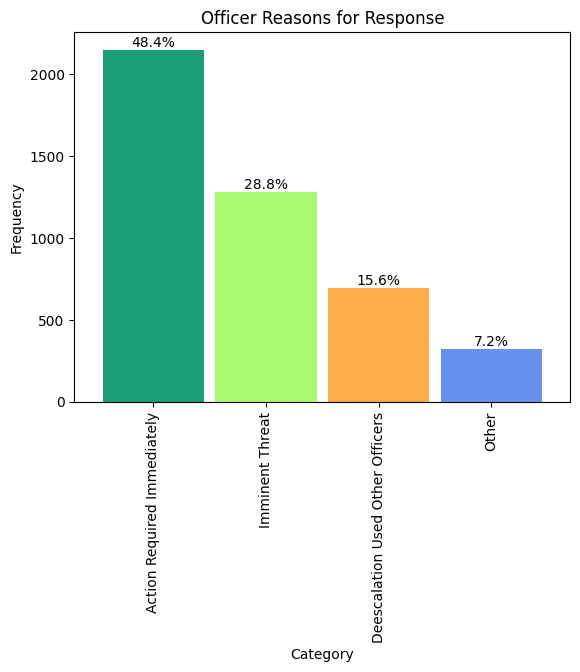

In [485]:
OfficerResponses_Reasoncols = list(get_unique(df_indiv_records, 'OfficerResponses_Reason')[0].keys())
category_counts = df_indiv_records[OfficerResponses_Reasoncols].sum().sort_values(ascending=False)
category_counts_index = [add_space_before_capitals(item.split('OfficerResponses_Reason_')[1]) for item in category_counts.index]
# for between two _ we use this code s.split('_')[1].split('_')[0].strip('.')
category_counts.index = category_counts_index

# Plot
fig, ax = plt.subplots()
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0']
category_counts.plot(kind='bar', color=colors, width = 0.9)
plt.title('Officer Reasons for Response')
plt.xlabel('Category')
plt.ylabel('Frequency')

category_counts['val'] = category_counts.apply(lambda x: (x/category_counts.sum())*100)
labels = category_counts['val'].round(1).astype('str') + '%'
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    #ax.yaxis.set_major_formatter(mtick.PercentFormatter()) 
plt.show()

##### Type of response

In [486]:
type_of_repsponsecols = ['OfficerResponses_DirectionsToComply', 'OfficerResponses_Comply', 'OfficerResponses_AttemptDeescalation', 'OfficerResponses_AssistControllingBehaviour']

In [487]:
df_indiv_records[type_of_repsponsecols].isnull().sum()

OfficerResponses_DirectionsToComply               0
OfficerResponses_Comply                        2152
OfficerResponses_AttemptDeescalation              0
OfficerResponses_AssistControllingBehaviour    3113
dtype: int64

In [488]:
df_indiv_records[type_of_repsponsecols].apply(pd.Series.value_counts)

,OfficerResponses_DirectionsToComply,OfficerResponses_Comply,OfficerResponses_AttemptDeescalation,OfficerResponses_AssistControllingBehaviour
Yes,10653,7461,9692,6909
No,2152,3192,3113,2783


In [489]:
# mode of the columns to decide what imputation to do
df_indiv_records[type_of_repsponsecols].apply(pd.Series.mode)

,OfficerResponses_DirectionsToComply,OfficerResponses_Comply,OfficerResponses_AttemptDeescalation,OfficerResponses_AssistControllingBehaviour
0,Yes,Yes,Yes,Yes


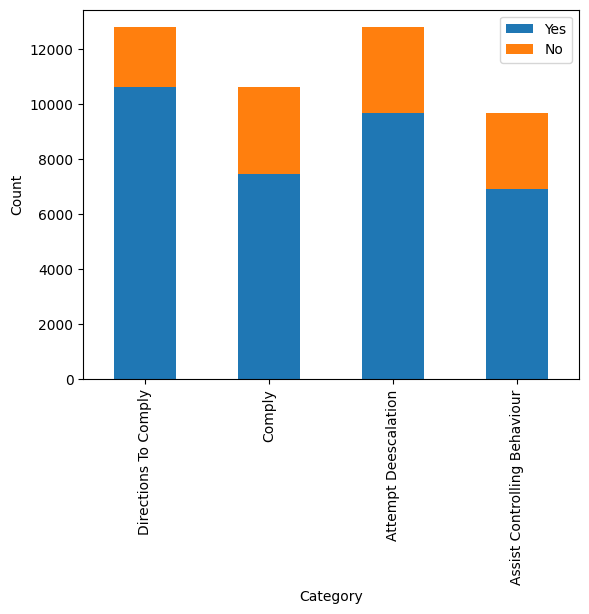

In [490]:
aa = df_indiv_records[type_of_repsponsecols].apply(pd.Series.value_counts).T
aa_index = [add_space_before_capitals(item.split('OfficerResponses_')[1]) for item in aa.index]
aa.index = aa_index

fig, ax = plt.subplots()
aa.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Category')
ax.set_ylabel('Count')
plt.show()

##### OfficerResponses_DeescalationTechniques

In [491]:
get_unique(df_indiv_records, 'OfficerResponses_DeescalationTechniques')

({'OfficerResponses_DeescalationTechniques_Communication': array([ 1., nan]),
  'OfficerResponses_DeescalationTechniques_Containment': array([nan,  1.]),
  'OfficerResponses_DeescalationTechniques_Cover': array([nan,  1.]),
  'OfficerResponses_DeescalationTechniques_Distance': array([ 1., nan]),
  'OfficerResponses_DeescalationTechniques_Repositioning': array([nan,  1.]),
  'OfficerResponses_DeescalationTechniques_Teamwork': array([nan,  1.]),
  'OfficerResponses_DeescalationTechniques_Time': array([nan,  1.]),
  'OfficerResponses_DeescalationTechniques_Other': array([nan,  1.])},
 {'OfficerResponses_DeescalationTechniques_Communication': 1,
  'OfficerResponses_DeescalationTechniques_Containment': 1,
  'OfficerResponses_DeescalationTechniques_Cover': 1,
  'OfficerResponses_DeescalationTechniques_Distance': 1,
  'OfficerResponses_DeescalationTechniques_Repositioning': 1,
  'OfficerResponses_DeescalationTechniques_Teamwork': 1,
  'OfficerResponses_DeescalationTechniques_Time': 1,
  'Offi

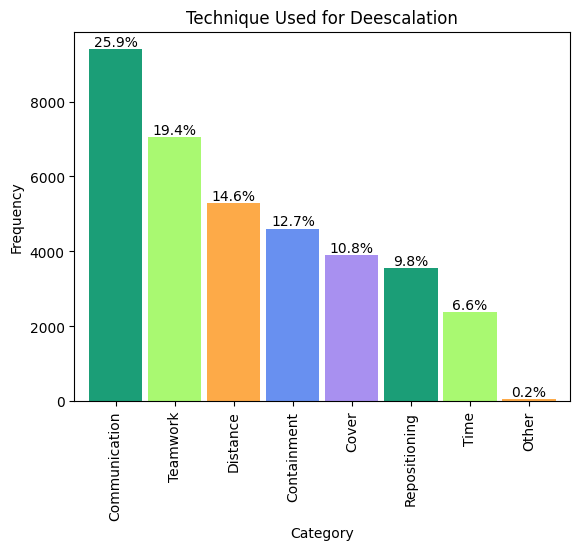

In [492]:
OfficerResponses_DeescalationTechniquescols = list(get_unique(df_indiv_records, 'OfficerResponses_DeescalationTechniques')[0].keys())
category_counts = df_indiv_records[OfficerResponses_DeescalationTechniquescols].sum().sort_values(ascending=False)
category_counts_index = [add_space_before_capitals(item.split('OfficerResponses_DeescalationTechniques_')[1]) for item in category_counts.index]
# for between two _ we use this code s.split('_')[1].split('_')[0].strip('.')
category_counts.index = category_counts_index

# Plot
fig, ax = plt.subplots()
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0']
category_counts.plot(kind='bar', color=colors, width = 0.9)
plt.title('Technique Used for Deescalation')
plt.xlabel('Category')
plt.ylabel('Frequency')

category_counts['val'] = category_counts.apply(lambda x: (x/category_counts.sum())*100)
labels = category_counts['val'].round(1).astype('str') + '%'
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    #ax.yaxis.set_major_formatter(mtick.PercentFormatter()) 
plt.show()

#### TypeForceUsed

In [493]:
get_unique(df_indiv_records, 'TypeForceUsed')

({'TypeForceUsed_PhysicalControl_Check': array([nan,  1.]),
  'TypeForceUsed_PhysicalControl_EscortTechniques': array([nan,  1.]),
  'TypeForceUsed_PhysicalControl_Grounding': array([nan,  1.]),
  'TypeForceUsed_PhysicalControl_Jointlocks': array([nan,  1.]),
  'TypeForceUsed_PhysicalControl_Pinning': array([nan,  1.]),
  'TypeForceUsed_PhysicalControl_PressurePoints': array([nan,  1.]),
  'TypeForceUsed_PhysicalControl_Strikes': array([nan,  1.]),
  'TypeForceUsed_PhysicalControl_Other': array([nan,  1.]),
  'TypeForceUsed_PhysicalControl_AssistControllingBehaviour': array([nan, 'Yes', 'No'], dtype=object),
  'TypeForceUsed_IntermediateWeapon_Check': array([ 1., nan]),
  'TypeForceUsed_IntermediateWeapon_OC_Check': array([nan,  1.]),
  'TypeForceUsed_IntermediateWeapon_OC_AssistControllingBehaviour': array([nan, 'Yes', 'No'], dtype=object),
  'TypeForceUsed_IntermediateWeapon_Baton_Check': array([nan,  1.]),
  'TypeForceUsed_IntermediateWeapon_Baton_Hard': array([nan,  1.]),
  'TypeFo

In [494]:
# Unique Type of force Used
set([item.split('TypeForceUsed_')[1].split('_')[0] for item in get_unique(df_indiv_records, 'TypeForceUsed')[0].keys()])

{'Firearm',
 'IntermediateWeapon',
 'LessLethalFirearm',
 'Other',
 'PhysicalControl'}

In [495]:
# Physical Control
Physical = [item.split('TypeForceUsed_PhysicalControl_')[1] for item in get_unique(df_indiv_records, 'TypeForceUsed_PhysicalControl_')[0].keys()]
Physical_columns = ['TypeForceUsed_PhysicalControl_' + item for item in Physical]
list_to_remove =['TypeForceUsed_PhysicalControl_Check',
                'TypeForceUsed_PhysicalControl_AssistControllingBehaviour']
[Physical_columns.remove(item) for item in list_to_remove]
df_indiv_records['Physical_combined'] = df_indiv_records[Physical_columns].sum(axis=1)

In [496]:
# Intermediate Weapons (Baton/CEW)
# Baton
Baton = [item.split('TypeForceUsed_IntermediateWeapon_')[1] for item in get_unique(df_indiv_records, 'TypeForceUsed_IntermediateWeapon_Baton_')[0].keys()]
baton_columns = ['TypeForceUsed_IntermediateWeapon_' + item for item in Baton]
list_to_remove =['TypeForceUsed_IntermediateWeapon_Baton_Check','TypeForceUsed_IntermediateWeapon_Baton_AssistControllingBehaviour']
[baton_columns.remove(item) for item in list_to_remove]

df_indiv_records['baton_combined'] = df_indiv_records[baton_columns].sum(axis=1)


In [497]:
df_indiv_records['baton_combined'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: baton_combined, dtype: float64

In [498]:
WhyNot_list = list(get_unique(df_indiv_records, 'TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_WhyNot_')[0].keys())
DeploymentMode_list = list(get_unique(df_indiv_records, 'TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_DeloymentMode_')[0].keys())

In [499]:
# Intermediate Weapons (Baton/CEW)
# CEW
CEW = [item.split('TypeForceUsed_IntermediateWeapon_')[1] for item in get_unique(df_indiv_records, 'TypeForceUsed_IntermediateWeapon_')[0].keys()]
CEW_columns = ['TypeForceUsed_IntermediateWeapon_' + item for item in CEW]

list_to_remove = ['TypeForceUsed_IntermediateWeapon_Check',
                  'TypeForceUsed_IntermediateWeapon_Baton_Hard',
                  'TypeForceUsed_IntermediateWeapon_Baton_Soft',
                  'TypeForceUsed_IntermediateWeapon_OC_Check',
                  'TypeForceUsed_IntermediateWeapon_OC_AssistControllingBehaviour',
                  'TypeForceUsed_IntermediateWeapon_Baton_Check',
                  'TypeForceUsed_IntermediateWeapon_Baton_AssistControllingBehaviour',
                  'TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_Check',
                  'TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_AssistControllingBehaviour',
                  'TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_DrivePushStunCycles',
                  'TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_ThreePointContactCycles'] + WhyNot_list + DeploymentMode_list

[CEW_columns.remove(item) for item in list_to_remove]
df_indiv_records['CEW_combined'] = df_indiv_records[CEW_columns].sum(axis=1)

In [500]:
CEW_columns

['TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_Drawn',
 'TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_Pointed',
 'TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_Discharged']

In [501]:
## Intermediate Weapons
IntermediateWeapons_columns = ['baton_combined'] + ['CEW_combined']
df_indiv_records['IntermediateWeapon_combined'] = df_indiv_records[IntermediateWeapons_columns].sum(axis=1)

In [502]:
# LessLethalFirearm
LessLethalFirearm = [item.split('TypeForceUsed_LessLethalFirearm_')[1] for item in get_unique(df_indiv_records, 'TypeForceUsed_LessLethalFirearm_')[0].keys()]
LessLethalFirearm_columns = ['TypeForceUsed_LessLethalFirearm_' + item for item in LessLethalFirearm]

list_to_remove = ['TypeForceUsed_LessLethalFirearm_Check',
                  'TypeForceUsed_LessLethalFirearm_Shotgun_Check',
                  'TypeForceUsed_LessLethalFirearm_Shotgun_AssistControllingBehaviour',
                  'TypeForceUsed_LessLethalFirearm_ExtendedRangeImpactWeapon_Check',
                  'TypeForceUsed_LessLethalFirearm_ExtendedRangeImpactWeapon_AssistControllingBehaviour']
[LessLethalFirearm_columns.remove(item) for item in list_to_remove]
df_indiv_records['LessLethalFirearm_combined'] = df_indiv_records[LessLethalFirearm_columns].sum(axis=1)

In [503]:
# Firearm
Firearm = [item.split('TypeForceUsed_Firearm_')[1] for item in get_unique(df_indiv_records, 'TypeForceUsed_Firearm_')[0].keys()]
Firearm_columns = ['TypeForceUsed_Firearm_' + item for item in Firearm]
list_to_remove = ['TypeForceUsed_Firearm_Check',
                  'TypeForceUsed_Firearm_Handgun_Check',
                  'TypeForceUsed_Firearm_Rifle_Check',
                  'TypeForceUsed_Firearm_ShotgunLethal_Check',
                  'TypeForceUsed_Firearm_Handgun_AssistControllingBehaviour',
                  'TypeForceUsed_Firearm_Rifle_AssistControllingBehaviour',
                  'TypeForceUsed_Firearm_ShotgunLethal_AssistControllingBehaviour',
                  'TypeForceUsed_Firearm_IssuePoliceChallenge',
                  'TypeForceUsed_Firearm_Comply',
                  'TypeForceUsed_Firearm_NoChallengeWhyNot_NotViable',
                  'TypeForceUsed_Firearm_NoChallengeWhyNot_IssuedByAnotherOfficer',
                  'TypeForceUsed_Firearm_NoChallengeWhyNot_Other']
[Firearm_columns.remove(item) for item in list_to_remove]
df_indiv_records['Firearm_combined'] = df_indiv_records[Firearm_columns].sum(axis=1)



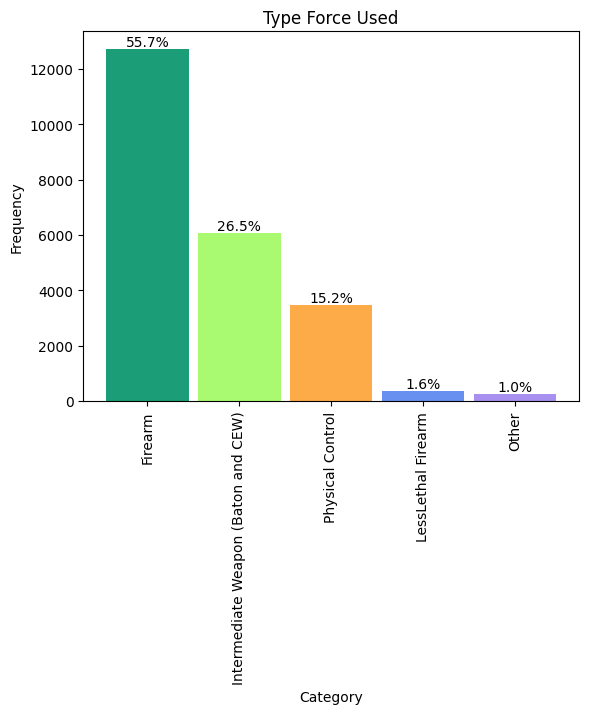

In [504]:
# Other
TypeForceUsed_all_cols = ['Physical_combined','IntermediateWeapon_combined', 'LessLethalFirearm_combined', 'Firearm_combined', 'TypeForceUsed_Other_Check']
category_counts = df_indiv_records[TypeForceUsed_all_cols].sum().sort_values(ascending=False)
category_counts.index = ['Firearm', 'Intermediate Weapon (Baton and CEW)', 'Physical Control', 'LessLethal Firearm', 'Other']

# Plot
fig, ax = plt.subplots()
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0']
category_counts.plot(kind='bar', color=colors, width = 0.9)
plt.title('Type Force Used')
plt.xlabel('Category')
plt.ylabel('Frequency')


category_counts['val'] = category_counts.apply(lambda x: (x/category_counts.sum())*100)
labels = category_counts['val'].round(1).astype('str') + '%'
for container in ax.containers:
    ax.bar_label(container, labels=labels)

    #ax.yaxis.set_major_formatter(mtick.PercentFormatter()) 
plt.show()

#### TypeForceUsed_PhysicalControl

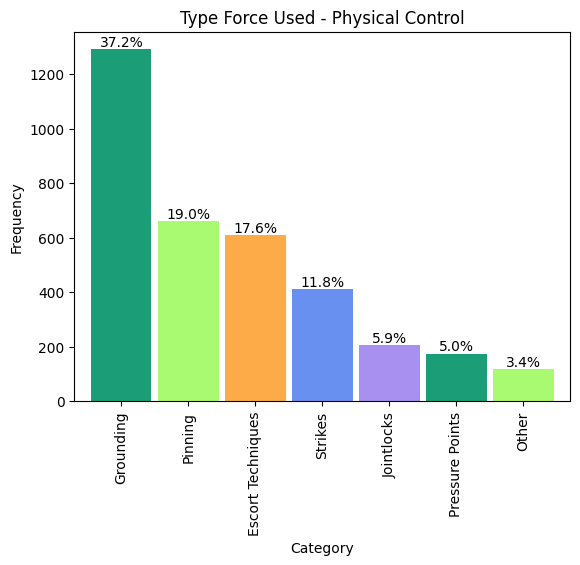

In [505]:
category_counts = df_indiv_records[Physical_columns].sum().sort_values(ascending=False)
category_counts_index = [add_space_before_capitals(item.split('TypeForceUsed_PhysicalControl_')[1]) for item in category_counts.index]
# for between two _ we use this code s.split('_')[1].split('_')[0].strip('.')
category_counts.index = category_counts_index

# Plot
fig, ax = plt.subplots()
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0']
category_counts.plot(kind='bar', color=colors, width = 0.9)
plt.title('Type Force Used - Physical Control')
plt.xlabel('Category')
plt.ylabel('Frequency')

category_counts['val'] = category_counts.apply(lambda x: (x/category_counts.sum())*100)
labels = category_counts['val'].round(1).astype('str') + '%'
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    #ax.yaxis.set_major_formatter(mtick.PercentFormatter()) 
plt.show()

#### TypeForceUsed_IntermediateWeapon

##### TypeForceUsed_IntermediateWeapon (only Baton and CEW)

In [506]:
# Unique Type of force Used as intermediate weapon
set([item.split('TypeForceUsed_IntermediateWeapon_')[1].split('_')[0] for item in get_unique(df_indiv_records, 'TypeForceUsed_IntermediateWeapon_')[0].keys()])

{'Baton', 'Check', 'ConductedEnergyWeapon', 'OC'}

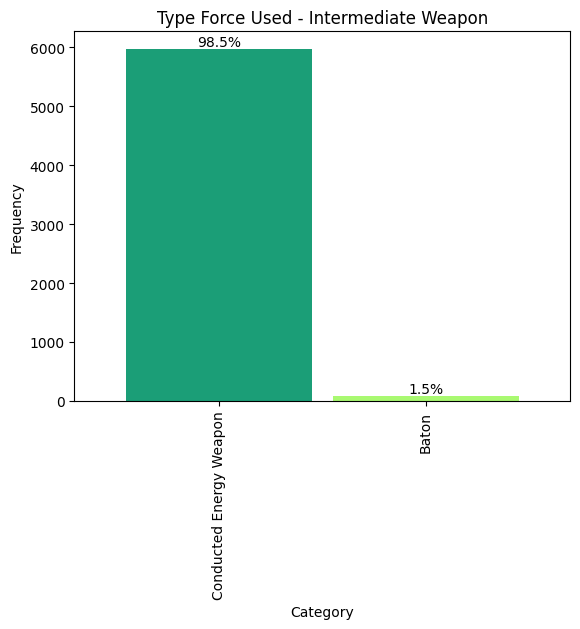

In [507]:
TypeForceUsed_IntermediateWeaponcols = ['baton_combined', 'CEW_combined']
category_counts = df_indiv_records[TypeForceUsed_IntermediateWeaponcols].sum().sort_values(ascending=False)
category_counts.index = ['Conducted Energy Weapon','Baton']

# Plot
fig, ax = plt.subplots()
colors = ['#1b9e77', '#a9f971']
category_counts.plot(kind='bar', color=colors, width = 0.9)
plt.title('Type Force Used - Intermediate Weapon')
plt.xlabel('Category')
plt.ylabel('Frequency')


category_counts['val'] = category_counts.apply(lambda x: (x/category_counts.sum())*100)
labels = category_counts['val'].round(1).astype('str') + '%'
for container in ax.containers:
    ax.bar_label(container, labels=labels)

    #ax.yaxis.set_major_formatter(mtick.PercentFormatter()) 
plt.show()

#### Type of force intermediate (all ctegories)

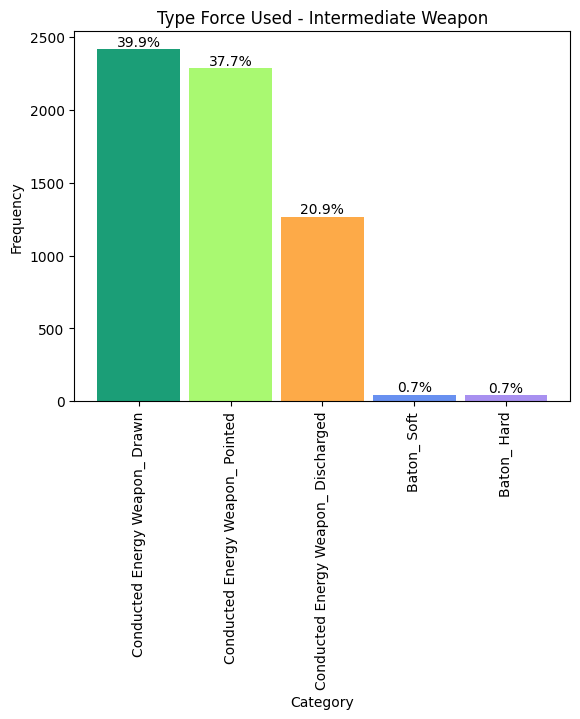

In [508]:
TypeForceUsed_IntermediateWeapon_cols = baton_columns + CEW_columns
category_counts = df_indiv_records[TypeForceUsed_IntermediateWeapon_cols].sum().sort_values(ascending=False)
category_counts_index = [add_space_before_capitals(item.split('TypeForceUsed_IntermediateWeapon_')[1]) for item in category_counts.index]
# for between two _ we use this code s.split('_')[1].split('_')[0].strip('.')
category_counts.index = category_counts_index

# Plot
fig, ax = plt.subplots()
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0']
category_counts.plot(kind='bar', color=colors, width = 0.9)
plt.title('Type Force Used - Intermediate Weapon')
plt.xlabel('Category')
plt.ylabel('Frequency')

category_counts['val'] = category_counts.apply(lambda x: (x/category_counts.sum())*100)
labels = category_counts['val'].round(1).astype('str') + '%'
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    #ax.yaxis.set_major_formatter(mtick.PercentFormatter()) 
plt.show()

#### TypeForceUsed_IntermediateWeapon_Baton

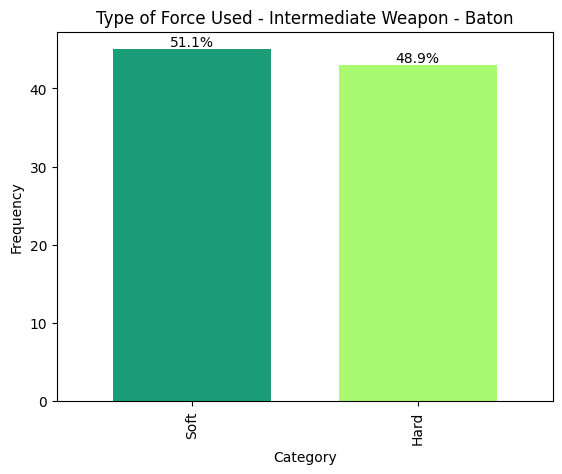

In [509]:
category_counts = df_indiv_records[baton_columns].sum().sort_values(ascending=False)
category_counts_index = [add_space_before_capitals(item.split('TypeForceUsed_IntermediateWeapon_Baton_')[1]) for item in category_counts.index]
# for between two _ we use this code s.split('_')[1].split('_')[0].strip('.')
category_counts.index = category_counts_index

# Plot
fig, ax = plt.subplots()
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0']
category_counts.plot(kind='bar', color=colors, width = 0.7)
plt.title('Type of Force Used - Intermediate Weapon - Baton')
plt.xlabel('Category')
plt.ylabel('Frequency')

category_counts['val'] = category_counts.apply(lambda x: (x/category_counts.sum())*100)
labels = category_counts['val'].round(1).astype('str') + '%'
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    #ax.yaxis.set_major_formatter(mtick.PercentFormatter()) 
plt.show()

#### TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon

In [510]:
category_counts

Soft                                                 45.0
Hard                                                 43.0
val     Soft    51.136364
Hard    48.863636
dtype: flo...
dtype: object

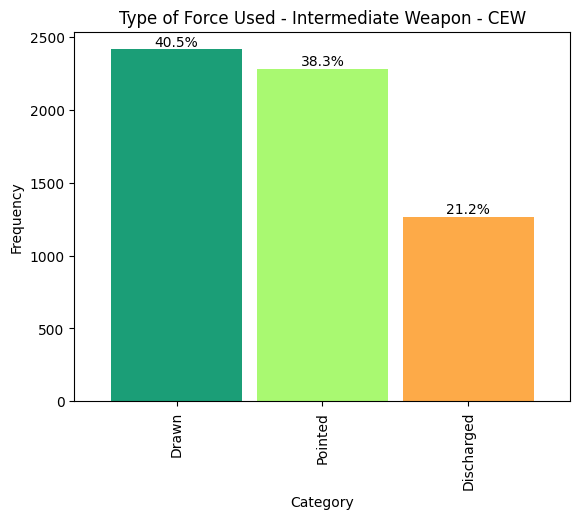

In [511]:
category_counts = df_indiv_records[CEW_columns].sum().sort_values(ascending=False)
category_counts_index = [add_space_before_capitals(item.split('TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_')[1]) for item in category_counts.index]
# for between two _ we use this code s.split('_')[1].split('_')[0].strip('.')
category_counts.index = category_counts_index

# Plot
fig, ax = plt.subplots()
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0']
category_counts.plot(kind='bar', color=colors, width = 0.9)
plt.title('Type of Force Used - Intermediate Weapon - CEW')
plt.xlabel('Category')
plt.ylabel('Frequency')

category_counts['val'] = category_counts.apply(lambda x: (x/category_counts.sum())*100)
labels = category_counts['val'].round(1).astype('str') + '%'
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    #ax.yaxis.set_major_formatter(mtick.PercentFormatter()) 
plt.show()

#### Why CEW Not Functioning?

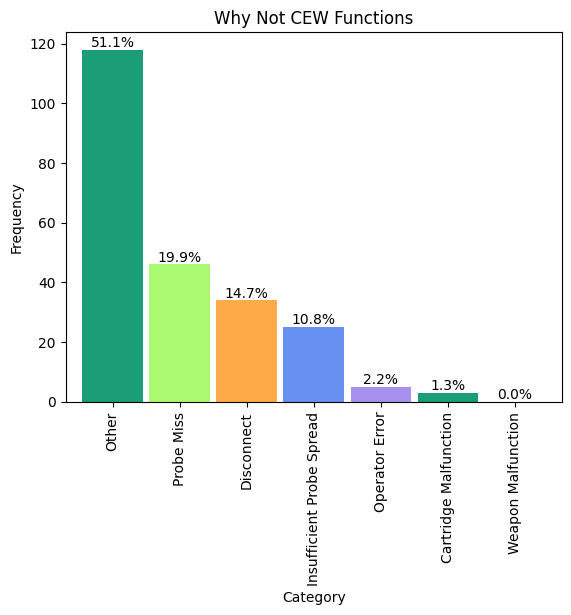

In [512]:
category_counts = df_indiv_records[WhyNot_list].sum().sort_values(ascending=False)
category_counts_index = [add_space_before_capitals(item.split('TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_WhyNot_')[1]) for item in category_counts.index]
# for between two _ we use this code s.split('_')[1].split('_')[0].strip('.')
category_counts.index = category_counts_index

# Plot
fig, ax = plt.subplots()
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0']
category_counts.plot(kind='bar', color=colors, width = 0.9)
plt.title('Why Not CEW Functions')
plt.xlabel('Category')
plt.ylabel('Frequency')

category_counts['val'] = category_counts.apply(lambda x: (x/category_counts.sum())*100)
labels = category_counts['val'].round(1).astype('str') + '%'
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    #ax.yaxis.set_major_formatter(mtick.PercentFormatter()) 
plt.show()

#### What is the deployment mode of the CEW?

In [513]:
DeploymentMode_list

['TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_DeloymentMode_Cartridge',
 'TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_DeloymentMode_DrivePushStun',
 'TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_DeloymentMode_ThreePointContact']

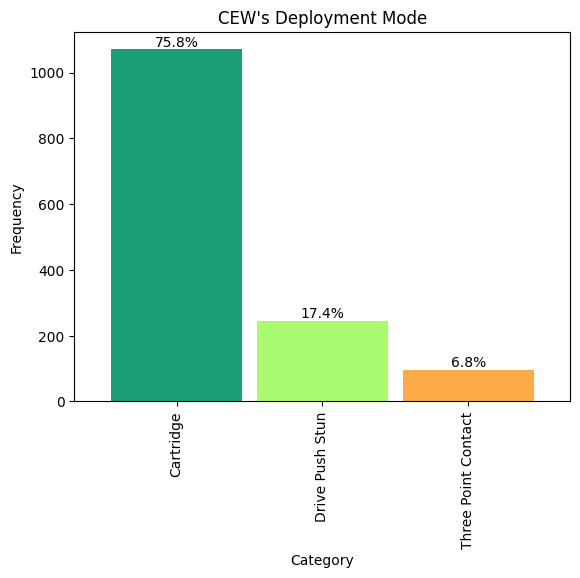

In [514]:
category_counts = df_indiv_records[DeploymentMode_list].sum().sort_values(ascending=False)
category_counts_index = [add_space_before_capitals(item.split('TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_DeloymentMode_')[1]) for item in category_counts.index]
# for between two _ we use this code s.split('_')[1].split('_')[0].strip('.')
category_counts.index = category_counts_index

# Plot
fig, ax = plt.subplots()
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0']
category_counts.plot(kind='bar', color=colors, width = 0.9)
plt.title("CEW's Deployment Mode")
plt.xlabel('Category')
plt.ylabel('Frequency')

category_counts['val'] = category_counts.apply(lambda x: (x/category_counts.sum())*100)
labels = category_counts['val'].round(1).astype('str') + '%'
for container in ax.containers:
    ax.bar_label(container, labels=labels)

plt.show()

#### Deployment Mode Cycles

In [515]:
DeploymentModeCycles = ['TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_DrivePushStunCycles',
                                       'TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_ThreePointContactCycles']

In [516]:
df_indiv_records[DeploymentModeCycles[0]].unique()

array([nan, 'Single Cycle (5 seconds)',
       'Extended Cycle (more than 5 seconds)', 'Multiple Cycles'],
      dtype=object)

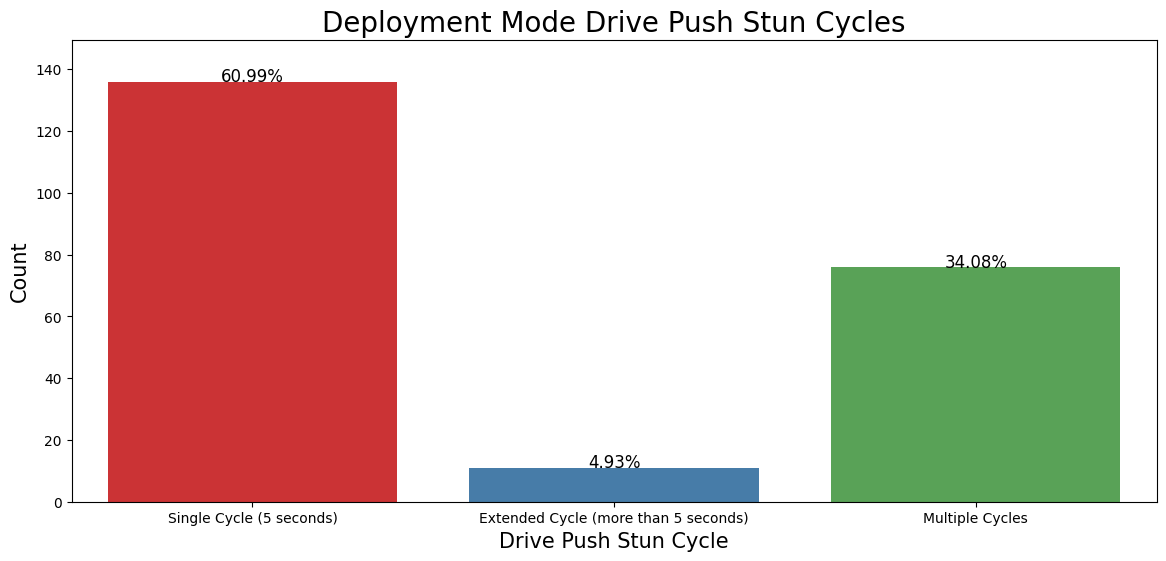

In [517]:
total = df_indiv_records.TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_DrivePushStunCycles[~df_indiv_records.TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_DrivePushStunCycles.isnull()].shape[0]

plt.figure(figsize = (14,6))

ax = sns.countplot(x="TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_DrivePushStunCycles", data=df_indiv_records, palette="Set1", legend=False, hue = "TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_DrivePushStunCycles")
ax.set_ylabel("Count", fontsize=15)
ax.set_xlabel("Drive Push Stun Cycle", fontsize=15)
ax.set_title("Deployment Mode Drive Push Stun Cycles", fontsize=20)
sizes=[]
for p in ax.patches:
    height = p.get_height()
    sizes.append(height)
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
ax.set_ylim(0, max(sizes) * 1.10)

plt.show()

In [518]:
df_indiv_records[DeploymentModeCycles[1]].unique()

array([nan, 'Extended Cycle (more than 5 seconds)',
       'Single Cycle (5 seconds)', 'Multiple Cycles'], dtype=object)

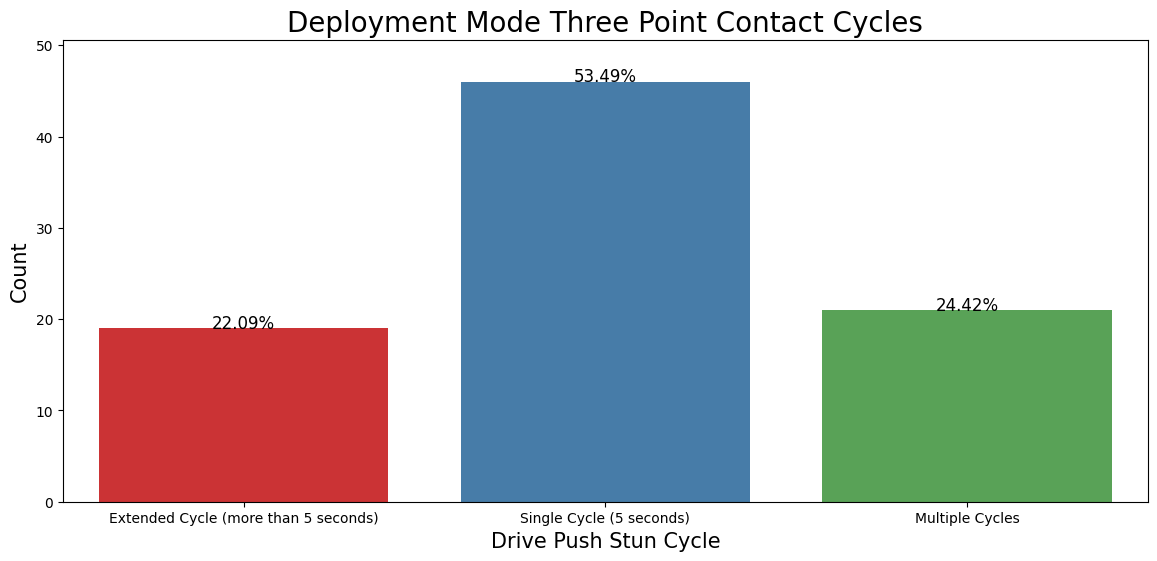

In [519]:
total = df_indiv_records.TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_ThreePointContactCycles[~df_indiv_records.TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_ThreePointContactCycles.isnull()].shape[0]

plt.figure(figsize = (14,6))

ax = sns.countplot(x="TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_ThreePointContactCycles", data=df_indiv_records, palette="Set1", legend=False, hue = "TypeForceUsed_IntermediateWeapon_ConductedEnergyWeapon_ThreePointContactCycles")
ax.set_ylabel("Count", fontsize=15)
ax.set_xlabel("Drive Push Stun Cycle", fontsize=15)
ax.set_title("Deployment Mode Three Point Contact Cycles", fontsize=20)
sizes=[]
for p in ax.patches:
    height = p.get_height()
    sizes.append(height)
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
ax.set_ylim(0, max(sizes) * 1.10)

plt.show()

#### TypeForceUsed_LessLethalFirearm

In [520]:
get_unique(df_indiv_records, 'TypeForceUsed_LessLethalFirearm')

({'TypeForceUsed_LessLethalFirearm_Check': array([nan,  1.]),
  'TypeForceUsed_LessLethalFirearm_Shotgun_Check': array([nan,  1.]),
  'TypeForceUsed_LessLethalFirearm_Shotgun_Pointed': array([nan,  1.]),
  'TypeForceUsed_LessLethalFirearm_Shotgun_Discharged': array([nan,  1.]),
  'TypeForceUsed_LessLethalFirearm_Shotgun_AssistControllingBehaviour': array([nan, 'No', 'Yes'], dtype=object),
  'TypeForceUsed_LessLethalFirearm_ExtendedRangeImpactWeapon_Check': array([nan,  1.]),
  'TypeForceUsed_LessLethalFirearm_ExtendedRangeImpactWeapon_Pointed': array([nan,  1.]),
  'TypeForceUsed_LessLethalFirearm_ExtendedRangeImpactWeapon_Discharged': array([nan,  1.]),
  'TypeForceUsed_LessLethalFirearm_ExtendedRangeImpactWeapon_AssistControllingBehaviour': array([nan, 'No', 'Yes'], dtype=object)},
 {'TypeForceUsed_LessLethalFirearm_Check': 1,
  'TypeForceUsed_LessLethalFirearm_Shotgun_Check': 1,
  'TypeForceUsed_LessLethalFirearm_Shotgun_Pointed': 1,
  'TypeForceUsed_LessLethalFirearm_Shotgun_Discha

In [521]:
LessLethalFirearm_columns

['TypeForceUsed_LessLethalFirearm_Shotgun_Pointed',
 'TypeForceUsed_LessLethalFirearm_Shotgun_Discharged',
 'TypeForceUsed_LessLethalFirearm_ExtendedRangeImpactWeapon_Pointed',
 'TypeForceUsed_LessLethalFirearm_ExtendedRangeImpactWeapon_Discharged']

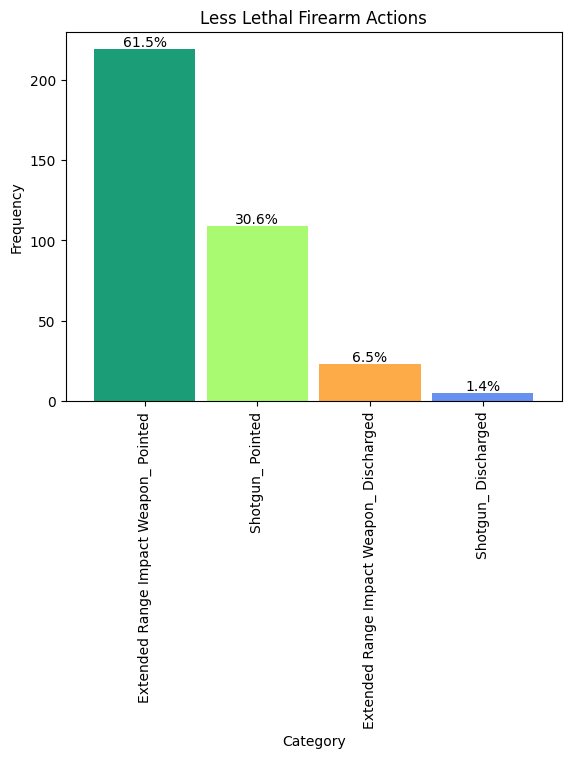

In [522]:
category_counts = df_indiv_records[LessLethalFirearm_columns].sum().sort_values(ascending=False)
category_counts_index = [add_space_before_capitals(item.split('TypeForceUsed_LessLethalFirearm_')[1]) for item in category_counts.index]
# for between two _ we use this code s.split('_')[1].split('_')[0].strip('.')
category_counts.index = category_counts_index

# Plot
fig, ax = plt.subplots()
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0']
category_counts.plot(kind='bar', color=colors, width = 0.9)
plt.title('Less Lethal Firearm Actions')
plt.xlabel('Category')
plt.ylabel('Frequency')

category_counts['val'] = category_counts.apply(lambda x: (x/category_counts.sum())*100)
labels = category_counts['val'].round(1).astype('str') + '%'
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    #ax.yaxis.set_major_formatter(mtick.PercentFormatter()) 
plt.show()

#### TypeForceUsed_Firearm

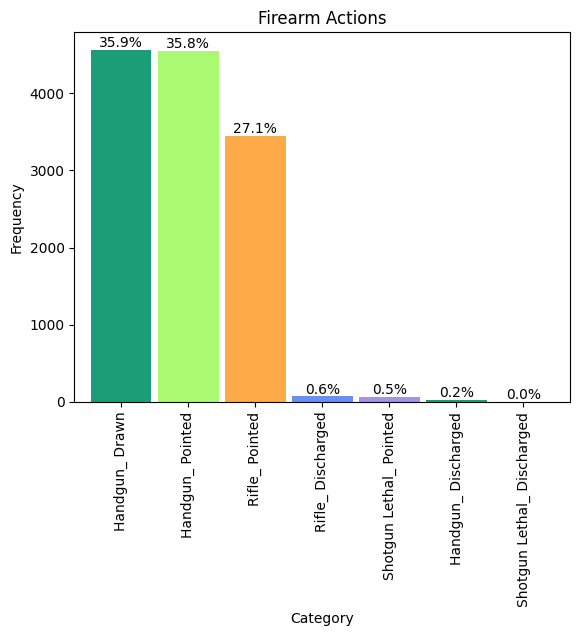

In [523]:
category_counts = df_indiv_records[Firearm_columns].sum().sort_values(ascending=False)
category_counts_index = [add_space_before_capitals(item.split('TypeForceUsed_Firearm_')[1]) for item in category_counts.index]
# for between two _ we use this code s.split('_')[1].split('_')[0].strip('.')
category_counts.index = category_counts_index

# Plot
fig, ax = plt.subplots()
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0']
category_counts.plot(kind='bar', color=colors, width = 0.9)
plt.title('Firearm Actions')
plt.xlabel('Category')
plt.ylabel('Frequency')

category_counts['val'] = category_counts.apply(lambda x: (x/category_counts.sum())*100)
labels = category_counts['val'].round(1).astype('str') + '%'
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    #ax.yaxis.set_major_formatter(mtick.PercentFormatter()) 
plt.show()

#### IndividualInjuries

PhysicalInjuriesIndividual

In [524]:
df_indiv_records['IndividualInjuries_PhysicalInjuriesIndividual'].unique()

array(['No', 'Yes', "Don't Know (e.g., individual fled/escaped)", 'Fatal'],
      dtype=object)

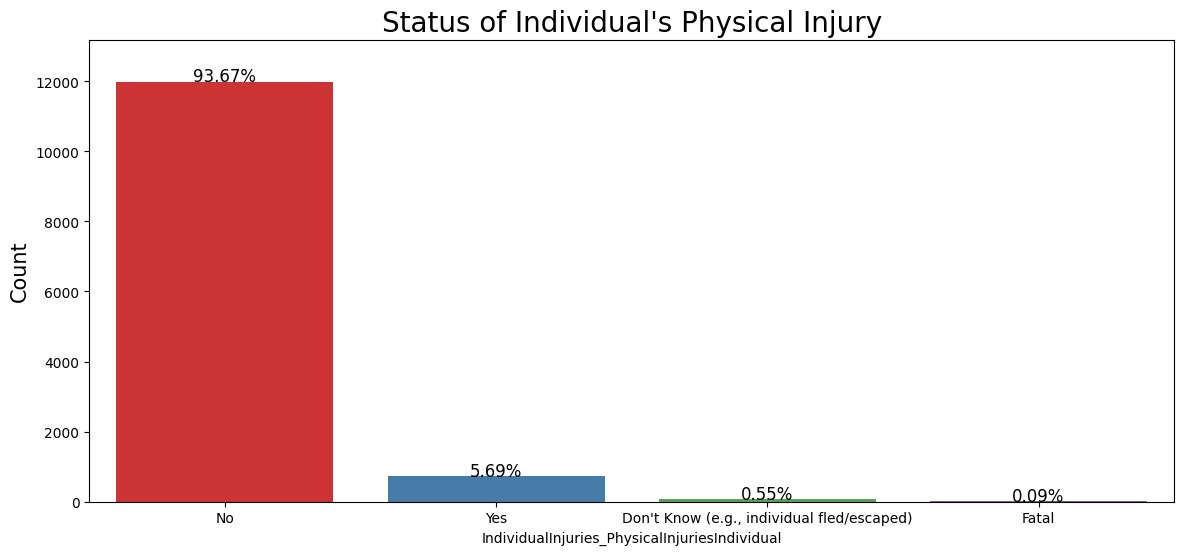

In [525]:
total = df_indiv_records.IndividualInjuries_PhysicalInjuriesIndividual[~df_indiv_records.IndividualInjuries_PhysicalInjuriesIndividual.isnull()].shape[0]

plt.figure(figsize = (14,6))

ax = sns.countplot(x="IndividualInjuries_PhysicalInjuriesIndividual", data=df_indiv_records, palette="Set1", legend=False, hue = "IndividualInjuries_PhysicalInjuriesIndividual")
ax.set_ylabel("Count", fontsize=15)
ax.set_title("Status of Individual's Physical Injury", fontsize=20)
sizes=[]
for p in ax.patches:
    height = p.get_height()
    sizes.append(height)
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
ax.set_ylim(0, max(sizes) * 1.10)

plt.show()

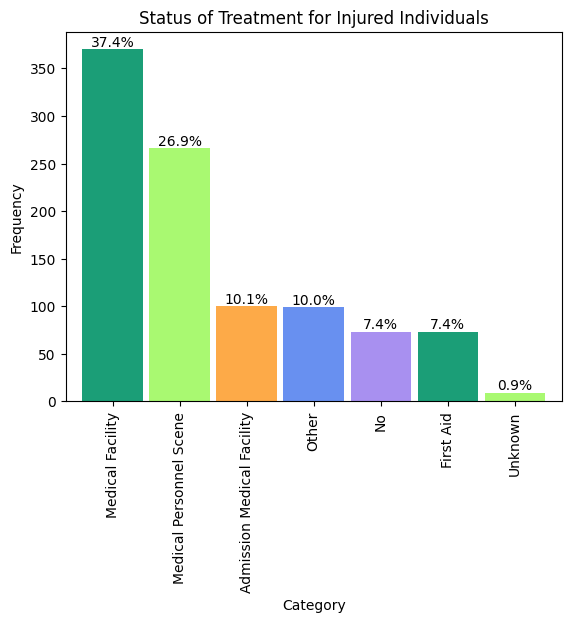

In [526]:
IndividualInjuries_Treatment_cols = list(get_unique(df_indiv_records, 'IndividualInjuries_Treatment')[0].keys())
category_counts = df_indiv_records[IndividualInjuries_Treatment_cols].sum().sort_values(ascending=False)
category_counts_index = [add_space_before_capitals(item.split('IndividualInjuries_Treatment_')[1]) for item in category_counts.index]
# for between two _ we use this code s.split('_')[1].split('_')[0].strip('.')
category_counts.index = category_counts_index

# Plot
fig, ax = plt.subplots()
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0']
category_counts.plot(kind='bar', color=colors, width = 0.9)
plt.title('Status of Treatment for Injured Individuals')
plt.xlabel('Category')
plt.ylabel('Frequency')

category_counts['val'] = category_counts.apply(lambda x: (x/category_counts.sum())*100)
labels = category_counts['val'].round(1).astype('str') + '%'
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    #ax.yaxis.set_major_formatter(mtick.PercentFormatter()) 
plt.show()

## Merging two datasets for further analysis of columns

#### How BatchFileNumber are different in two datasets

In [529]:
main_records.BatchFileName.dtype

dtype('int64')

In [530]:
list(set(indiv_records.BatchFileName) - set(main_records.BatchFileName))

[]

In [531]:
records = df_indiv_records.merge(df_main_records, on='BatchFileName', how='left')

In [532]:
df_records = records.copy()

### How incidents are changing over the year on montly basis

In [534]:
# Extract month of a year from date column
df_records['Date'] = pd.to_datetime(df_records['Date'])
df_records['month'] = df_records['Date'].dt.month
df_records['month_name'] = df_records['Date'].dt.strftime('%B')

In [535]:
monthly_incidents = df_records.groupby('month_name')['IncidentNumber'].count().reset_index()

Ensuring the months are in correct order

In [536]:
monthly_incidents['month_name'] = pd.Categorical(
    monthly_incidents['month_name'], 
    categories=['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December'],
    ordered=True
)
monthly_incidents = monthly_incidents.sort_values('month_name')

In [876]:
month_nameTypeOfForce

,month_name,Physical_combined,IntermediateWeapon_combined,LessLethalFirearm_combined,Firearm_combined,TypeForceUsed_Other_Check
4,January,405.0,462.0,50.0,1126.0,26.0
3,February,352.0,423.0,20.0,1185.0,14.0
7,March,311.0,420.0,30.0,1139.0,28.0
0,April,351.0,496.0,36.0,1043.0,13.0
8,May,312.0,581.0,32.0,1118.0,28.0
6,June,287.0,534.0,57.0,1448.0,32.0
5,July,284.0,567.0,31.0,875.0,20.0
1,August,247.0,457.0,16.0,978.0,11.0
11,September,248.0,533.0,23.0,824.0,15.0
10,October,197.0,491.0,11.0,973.0,14.0


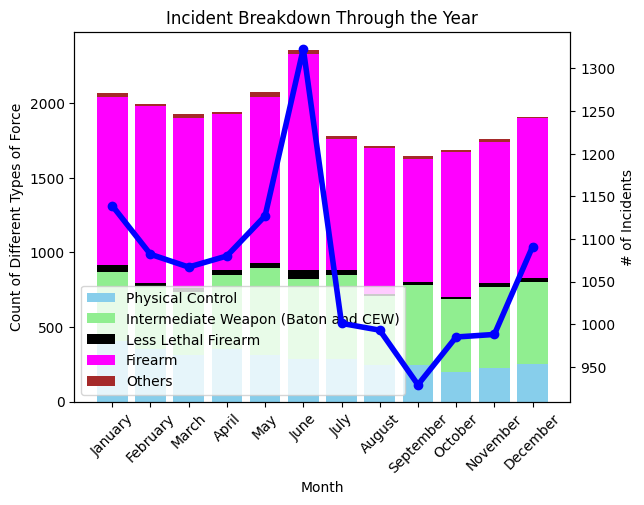

In [886]:
month_nameTypeOfForce = df_records.groupby('month_name')[['Physical_combined','IntermediateWeapon_combined', 'LessLethalFirearm_combined', 'Firearm_combined', 'TypeForceUsed_Other_Check']].sum().reset_index()
month_nameTypeOfForce['month_name'] = pd.Categorical(
    month_nameTypeOfForce['month_name'], 
    categories=['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December'],
    ordered=True
)
month_nameTypeOfForce = month_nameTypeOfForce.sort_values('month_name')
month_name = month_nameTypeOfForce['month_name']
Physical_combined = month_nameTypeOfForce['Physical_combined']
IntermediateWeapon_combined = month_nameTypeOfForce['IntermediateWeapon_combined']
LessLethalFirearm_combined = month_nameTypeOfForce['LessLethalFirearm_combined']
Firearm_combined = month_nameTypeOfForce['Firearm_combined']
TypeForceUsed_Other_Check = month_nameTypeOfForce['TypeForceUsed_Other_Check']

fig, ax1 = plt.subplots()

# Plot the bars
ax1.bar(month_name, Physical_combined, label='Physical Control', color='skyblue')
ax1.bar(month_name, IntermediateWeapon_combined, bottom=Physical_combined, label='Intermediate Weapon (Baton and CEW)', color='lightgreen')
ax1.bar(month_name, LessLethalFirearm_combined, bottom=Physical_combined + IntermediateWeapon_combined, label='Less Lethal Firearm', color='black')
ax1.bar(month_name, Firearm_combined, bottom=Physical_combined + IntermediateWeapon_combined+LessLethalFirearm_combined, label='Firearm', color='magenta')
ax1.bar(month_name, TypeForceUsed_Other_Check, bottom=Physical_combined + IntermediateWeapon_combined+LessLethalFirearm_combined+Firearm_combined, label='Others', color='brown')

ax2 = ax1.twinx() 
ax2.plot(monthly_incidents['month_name'], monthly_incidents['IncidentNumber'], marker='o', c='b', linewidth='4')

# Add labels and title
ax1.set_ylabel('Count of Different Types of Force')
ax1.set_xlabel('Month')
ax1.set_title('Incident Breakdown Through the Year')
ax1.tick_params(axis='x', rotation=45) 

# Add a legend
ax1.legend(loc='lower left')
ax2.set_ylabel('# of Incidents')
# Show the plot
plt.show()

In [ ]:
x = np.arange(0, 10, 0.1)
y1 = 0.05 * x**2
y2 = -1 *y1

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y2 data', color='b')

plt.show()

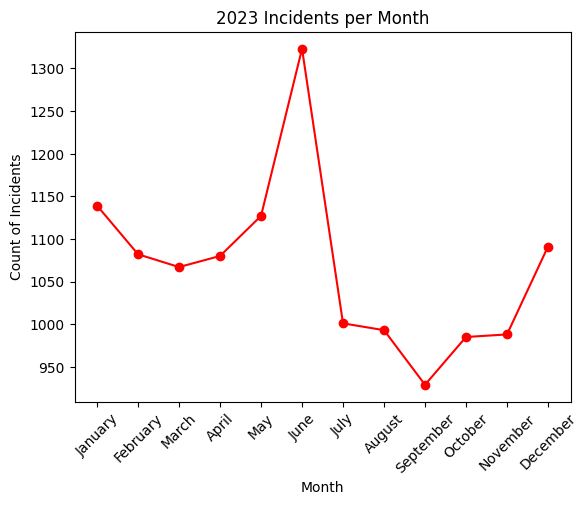

In [653]:
plt.plot(monthly_incidents['month_name'], monthly_incidents['IncidentNumber'], marker='o', c='r')
plt.xlabel('Month')
plt.ylabel('Count of Incidents')
plt.title('2023 Incidents per Month')
plt.xticks(rotation=45) 
plt.show()

Which age group?

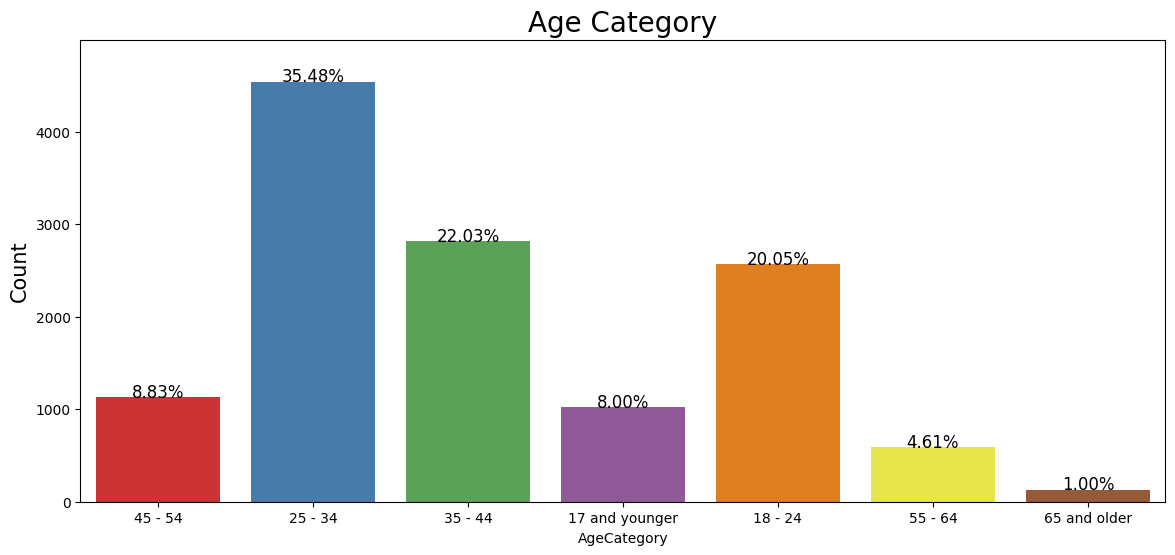

In [538]:
total = df_records.AgeCategory[~df_indiv_records.AgeCategory.isnull()].shape[0]

plt.figure(figsize = (14,6))

ax = sns.countplot(x="AgeCategory", data=df_records, palette="Set1", legend=False, hue = "AgeCategory")
ax.set_ylabel("Count", fontsize=15)
ax.set_title("Age Category", fontsize=20)
sizes=[]
for p in ax.patches:
    height = p.get_height()
    sizes.append(height)
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
ax.set_ylim(0, max(sizes) * 1.10)

plt.show()

Which race?

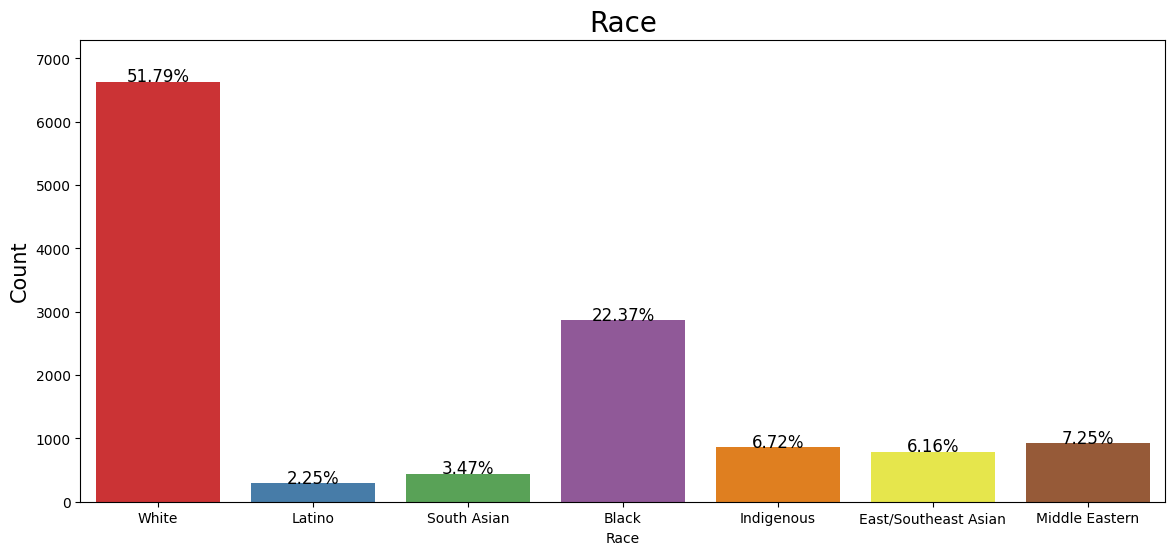

In [539]:
total = df_records.Race[~df_indiv_records.Race.isnull()].shape[0]

plt.figure(figsize = (14,6))

ax = sns.countplot(x="Race", data=df_records, palette="Set1", legend=False, hue = "Race")
ax.set_ylabel("Count", fontsize=15)
ax.set_title("Race", fontsize=20)
sizes=[]
for p in ax.patches:
    height = p.get_height()
    sizes.append(height)
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
ax.set_ylim(0, max(sizes) * 1.10)

plt.show()

What type of force used as per age group?

In [622]:
age_grouptypeofforce = df_records.groupby('AgeCategory')[['Physical_combined','IntermediateWeapon_combined', 'LessLethalFirearm_combined', 'Firearm_combined', 'TypeForceUsed_Other_Check']].sum().reset_index()

In [623]:
age_grouptypeofforceT = age_grouptypeofforce.T.drop(['AgeCategory']).reset_index().rename({'index':'TypeOfForce', 0:'17 and younger', 1:'18 - 24', 2:'25 - 34', 3:'35 - 44', 4:'45 - 54',5:'55 - 64',6:'65 and older'}, axis=1)

In [624]:
age_grouptypeofforceT.set_index('TypeOfForce', inplace=True)

In [626]:
age_grouptypeofforceT.index = ['Physical Control', 'Intermediate Weapon (Baton and CEW)', 'Less Lethal Firearm', 'Firearm', 'Others']
age_grouptypeofforceT.reset_index(inplace=True)
age_grouptypeofforceT.rename(columns={'index':"Type of Force Used"}, inplace=True)

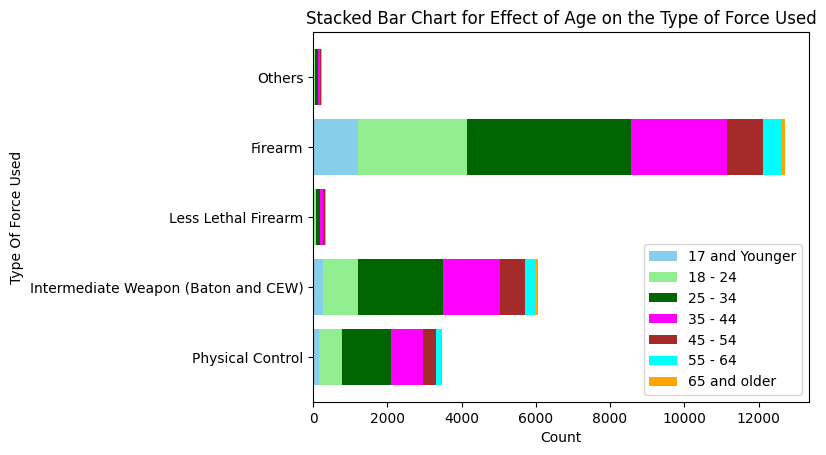

In [633]:
TypeOfForce = age_grouptypeofforceT['Type of Force Used']
agegroup17orunder = age_grouptypeofforceT['17 and younger']
agegroup18to24 = age_grouptypeofforceT['18 - 24']
agegroup25to34 = age_grouptypeofforceT['25 - 34']
agegroup35to44 = age_grouptypeofforceT['35 - 44']
agegroup45to54 = age_grouptypeofforceT['45 - 54']
agegroup55to64 = age_grouptypeofforceT['55 - 64']
agegroup65andolder = age_grouptypeofforceT['65 and older']

fig, ax = plt.subplots()

# Plot the bars
ax.barh(TypeOfForce, agegroup17orunder, label='17 and Younger', color='skyblue')
ax.barh(TypeOfForce, agegroup18to24, left=agegroup17orunder, label='18 - 24', color='lightgreen')
ax.barh(TypeOfForce, agegroup25to34, left=agegroup17orunder + agegroup18to24, label='25 - 34', color='darkgreen')
ax.barh(TypeOfForce, agegroup35to44, left=agegroup17orunder + agegroup18to24+agegroup25to34, label='35 - 44', color='magenta')
ax.barh(TypeOfForce, agegroup45to54, left=agegroup17orunder + agegroup18to24+agegroup25to34+agegroup35to44, label='45 - 54', color='brown')
ax.barh(TypeOfForce, agegroup55to64, left=agegroup17orunder + agegroup18to24+agegroup25to34+agegroup35to44+agegroup45to54, label='55 - 64', color='cyan')
ax.barh(TypeOfForce, agegroup65andolder, left=agegroup17orunder + agegroup18to24+agegroup25to34+agegroup35to44+agegroup45to54+agegroup55to64, label='65 and older', color='orange')

# Add labels and title
ax.set_ylabel('Type Of Force Used')
ax.set_xlabel('Count')
ax.set_title('Stacked Bar Chart for Effect of Age on the Type of Force Used')

# Add a legend
ax.legend()

# Show the plot
plt.show()


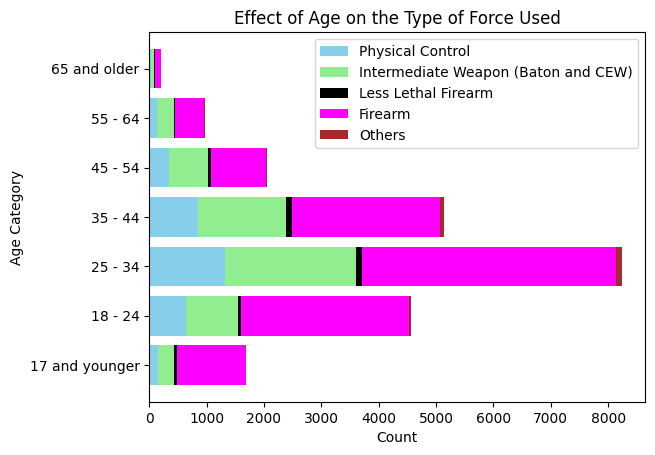

In [853]:
AgeCategory = age_grouptypeofforce['AgeCategory']
Physical_combined = age_grouptypeofforce['Physical_combined']
IntermediateWeapon_combined = age_grouptypeofforce['IntermediateWeapon_combined']
LessLethalFirearm_combined = age_grouptypeofforce['LessLethalFirearm_combined']
Firearm_combined = age_grouptypeofforce['Firearm_combined']
TypeForceUsed_Other_Check = age_grouptypeofforce['TypeForceUsed_Other_Check']

fig, ax = plt.subplots()

# Plot the bars
ax.barh(AgeCategory, Physical_combined, label='Physical Control', color='skyblue')
ax.barh(AgeCategory, IntermediateWeapon_combined, left=Physical_combined, label='Intermediate Weapon (Baton and CEW)', color='lightgreen')
ax.barh(AgeCategory, LessLethalFirearm_combined, left=Physical_combined + IntermediateWeapon_combined, label='Less Lethal Firearm', color='black')
ax.barh(AgeCategory, Firearm_combined, left=Physical_combined + IntermediateWeapon_combined+LessLethalFirearm_combined, label='Firearm', color='magenta')
ax.barh(AgeCategory, TypeForceUsed_Other_Check, left=Physical_combined + IntermediateWeapon_combined+LessLethalFirearm_combined+Firearm_combined, label='Others', color='brown')


# Add labels and title
ax.set_ylabel('Age Category')
ax.set_xlabel('Count')
ax.set_title('Effect of Age on the Type of Force Used')

# Add a legend
ax.legend()

# Show the plot
plt.show()


Gender effect on type of force used

In [645]:
Gendertypeofforce = df_records.groupby('Gender')[['Physical_combined','IntermediateWeapon_combined', 'LessLethalFirearm_combined', 'Firearm_combined', 'TypeForceUsed_Other_Check']].sum().reset_index()

In [639]:
df_records.Gender.unique()

array(['Male', 'Female', 'Trans/Non-binary/Other'], dtype=object)

In [646]:
GendertypeofforceT = Gendertypeofforce.T.drop(['Gender']).reset_index().rename({'index':'TypeOfForce', 0:'Female', 1:'Male', 2:'Trans/Non-binary/Other'}, axis=1)

In [648]:
GendertypeofforceT.set_index('TypeOfForce', inplace=True)

In [649]:
GendertypeofforceT.index = ['Physical Control', 'Intermediate Weapon (Baton and CEW)', 'Less Lethal Firearm', 'Firearm', 'Others']
GendertypeofforceT.reset_index(inplace=True)
GendertypeofforceT.rename(columns={'index':"Type of Force Used"}, inplace=True)

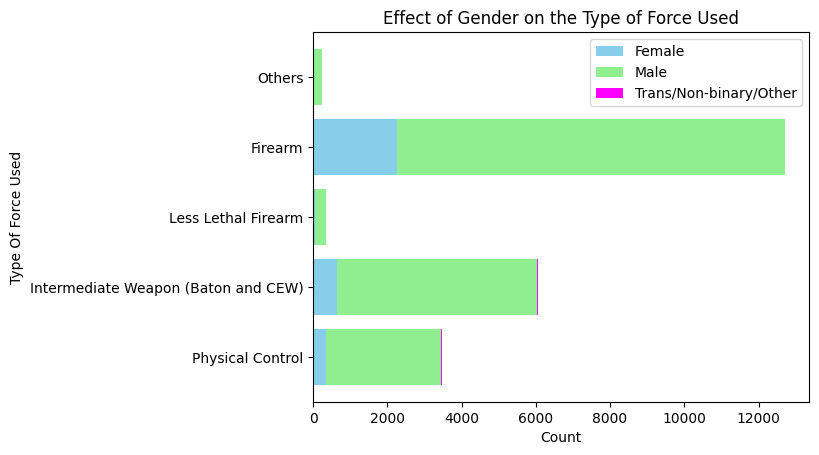

In [651]:
TypeOfForce = GendertypeofforceT['Type of Force Used']
Female = GendertypeofforceT['Female']
Male = GendertypeofforceT['Male']
TransNonBinaryOther = GendertypeofforceT['Trans/Non-binary/Other']


fig, ax = plt.subplots()

# Plot the bars
ax.barh(TypeOfForce, Female, label='Female', color='skyblue')
ax.barh(TypeOfForce, Male, left=Female, label='Male', color='lightgreen')
ax.barh(TypeOfForce, TransNonBinaryOther, left=Female + Male, label='Trans/Non-binary/Other', color='magenta')

# Add labels and title
ax.set_ylabel('Type Of Force Used')
ax.set_xlabel('Count')
ax.set_title('Effect of Gender on the Type of Force Used')

# Add a legend
ax.legend()

# Show the plot
plt.show()


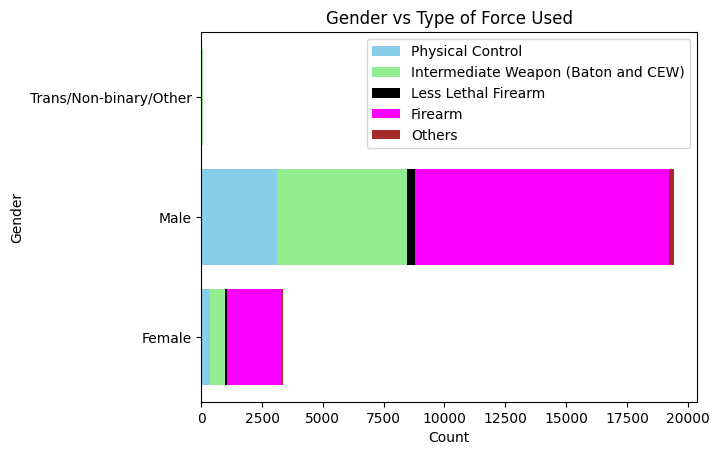

In [772]:
Gendertypeofforce = df_records.groupby('Gender')[['Physical_combined','IntermediateWeapon_combined', 'LessLethalFirearm_combined', 'Firearm_combined', 'TypeForceUsed_Other_Check']].sum().reset_index()
Gender = Gendertypeofforce['Gender']
Physical_combined = Gendertypeofforce['Physical_combined']
IntermediateWeapon_combined = Gendertypeofforce['IntermediateWeapon_combined']
LessLethalFirearm_combined = Gendertypeofforce['LessLethalFirearm_combined']
Firearm_combined = Gendertypeofforce['Firearm_combined']
TypeForceUsed_Other_Check = Gendertypeofforce['TypeForceUsed_Other_Check']

fig, ax = plt.subplots()

# Plot the bars
ax.barh(Gender, Physical_combined, label='Physical Control', color='skyblue')
ax.barh(Gender, IntermediateWeapon_combined, left=Physical_combined, label='Intermediate Weapon (Baton and CEW)', color='lightgreen')
ax.barh(Gender, LessLethalFirearm_combined, left=Physical_combined + IntermediateWeapon_combined, label='Less Lethal Firearm', color='black')
ax.barh(Gender, Firearm_combined, left=Physical_combined + IntermediateWeapon_combined+LessLethalFirearm_combined, label='Firearm', color='magenta')
ax.barh(Gender, TypeForceUsed_Other_Check, left=Physical_combined + IntermediateWeapon_combined+LessLethalFirearm_combined+Firearm_combined, label='Others', color='brown')


# Add labels and title
ax.set_ylabel('Gender')
ax.set_xlabel('Count')
ax.set_title('Gender vs Type of Force Used')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [860]:
Trans_Non_binary_Other = df_records[df_records['Gender']=='Trans/Non-binary/Other']

In [ ]:
Trans_Non_binary_Other[[]]

plt.figure(figsize = (14,6))

ax = sns.countplot(x="Race", data=df_records, palette="Set1", legend=False, hue = "Race")
ax.set_ylabel("Count", fontsize=15)
ax.set_title("Race", fontsize=20)
sizes=[]
for p in ax.patches:
    height = p.get_height()
    sizes.append(height)
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
ax.set_ylim(0, max(sizes) * 1.10)

plt.show()

Race

In [652]:
df_records.Race.unique()

array(['White', 'Latino', 'South Asian', 'Black', 'Indigenous',
       'East/Southeast Asian', 'Middle Eastern'], dtype=object)

In [ ]:
Gendertypeofforce = df_records.groupby('Race')[['Physical_combined','IntermediateWeapon_combined', 'LessLethalFirearm_combined', 'Firearm_combined', 'TypeForceUsed_Other_Check']].sum().reset_index()

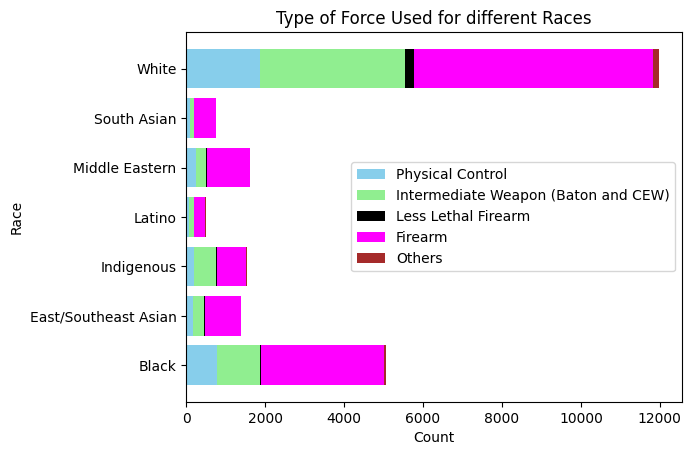

In [773]:
RaceTypetypeofforce = df_records.groupby('Race')[['Physical_combined','IntermediateWeapon_combined', 'LessLethalFirearm_combined', 'Firearm_combined', 'TypeForceUsed_Other_Check']].sum().reset_index()
Race = RaceTypetypeofforce['Race']
Physical_combined = RaceTypetypeofforce['Physical_combined']
IntermediateWeapon_combined = RaceTypetypeofforce['IntermediateWeapon_combined']
LessLethalFirearm_combined = RaceTypetypeofforce['LessLethalFirearm_combined']
Firearm_combined = RaceTypetypeofforce['Firearm_combined']
TypeForceUsed_Other_Check = RaceTypetypeofforce['TypeForceUsed_Other_Check']

fig, ax = plt.subplots()

# Plot the bars
ax.barh(Race, Physical_combined, label='Physical Control', color='skyblue')
ax.barh(Race, IntermediateWeapon_combined, left=Physical_combined, label='Intermediate Weapon (Baton and CEW)', color='lightgreen')
ax.barh(Race, LessLethalFirearm_combined, left=Physical_combined + IntermediateWeapon_combined, label='Less Lethal Firearm', color='black')
ax.barh(Race, Firearm_combined, left=Physical_combined + IntermediateWeapon_combined+LessLethalFirearm_combined, label='Firearm', color='magenta')
ax.barh(Race, TypeForceUsed_Other_Check, left=Physical_combined + IntermediateWeapon_combined+LessLethalFirearm_combined+Firearm_combined, label='Others', color='brown')


# Add labels and title
ax.set_ylabel('Race')
ax.set_xlabel('Count')
ax.set_title('Type of Force Used for different Races')

# Add a legend
ax.legend()

# Show the plot
plt.show()

IncidentType

In [661]:
df_records.IncidentType.unique()

array(['Weapon(s)', 'Executing Warrant (e.g., DNA, arrest, search)',
       'Assisting Other Police Service/Agency (e.g., EMS, animal welfare inspectors)',
       'Barricaded Individual/Disturbance/Individual in Crisis/Wellness/Safety Check',
       'Family/Neighbour/Other Type of Dispute',
       'Other Federal/Provincial Statutes (e.g., LLA)',
       'Traffic (e.g., RIDE, vehicle collision)',
       'Violent Crime (including Intimate Partner Violence)',
       'Active Attacker',
       'Police Custody Related (e.g. prisoner control, fingerprinting, lock-up area)',
       'Person Stop', 'Stolen Vehicle',
       'Investigation (follow-up, ongoing)', 'Property Crime', 'Alarm',
       'Public Order', 'Animal Complaint'], dtype=object)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


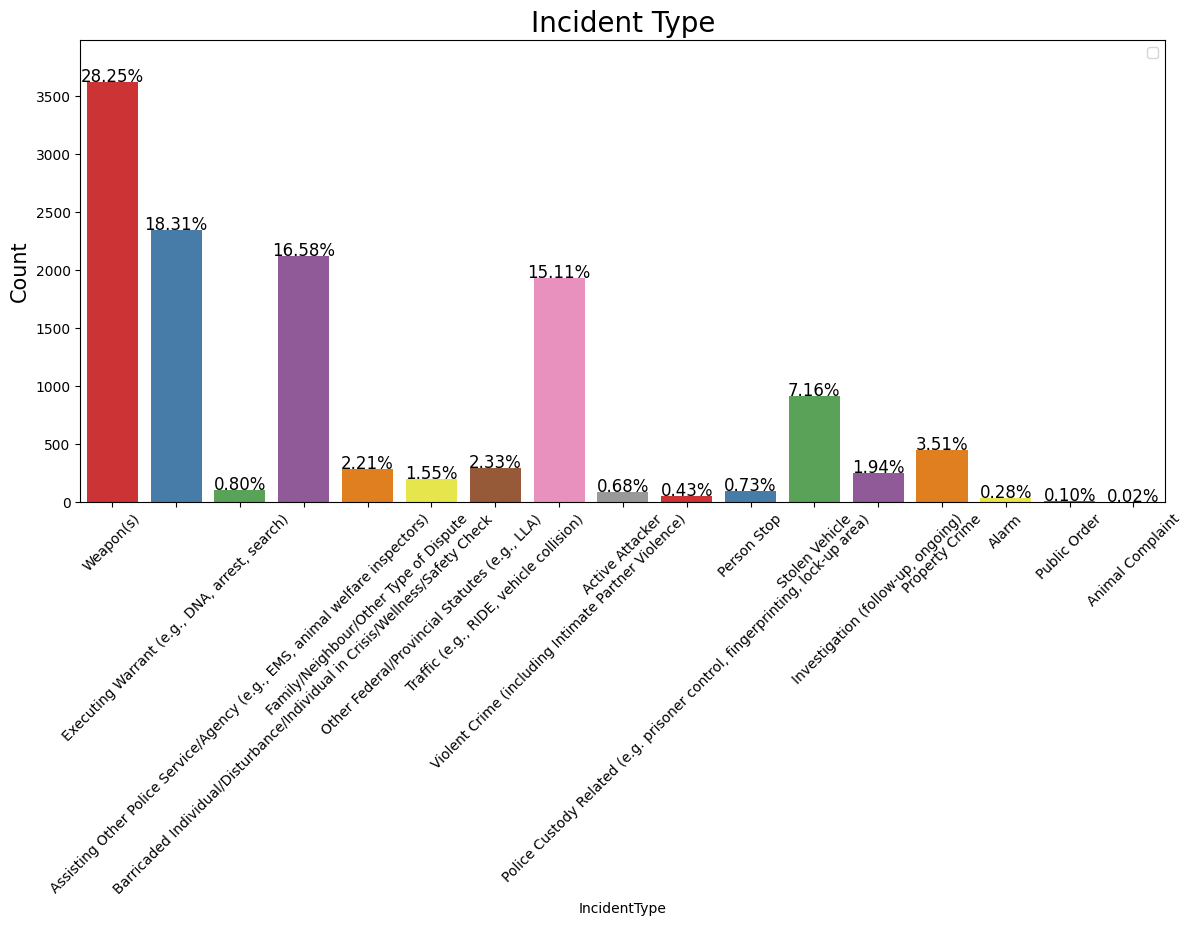

In [673]:
total = df_records.shape[0]

plt.figure(figsize = (14,6))

ax = sns.countplot(x="IncidentType", data=df_records, palette="Set1", legend=False, hue = "IncidentType")
ax.set_ylabel("Count", fontsize=15)
ax.tick_params(axis='x', labelrotation = 45)
ax.set_title("Incident Type", fontsize=20)
sizes=[]
for p in ax.patches:
    height = p.get_height()
    sizes.append(height)
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
ax.set_ylim(0, max(sizes) * 1.10)
ax.legend()
plt.show()

What Type of Force was used for each incident type

In [677]:
IncidentTypetypeofforce = df_records.groupby('IncidentType')[['Physical_combined','IntermediateWeapon_combined', 'LessLethalFirearm_combined', 'Firearm_combined', 'TypeForceUsed_Other_Check']].sum().reset_index()
IncidentTypetypeofforce

,IncidentType,Physical_combined,IntermediateWeapon_combined,LessLethalFirearm_combined,Firearm_combined,TypeForceUsed_Other_Check
0,Active Attacker,35.0,60.0,0.0,54.0,0.0
1,Alarm,2.0,19.0,0.0,27.0,3.0
2,Animal Complaint,0.0,4.0,0.0,2.0,0.0
3,"Assisting Other Police Service/Agency (e.g., E...",41.0,79.0,6.0,56.0,4.0
4,Barricaded Individual/Disturbance/Individual i...,878.0,2033.0,98.0,1096.0,27.0
5,"Executing Warrant (e.g., DNA, arrest, search)",598.0,439.0,79.0,2844.0,84.0
6,Family/Neighbour/Other Type of Dispute,99.0,301.0,4.0,128.0,4.0
7,"Investigation (follow-up, ongoing)",80.0,128.0,3.0,236.0,4.0
8,"Other Federal/Provincial Statutes (e.g., LLA)",138.0,141.0,1.0,131.0,3.0
9,Person Stop,45.0,55.0,0.0,75.0,0.0


c:\Users\srafi\miniconda3\envs\cap2proj\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


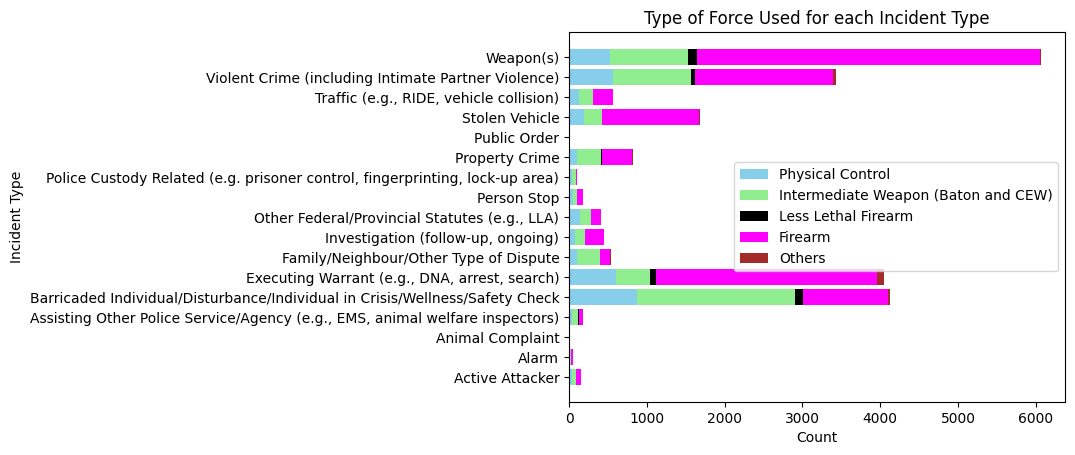

In [680]:
IncidentTypetypeofforce = df_records.groupby('IncidentType')[['Physical_combined','IntermediateWeapon_combined', 'LessLethalFirearm_combined', 'Firearm_combined', 'TypeForceUsed_Other_Check']].sum().reset_index()
IncidentType = IncidentTypetypeofforce['IncidentType']
Physical_combined = IncidentTypetypeofforce['Physical_combined']
IntermediateWeapon_combined = IncidentTypetypeofforce['IntermediateWeapon_combined']
LessLethalFirearm_combined = IncidentTypetypeofforce['LessLethalFirearm_combined']
Firearm_combined = IncidentTypetypeofforce['Firearm_combined']
TypeForceUsed_Other_Check = IncidentTypetypeofforce['TypeForceUsed_Other_Check']

fig, ax = plt.subplots()

# Plot the bars
ax.barh(IncidentType, Physical_combined, label='Physical Control', color='skyblue')
ax.barh(IncidentType, IntermediateWeapon_combined, left=Physical_combined, label='Intermediate Weapon (Baton and CEW)', color='lightgreen')
ax.barh(IncidentType, LessLethalFirearm_combined, left=Physical_combined + IntermediateWeapon_combined, label='Less Lethal Firearm', color='black')
ax.barh(IncidentType, Firearm_combined, left=Physical_combined + IntermediateWeapon_combined+LessLethalFirearm_combined, label='Firearm', color='magenta')
ax.barh(IncidentType, TypeForceUsed_Other_Check, left=Physical_combined + IntermediateWeapon_combined+LessLethalFirearm_combined+Firearm_combined, label='Others', color='brown')


# Add labels and title
ax.set_ylabel('Incident Type')
ax.set_xlabel('Count')
ax.set_title('Type of Force Used for each Incident Type')

# Add a legend
ax.legend()

# Show the plot
plt.show()


 Pairplot

### Heat Map of the numerical features 
To check if there is any correlation between numerical features, they are separated from the rest and a heat map is plotted.

In [682]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_records_numerics = df_records.select_dtypes(include=numerics)

In [689]:
'''
# Show a seaborn heatmap of correlations in dffloat
plt.figure(figsize = (13,12))
corr = df_records_numerics.corr()
kot = corr[corr>=0.995]
sns.heatmap(kot ,xticklabels=corr.columns, yticklabels=corr.columns,cmap="RdBu_r")
'''

'\n# Show a seaborn heatmap of correlations in dffloat\nplt.figure(figsize = (13,12))\ncorr = df_records_numerics.corr()\nkot = corr[corr>=0.995]\nsns.heatmap(kot ,xticklabels=corr.columns, yticklabels=corr.columns,cmap="RdBu_r")\n'

In [693]:
df_records.ReportType.unique()

array(['Individual', 'Team'], dtype=object)

Does the type of force is affected by the number of the team?

In [694]:
df_records.NumberTeam.unique()

array([nan,  5.,  2.,  9., 14., 11., 10.,  4.,  3., 12.,  8.,  7.,  6.,
       15., 13., 17., 16., 30., 18.])

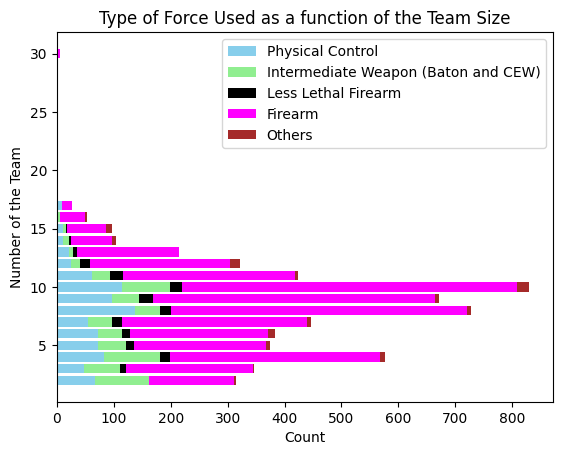

In [775]:
NumberTeamTypeOfForce = df_records.groupby('NumberTeam')[['Physical_combined','IntermediateWeapon_combined', 'LessLethalFirearm_combined', 'Firearm_combined', 'TypeForceUsed_Other_Check']].sum().reset_index()
NumberTeam = NumberTeamTypeOfForce['NumberTeam']
Physical_combined = NumberTeamTypeOfForce['Physical_combined']
IntermediateWeapon_combined = NumberTeamTypeOfForce['IntermediateWeapon_combined']
LessLethalFirearm_combined = NumberTeamTypeOfForce['LessLethalFirearm_combined']
Firearm_combined = NumberTeamTypeOfForce['Firearm_combined']
TypeForceUsed_Other_Check = NumberTeamTypeOfForce['TypeForceUsed_Other_Check']

fig, ax = plt.subplots()

# Plot the bars
ax.barh(NumberTeam, Physical_combined, label='Physical Control', color='skyblue')
ax.barh(NumberTeam, IntermediateWeapon_combined, left=Physical_combined, label='Intermediate Weapon (Baton and CEW)', color='lightgreen')
ax.barh(NumberTeam, LessLethalFirearm_combined, left=Physical_combined + IntermediateWeapon_combined, label='Less Lethal Firearm', color='black')
ax.barh(NumberTeam, Firearm_combined, left=Physical_combined + IntermediateWeapon_combined+LessLethalFirearm_combined, label='Firearm', color='magenta')
ax.barh(NumberTeam, TypeForceUsed_Other_Check, left=Physical_combined + IntermediateWeapon_combined+LessLethalFirearm_combined+Firearm_combined, label='Others', color='brown')


# Add labels and title
ax.set_ylabel('Number of the Team')
ax.set_xlabel('Count')
ax.set_title('Type of Force Used as a function of the Team Size')

# Add a legend
ax.legend()

# Show the plot
plt.show()

Is type of force is different for individuals vs animals?

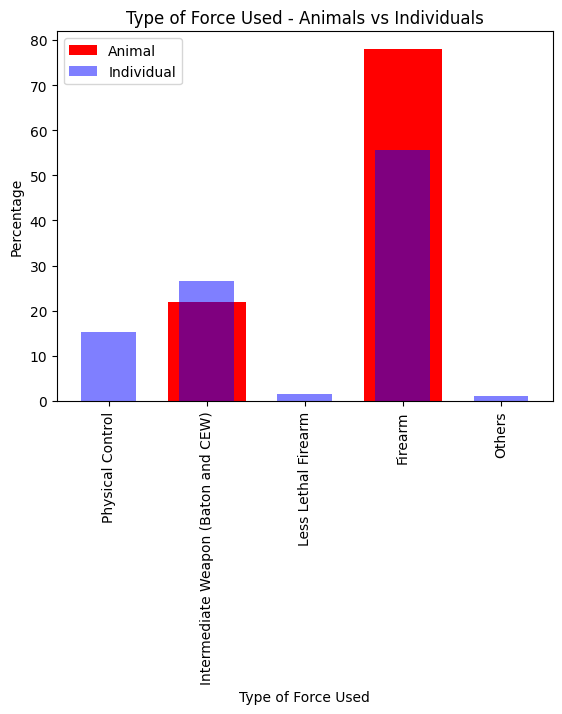

In [774]:
# Sum the occurrence of each category
NoIndividualAnimalOnly_TypeForceUsedcols = list(get_unique(df_main_records, 'NoIndividualAnimalOnly_TypeForceUsed')[0].keys())
category_counts_animal = df_main_records[NoIndividualAnimalOnly_TypeForceUsedcols].sum() * 100 /(df_main_records[NoIndividualAnimalOnly_TypeForceUsedcols].sum()).sum()
category_counts_animal['Physical']=0
category_counts_animal['Less Lethal Firearm']=0
category_counts_animal['Others']=0


#category_counts_animal_index = [add_space_before_capitals(item.split('NoIndividualAnimalOnly_TypeForceUsed_')[1]) for item in category_counts_animal.index]
# for between two _ we use this code s.split('_')[1].split('_')[0].strip('.')
category_counts_animal.index = ['Intermediate Weapon (Baton and CEW)', 'Firearm', 'Physical Control', 'Less Lethal Firearm', 'Others']
category_counts_animal = pd.Series([0,22.0,0.0,78.0,0])

TypeOfForcecols = ['Physical_combined','IntermediateWeapon_combined', 'LessLethalFirearm_combined', 'Firearm_combined', 'TypeForceUsed_Other_Check']
category_counts_indiv = df_indiv_records[TypeOfForcecols].sum() * 100 /(df_indiv_records[TypeOfForcecols].sum()).sum()
category_counts_indiv_index = ['Physical Control', 'Intermediate Weapon (Baton and CEW)', 'Less Lethal Firearm', 'Firearm', 'Others']
# for between two _ we use this code s.split('_')[1].split('_')[0].strip('.')
category_counts_indiv.index = category_counts_indiv_index

width =0.8

# Plot
fig, ax = plt.subplots()
#colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0']
category_counts_animal.plot(kind='bar', color='red', width = width, label='Animal')
category_counts_indiv.plot(kind='bar', color='blue', width = width*0.7, label='Individual', alpha=0.5)
plt.title('Type of Force Used - Animals vs Individuals')
plt.xlabel('Type of Force Used')
plt.ylabel('Percentage')

plt.legend()
plt.show()

Effect of distance between animal and officer and the type of force used?

Does Type of location affects the type of force used?


In [ ]:
DistanceTypeOfForce = df_records.groupby('DistanceBetweenOfficerAndIndividual')[['Physical_combined','IntermediateWeapon_combined', 'LessLethalFirearm_combined', 'Firearm_combined', 'TypeForceUsed_Other_Check']].sum().reset_index()
Distance = DistanceTypeOfForce['DistanceBetweenOfficerAndIndividual']
Physical_combined = DistanceTypeOfForce['Physical_combined']
IntermediateWeapon_combined = DistanceTypeOfForce['IntermediateWeapon_combined']
LessLethalFirearm_combined = DistanceTypeOfForce['LessLethalFirearm_combined']
Firearm_combined = DistanceTypeOfForce['Firearm_combined']
TypeForceUsed_Other_Check = DistanceTypeOfForce['TypeForceUsed_Other_Check']

fig, ax = plt.subplots()

# Plot the bars
ax.barh(Distance, Physical_combined, label='Physical Control', color='skyblue')
ax.barh(Distance, IntermediateWeapon_combined, left=Physical_combined, label='Intermediate Weapon (Baton and CEW)', color='lightgreen')
ax.barh(Distance, LessLethalFirearm_combined, left=Physical_combined + IntermediateWeapon_combined, label='Less Lethal Firearm', color='black')
ax.barh(Distance, Firearm_combined, left=Physical_combined + IntermediateWeapon_combined+LessLethalFirearm_combined, label='Firearm', color='magenta')
ax.barh(Distance, TypeForceUsed_Other_Check, left=Physical_combined + IntermediateWeapon_combined+LessLethalFirearm_combined+Firearm_combined, label='Others', color='brown')


# Add labels and title
ax.set_ylabel('Distance Between Officer and Individual')
ax.set_xlabel('Count')
ax.set_title('Effect of Distance Between Officer and Individual on Type of Force Used')

# Add a legend
ax.legend()

# Show the plot
plt.show()

Does the distance between office and individual affects the type of force used?

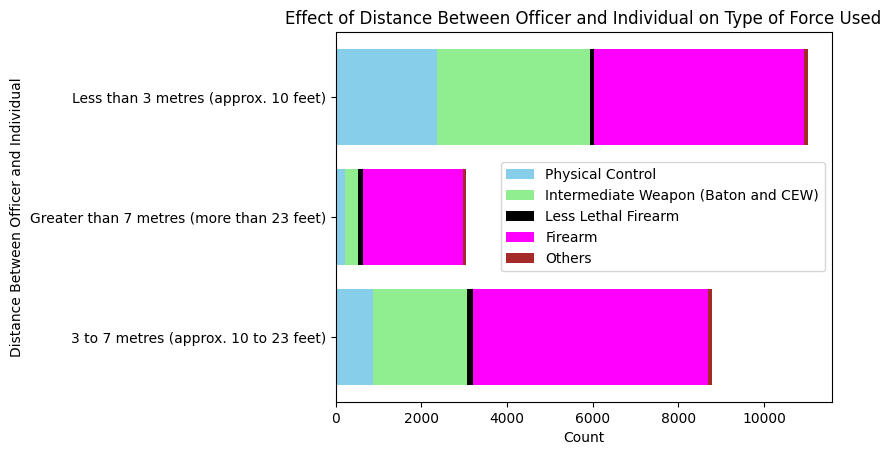

In [778]:
DistanceTypeOfForce = df_records.groupby('DistanceBetweenOfficerAndIndividual')[['Physical_combined','IntermediateWeapon_combined', 'LessLethalFirearm_combined', 'Firearm_combined', 'TypeForceUsed_Other_Check']].sum().reset_index()
Distance = DistanceTypeOfForce['DistanceBetweenOfficerAndIndividual']
Physical_combined = DistanceTypeOfForce['Physical_combined']
IntermediateWeapon_combined = DistanceTypeOfForce['IntermediateWeapon_combined']
LessLethalFirearm_combined = DistanceTypeOfForce['LessLethalFirearm_combined']
Firearm_combined = DistanceTypeOfForce['Firearm_combined']
TypeForceUsed_Other_Check = DistanceTypeOfForce['TypeForceUsed_Other_Check']

fig, ax = plt.subplots()

# Plot the bars
ax.barh(Distance, Physical_combined, label='Physical Control', color='skyblue')
ax.barh(Distance, IntermediateWeapon_combined, left=Physical_combined, label='Intermediate Weapon (Baton and CEW)', color='lightgreen')
ax.barh(Distance, LessLethalFirearm_combined, left=Physical_combined + IntermediateWeapon_combined, label='Less Lethal Firearm', color='black')
ax.barh(Distance, Firearm_combined, left=Physical_combined + IntermediateWeapon_combined+LessLethalFirearm_combined, label='Firearm', color='magenta')
ax.barh(Distance, TypeForceUsed_Other_Check, left=Physical_combined + IntermediateWeapon_combined+LessLethalFirearm_combined+Firearm_combined, label='Others', color='brown')


# Add labels and title
ax.set_ylabel('Distance Between Officer and Individual')
ax.set_xlabel('Count')
ax.set_title('Effect of Distance Between Officer and Individual on Type of Force Used')

# Add a legend
ax.legend()

# Show the plot
plt.show()

How factors influences the type of force used?

'FactorsInfluenceResponse_NatureIncident',
 'FactorsInfluenceResponse_PastHistory',
 'FactorsInfluenceResponse_PhysicalSizeStrength',
 'FactorsInfluenceResponse_OtherFactors',

In [816]:
NatureIncidentTypeOfForce = df_records.groupby('FactorsInfluenceResponse_NatureIncident')[['Physical_combined','IntermediateWeapon_combined', 'LessLethalFirearm_combined', 'Firearm_combined', 'TypeForceUsed_Other_Check']].sum().reset_index()
PastHistoryTypeOfForce = df_records.groupby('FactorsInfluenceResponse_PastHistory')[['Physical_combined','IntermediateWeapon_combined', 'LessLethalFirearm_combined', 'Firearm_combined', 'TypeForceUsed_Other_Check']].sum().reset_index()
PhysicalSizeStrengthTypeOfForce = df_records.groupby('FactorsInfluenceResponse_PhysicalSizeStrength')[['Physical_combined','IntermediateWeapon_combined', 'LessLethalFirearm_combined', 'Firearm_combined', 'TypeForceUsed_Other_Check']].sum().reset_index()
OtherFactorsTypeOfForce = df_records.groupby('FactorsInfluenceResponse_OtherFactors')[['Physical_combined','IntermediateWeapon_combined', 'LessLethalFirearm_combined', 'Firearm_combined', 'TypeForceUsed_Other_Check']].sum().reset_index()


In [817]:
df1 = NatureIncidentTypeOfForce.iloc[:,1:]
df2 = PastHistoryTypeOfForce.iloc[:,1:]
df3 = PhysicalSizeStrengthTypeOfForce.iloc[:,1:]
df4 = OtherFactorsTypeOfForce.iloc[:,1:]
pieces = (df1, df2, df3, df4)
df=pd.concat(pieces)
df.index=['Nature of Incident', 'Past History of Individual', 'Physical (Size and Strength)', 'Other Factors']

In [818]:
df.rename(columns={'Physical_combined':'Physical Control', 
                   'IntermediateWeapon_combined':'Intermediate Weapon (Baton and CEW)', 
                   'LessLethalFirearm_combined': 'Less Lethal Firearm', 
                   'Firearm_combined':'Firearm', 
                   'TypeForceUsed_Other_Check':'Others'}, inplace=True)

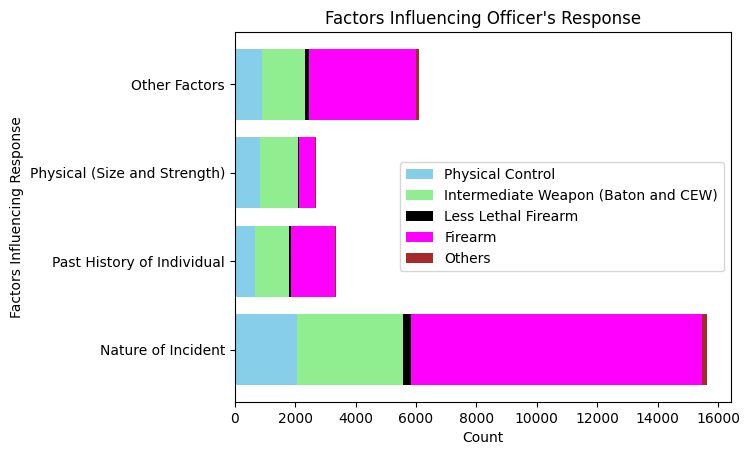

In [819]:
# Create a figure and an axis
fig, ax = plt.subplots()

# Start with the first category
ax.barh(df.index, df['Physical Control'], label='Physical Control', color='skyblue')
ax.barh(df.index, df['Intermediate Weapon (Baton and CEW)'], left=df['Physical Control'], label='Intermediate Weapon (Baton and CEW)',  color='lightgreen')
ax.barh(df.index, df['Less Lethal Firearm'], left=df['Physical Control'] + df['Intermediate Weapon (Baton and CEW)'], label='Less Lethal Firearm',  color='black')
ax.barh(df.index, df['Firearm'], left=df['Physical Control'] + df['Intermediate Weapon (Baton and CEW)']+df['Less Lethal Firearm'], label='Firearm',  color='magenta')
ax.barh(df.index, df['Others'], left=df['Physical Control'] + df['Intermediate Weapon (Baton and CEW)']+df['Less Lethal Firearm']+df['Firearm'], label='Others',  color='brown')

# Add labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Factors Influencing Response')
ax.set_title("Factors Influencing Officer's Response")

# Add a legend
ax.legend()

# Show the plot
plt.show()


Do OPP and Municpal police have same type of force used strategies?

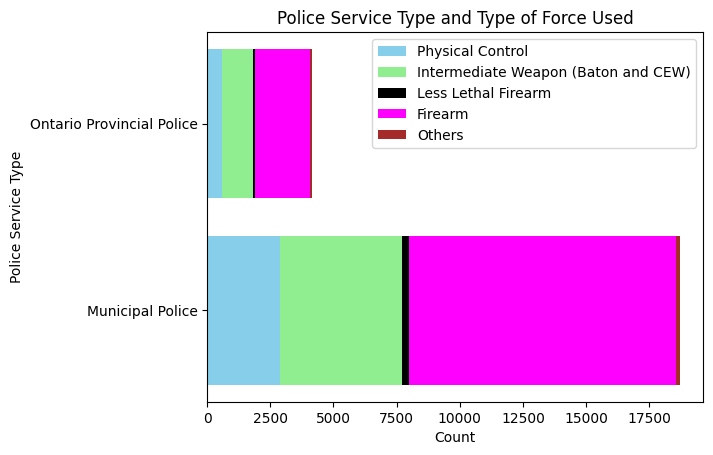

In [791]:
PoliceServiceTypeTypeOfForce = df_records.groupby('PoliceServiceType')[['Physical_combined','IntermediateWeapon_combined', 'LessLethalFirearm_combined', 'Firearm_combined', 'TypeForceUsed_Other_Check']].sum().reset_index()
PoliceServiceType = PoliceServiceTypeTypeOfForce['PoliceServiceType']
Physical_combined = PoliceServiceTypeTypeOfForce['Physical_combined']
IntermediateWeapon_combined = PoliceServiceTypeTypeOfForce['IntermediateWeapon_combined']
LessLethalFirearm_combined = PoliceServiceTypeTypeOfForce['LessLethalFirearm_combined']
Firearm_combined = PoliceServiceTypeTypeOfForce['Firearm_combined']
TypeForceUsed_Other_Check = PoliceServiceTypeTypeOfForce['TypeForceUsed_Other_Check']

fig, ax = plt.subplots()

# Plot the bars
ax.barh(PoliceServiceType, Physical_combined, label='Physical Control', color='skyblue')
ax.barh(PoliceServiceType, IntermediateWeapon_combined, left=Physical_combined, label='Intermediate Weapon (Baton and CEW)', color='lightgreen')
ax.barh(PoliceServiceType, LessLethalFirearm_combined, left=Physical_combined + IntermediateWeapon_combined, label='Less Lethal Firearm', color='black')
ax.barh(PoliceServiceType, Firearm_combined, left=Physical_combined + IntermediateWeapon_combined+LessLethalFirearm_combined, label='Firearm', color='magenta')
ax.barh(PoliceServiceType, TypeForceUsed_Other_Check, left=Physical_combined + IntermediateWeapon_combined+LessLethalFirearm_combined+Firearm_combined, label='Others', color='brown')


# Add labels and title
ax.set_ylabel('Police Service Type')
ax.set_xlabel('Count')
ax.set_title('Police Service Type and Type of Force Used')

# Add a legend
ax.legend()

# Show the plot
plt.show()

Does other factors escalate the type of the force used and the involvement?

In [796]:
ResidentialBuildingTypeOfForce = df_records.groupby('LocationType_ResidentialBuilding')[['Physical_combined','IntermediateWeapon_combined', 'LessLethalFirearm_combined', 'Firearm_combined', 'TypeForceUsed_Other_Check']].sum().reset_index()
NonResidentialBuildingTypeOfForce = df_records.groupby('LocationType_NonResidentialBuilding')[['Physical_combined','IntermediateWeapon_combined', 'LessLethalFirearm_combined', 'Firearm_combined', 'TypeForceUsed_Other_Check']].sum().reset_index()
MotorVehicleTypeOfForce = df_records.groupby('LocationType_MotorVehicle')[['Physical_combined','IntermediateWeapon_combined', 'LessLethalFirearm_combined', 'Firearm_combined', 'TypeForceUsed_Other_Check']].sum().reset_index()
OpenSpaceTypeOfForce = df_records.groupby('LocationType_OpenSpace')[['Physical_combined','IntermediateWeapon_combined', 'LessLethalFirearm_combined', 'Firearm_combined', 'TypeForceUsed_Other_Check']].sum().reset_index()
PublicTransportatioTypeOfForce = df_records.groupby('LocationType_PublicTransportation')[['Physical_combined','IntermediateWeapon_combined', 'LessLethalFirearm_combined', 'Firearm_combined', 'TypeForceUsed_Other_Check']].sum().reset_index()


In [801]:
df1 = ResidentialBuildingTypeOfForce.iloc[:,1:]
df2 = NonResidentialBuildingTypeOfForce.iloc[:,1:]
df3 = MotorVehicleTypeOfForce.iloc[:,1:]
df4 = OpenSpaceTypeOfForce.iloc[:,1:]
df5 = PublicTransportatioTypeOfForce.iloc[:,1:]
pieces = (df1, df2, df3, df4, df5)
df=pd.concat(pieces)
df.index=['Residential Building', 'Non-Residential Building', 'Motor Vehicle', 'Open Space', 'Public Transport']

In [807]:
df.rename(columns={'Physical_combined':'Physical Control', 
                   'IntermediateWeapon_combined':'Intermediate Weapon (Baton and CEW)', 
                   'LessLethalFirearm_combined': 'Less Lethal Firearm', 
                   'Firearm_combined':'Firearm', 
                   'TypeForceUsed_Other_Check':'Others'}, inplace=True)

In [ ]:
cols = ['Physical Control', 'Intermediate Weapon (Baton and CEW)', 'Less Lethal Firearm', 'Firearm', 'Others']

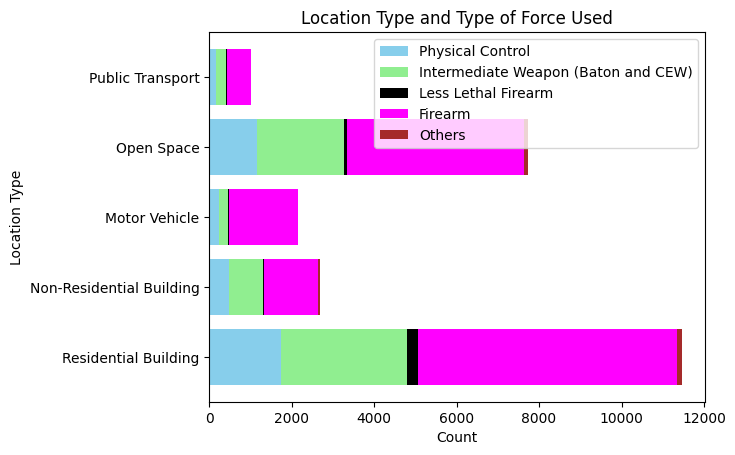

In [814]:
# Create a figure and an axis
fig, ax = plt.subplots()

# Start with the first category
ax.barh(df.index, df['Physical Control'], label='Physical Control', color='skyblue')
ax.barh(df.index, df['Intermediate Weapon (Baton and CEW)'], left=df['Physical Control'], label='Intermediate Weapon (Baton and CEW)',  color='lightgreen')
ax.barh(df.index, df['Less Lethal Firearm'], left=df['Physical Control'] + df['Intermediate Weapon (Baton and CEW)'], label='Less Lethal Firearm',  color='black')
ax.barh(df.index, df['Firearm'], left=df['Physical Control'] + df['Intermediate Weapon (Baton and CEW)']+df['Less Lethal Firearm'], label='Firearm',  color='magenta')
ax.barh(df.index, df['Others'], left=df['Physical Control'] + df['Intermediate Weapon (Baton and CEW)']+df['Less Lethal Firearm']+df['Firearm'], label='Others',  color='brown')

# Add labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Location Type')
ax.set_title('Location Type and Type of Force Used')

# Add a legend
ax.legend()

# Show the plot
plt.show()


### Type of Team

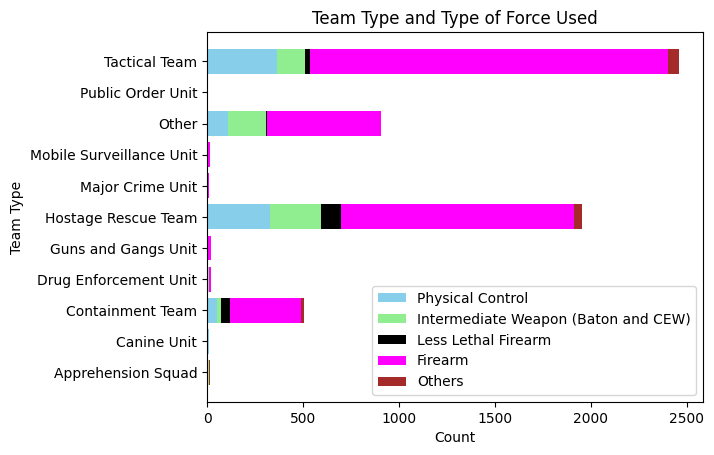

In [821]:
TypeTeamTypeOfForce = df_records.groupby('TypeTeam')[['Physical_combined','IntermediateWeapon_combined', 'LessLethalFirearm_combined', 'Firearm_combined', 'TypeForceUsed_Other_Check']].sum().reset_index()
TypeTeam = TypeTeamTypeOfForce['TypeTeam']
Physical_combined = TypeTeamTypeOfForce['Physical_combined']
IntermediateWeapon_combined = TypeTeamTypeOfForce['IntermediateWeapon_combined']
LessLethalFirearm_combined = TypeTeamTypeOfForce['LessLethalFirearm_combined']
Firearm_combined = TypeTeamTypeOfForce['Firearm_combined']
TypeForceUsed_Other_Check = TypeTeamTypeOfForce['TypeForceUsed_Other_Check']

fig, ax = plt.subplots()

# Plot the bars
ax.barh(TypeTeam, Physical_combined, label='Physical Control', color='skyblue')
ax.barh(TypeTeam, IntermediateWeapon_combined, left=Physical_combined, label='Intermediate Weapon (Baton and CEW)', color='lightgreen')
ax.barh(TypeTeam, LessLethalFirearm_combined, left=Physical_combined + IntermediateWeapon_combined, label='Less Lethal Firearm', color='black')
ax.barh(TypeTeam, Firearm_combined, left=Physical_combined + IntermediateWeapon_combined+LessLethalFirearm_combined, label='Firearm', color='magenta')
ax.barh(TypeTeam, TypeForceUsed_Other_Check, left=Physical_combined + IntermediateWeapon_combined+LessLethalFirearm_combined+Firearm_combined, label='Others', color='brown')


# Add labels and title
ax.set_ylabel('Team Type')
ax.set_xlabel('Count')
ax.set_title('Team Type and Type of Force Used')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [828]:
df_records.ReportType.unique()

array(['Individual', 'Team'], dtype=object)

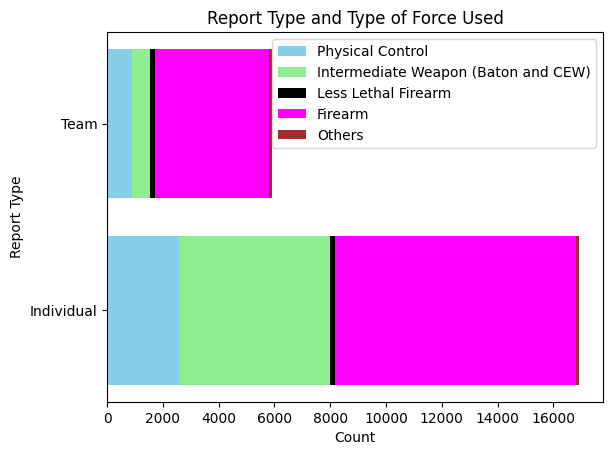

In [829]:
ReportTypeTypeOfForce = df_records.groupby('ReportType')[['Physical_combined','IntermediateWeapon_combined', 'LessLethalFirearm_combined', 'Firearm_combined', 'TypeForceUsed_Other_Check']].sum().reset_index()
ReportType = ReportTypeTypeOfForce['ReportType']
Physical_combined = ReportTypeTypeOfForce['Physical_combined']
IntermediateWeapon_combined = ReportTypeTypeOfForce['IntermediateWeapon_combined']
LessLethalFirearm_combined = ReportTypeTypeOfForce['LessLethalFirearm_combined']
Firearm_combined = ReportTypeTypeOfForce['Firearm_combined']
TypeForceUsed_Other_Check = ReportTypeTypeOfForce['TypeForceUsed_Other_Check']

fig, ax = plt.subplots()

# Plot the bars
ax.barh(ReportType, Physical_combined, label='Physical Control', color='skyblue')
ax.barh(ReportType, IntermediateWeapon_combined, left=Physical_combined, label='Intermediate Weapon (Baton and CEW)', color='lightgreen')
ax.barh(ReportType, LessLethalFirearm_combined, left=Physical_combined + IntermediateWeapon_combined, label='Less Lethal Firearm', color='black')
ax.barh(ReportType, Firearm_combined, left=Physical_combined + IntermediateWeapon_combined+LessLethalFirearm_combined, label='Firearm', color='magenta')
ax.barh(ReportType, TypeForceUsed_Other_Check, left=Physical_combined + IntermediateWeapon_combined+LessLethalFirearm_combined+Firearm_combined, label='Others', color='brown')


# Add labels and title
ax.set_ylabel('Report Type')
ax.set_xlabel('Count')
ax.set_title('Report Type and Type of Force Used')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [793]:
df_records.columns.tolist()

['BatchFileName',
 'Indiv_Index',
 'Race',
 'DifficultyPerceiving',
 'AgeCategory',
 'Gender',
 'DistanceBetweenOfficerAndIndividual',
 'ReasonUseOfForce_EffectArrest',
 'ReasonUseOfForce_PreventOffence',
 'ReasonUseOfForce_PreventEscape',
 'ReasonUseOfForce_ProtectOtherOfficers',
 'ReasonUseOfForce_ProtectPublic',
 'ReasonUseOfForce_ProtectSelf',
 'ReasonUseOfForce_ProtectIndividual',
 'ReasonUseOfForce_Unintentional',
 'ReasonUseOfForce_Other',
 'FactorsInfluenceResponse_NatureIncident',
 'FactorsInfluenceResponse_PastHistory',
 'FactorsInfluenceResponse_PhysicalSizeStrength',
 'FactorsInfluenceResponse_OtherFactors',
 'IndividualActions_ResistantPassive',
 'IndividualActions_ResistantActive',
 'IndividualActions_Assaultive',
 'IndividualActions_SeriousBodilyHarmDeath',
 'PerceiveAccessWeapon',
 'OfficerResponses_DirectionsToComply',
 'OfficerResponses_Comply',
 'OfficerResponses_AttemptDeescalation',
 'OfficerResponses_DeescalationTechniques_Communication',
 'OfficerResponses_Deesca

In [822]:
df_records.AssignmentType.unique()

array(['Patrol (e.g., general, foot, bicycle, ATV, snowmobile) ',
       'Tactical', 'Investigations (CIB, Major Crime)', 'Drugs', 'Other',
       'Prisoner Transportation/Care/Control',
       'Guns and Gangs, ROPE, Other Specialized Units', 'Traffic',
       'Targeted Community Response Units/Hostage Rescue', 'Canine',
       'Containment', 'Paid Duty', 'Administrative (e.g., station duty)',
       'Marine', 'Court Appearance', 'Off Duty', 'Public Order',
       'Court Security'], dtype=object)

In [825]:
df_records.InteractionType.unique()

array(['Interaction with Individual(s)'], dtype=object)

In [848]:
df_records.NumberIndividuals.unique()

array([2, 1, 3, 4, 5, 6, 11, 9, 7, 10, 8, 20, 18, 15], dtype=object)

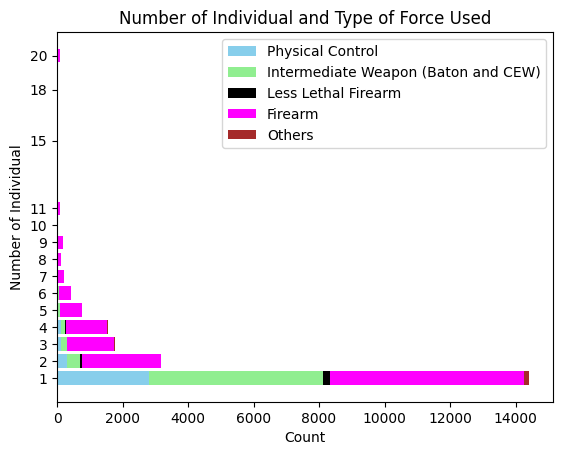

In [852]:
df_records['NumberIndividuals'] = df_records['NumberIndividuals'].astype('object')
NumberIndividualsTypeOfForce = df_records.groupby('NumberIndividuals')[['Physical_combined','IntermediateWeapon_combined', 'LessLethalFirearm_combined', 'Firearm_combined', 'TypeForceUsed_Other_Check']].sum().reset_index()
NumberIndividuals = NumberIndividualsTypeOfForce['NumberIndividuals']
Physical_combined = NumberIndividualsTypeOfForce['Physical_combined']
IntermediateWeapon_combined = NumberIndividualsTypeOfForce['IntermediateWeapon_combined']
LessLethalFirearm_combined = NumberIndividualsTypeOfForce['LessLethalFirearm_combined']
Firearm_combined = NumberIndividualsTypeOfForce['Firearm_combined']
TypeForceUsed_Other_Check = NumberIndividualsTypeOfForce['TypeForceUsed_Other_Check']

fig, ax = plt.subplots()

# Plot the bars
ax.barh(NumberIndividuals, Physical_combined, label='Physical Control', color='skyblue')
ax.barh(NumberIndividuals, IntermediateWeapon_combined, left=Physical_combined, label='Intermediate Weapon (Baton and CEW)', color='lightgreen')
ax.barh(NumberIndividuals, LessLethalFirearm_combined, left=Physical_combined + IntermediateWeapon_combined, label='Less Lethal Firearm', color='black')
ax.barh(NumberIndividuals, Firearm_combined, left=Physical_combined + IntermediateWeapon_combined+LessLethalFirearm_combined, label='Firearm', color='magenta')
ax.barh(NumberIndividuals, TypeForceUsed_Other_Check, left=Physical_combined + IntermediateWeapon_combined+LessLethalFirearm_combined+Firearm_combined, label='Others', color='brown')


# Add labels and title
ax.set_ylabel('Number of Individual')
ax.set_xlabel('Count')
ax.set_title('Number of Individual and Type of Force Used')
ax.set_yticks([2, 1, 3, 4, 5, 6, 11, 9, 7, 10, 8, 20, 18, 15])
# Add a legend
ax.legend()

# Show the plot
plt.show()

### Response of Individual

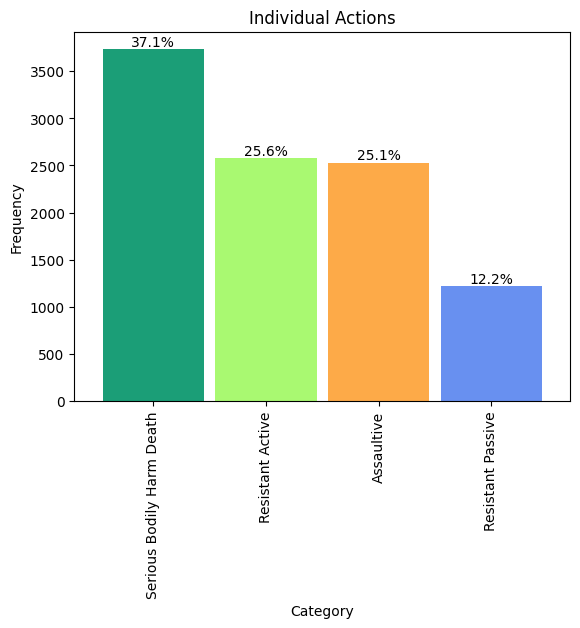

In [888]:
IndividualActions_cols = list(get_unique(df_records, 'IndividualActions_')[0].keys())
category_counts = df_records[IndividualActions_cols].sum().sort_values(ascending=False)
category_counts_index = [add_space_before_capitals(item.split('IndividualActions_')[1]) for item in category_counts.index]
# for between two _ we use this code s.split('_')[1].split('_')[0].strip('.')
category_counts.index = category_counts_index

# Plot
fig, ax = plt.subplots()
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0']
category_counts.plot(kind='bar', color=colors, width = 0.9)
plt.title('Individual Actions')
plt.xlabel('Category')
plt.ylabel('Frequency')

category_counts['val'] = category_counts.apply(lambda x: (x/category_counts.sum())*100)
labels = category_counts['val'].round(1).astype('str') + '%'
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    #ax.yaxis.set_major_formatter(mtick.PercentFormatter()) 
plt.show()

In [889]:
get_unique(df_records, 'IndividualActions_')[0].keys()

dict_keys(['IndividualActions_ResistantPassive', 'IndividualActions_ResistantActive', 'IndividualActions_Assaultive', 'IndividualActions_SeriousBodilyHarmDeath'])

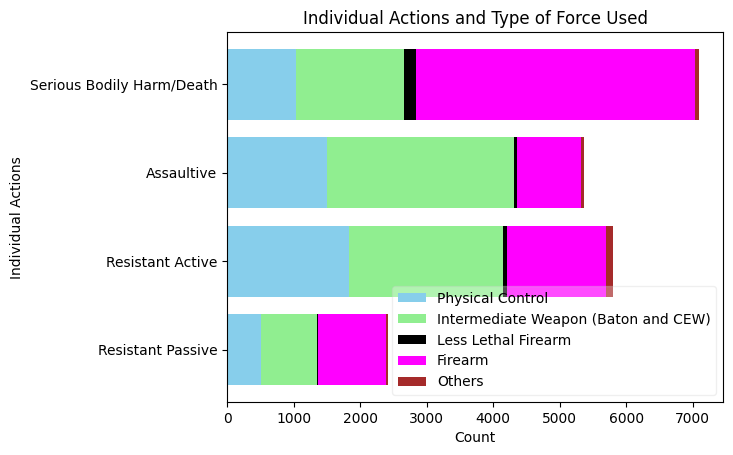

In [896]:
IndividualActions_ResistantPassive = df_records.groupby('IndividualActions_ResistantPassive')[['Physical_combined','IntermediateWeapon_combined', 'LessLethalFirearm_combined', 'Firearm_combined', 'TypeForceUsed_Other_Check']].sum().reset_index()
IndividualActions_ResistantActive = df_records.groupby('IndividualActions_ResistantActive')[['Physical_combined','IntermediateWeapon_combined', 'LessLethalFirearm_combined', 'Firearm_combined', 'TypeForceUsed_Other_Check']].sum().reset_index()
IndividualActions_Assaultive = df_records.groupby('IndividualActions_Assaultive')[['Physical_combined','IntermediateWeapon_combined', 'LessLethalFirearm_combined', 'Firearm_combined', 'TypeForceUsed_Other_Check']].sum().reset_index()
IndividualActions_SeriousBodilyHarmDeath = df_records.groupby('IndividualActions_SeriousBodilyHarmDeath')[['Physical_combined','IntermediateWeapon_combined', 'LessLethalFirearm_combined', 'Firearm_combined', 'TypeForceUsed_Other_Check']].sum().reset_index()


df1 = IndividualActions_ResistantPassive.iloc[:,1:]
df2 = IndividualActions_ResistantActive.iloc[:,1:]
df3 = IndividualActions_Assaultive.iloc[:,1:]
df4 = IndividualActions_SeriousBodilyHarmDeath.iloc[:,1:]

pieces = (df1, df2, df3, df4)
df=pd.concat(pieces)
df.index=['Resistant Passive', 'Resistant Active', 'Assaultive', 'Serious Bodily Harm/Death']

df.rename(columns={'Physical_combined':'Physical Control', 
                   'IntermediateWeapon_combined':'Intermediate Weapon (Baton and CEW)', 
                   'LessLethalFirearm_combined': 'Less Lethal Firearm', 
                   'Firearm_combined':'Firearm', 
                   'TypeForceUsed_Other_Check':'Others'}, inplace=True)

cols = ['Physical Control', 'Intermediate Weapon (Baton and CEW)', 'Less Lethal Firearm', 'Firearm', 'Others']

# Create a figure and an axis
fig, ax = plt.subplots()

# Start with the first category
ax.barh(df.index, df['Physical Control'], label='Physical Control', color='skyblue')
ax.barh(df.index, df['Intermediate Weapon (Baton and CEW)'], left=df['Physical Control'], label='Intermediate Weapon (Baton and CEW)',  color='lightgreen')
ax.barh(df.index, df['Less Lethal Firearm'], left=df['Physical Control'] + df['Intermediate Weapon (Baton and CEW)'], label='Less Lethal Firearm',  color='black')
ax.barh(df.index, df['Firearm'], left=df['Physical Control'] + df['Intermediate Weapon (Baton and CEW)']+df['Less Lethal Firearm'], label='Firearm',  color='magenta')
ax.barh(df.index, df['Others'], left=df['Physical Control'] + df['Intermediate Weapon (Baton and CEW)']+df['Less Lethal Firearm']+df['Firearm'], label='Others',  color='brown')

# Add labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Individual Actions')
ax.set_title('Individual Actions and Type of Force Used')

# Add a legend
ax.legend(framealpha=0.3)

# Show the plot
plt.show()



In [897]:
df_records.shape

(12805, 185)

In [905]:
InjuryTypeOfForce.drop([2])

,IndividualInjuries_PhysicalInjuriesIndividual,Physical_combined,IntermediateWeapon_combined,LessLethalFirearm_combined,Firearm_combined,TypeForceUsed_Other_Check
0,"Don't Know (e.g., individual fled/escaped)",23.0,29.0,4.0,71.0,0.0
1,Fatal,0.0,7.0,0.0,20.0,0.0
3,Yes,783.0,537.0,31.0,239.0,105.0


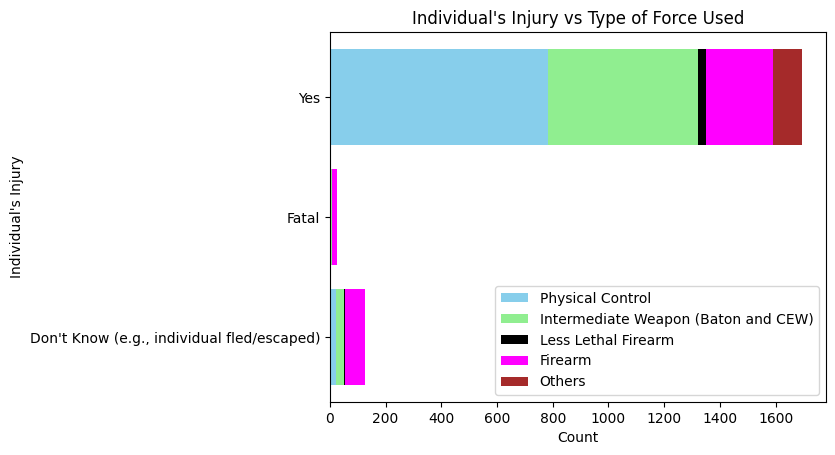

In [907]:
InjuryTypeOfForce = df_records.groupby('IndividualInjuries_PhysicalInjuriesIndividual')[['Physical_combined','IntermediateWeapon_combined', 'LessLethalFirearm_combined', 'Firearm_combined', 'TypeForceUsed_Other_Check']].sum().reset_index().drop([2])
IndividualInjuries_PhysicalInjuriesIndividual = InjuryTypeOfForce['IndividualInjuries_PhysicalInjuriesIndividual']
Physical_combined = InjuryTypeOfForce['Physical_combined']
IntermediateWeapon_combined = InjuryTypeOfForce['IntermediateWeapon_combined']
LessLethalFirearm_combined = InjuryTypeOfForce['LessLethalFirearm_combined']
Firearm_combined = InjuryTypeOfForce['Firearm_combined']
TypeForceUsed_Other_Check = InjuryTypeOfForce['TypeForceUsed_Other_Check']

fig, ax = plt.subplots()

# Plot the bars
ax.barh(IndividualInjuries_PhysicalInjuriesIndividual, Physical_combined, label='Physical Control', color='skyblue')
ax.barh(IndividualInjuries_PhysicalInjuriesIndividual, IntermediateWeapon_combined, left=Physical_combined, label='Intermediate Weapon (Baton and CEW)', color='lightgreen')
ax.barh(IndividualInjuries_PhysicalInjuriesIndividual, LessLethalFirearm_combined, left=Physical_combined + IntermediateWeapon_combined, label='Less Lethal Firearm', color='black')
ax.barh(IndividualInjuries_PhysicalInjuriesIndividual, Firearm_combined, left=Physical_combined + IntermediateWeapon_combined+LessLethalFirearm_combined, label='Firearm', color='magenta')
ax.barh(IndividualInjuries_PhysicalInjuriesIndividual, TypeForceUsed_Other_Check, left=Physical_combined + IntermediateWeapon_combined+LessLethalFirearm_combined+Firearm_combined, label='Others', color='brown')


# Add labels and title
ax.set_ylabel("Individual's Injury")
ax.set_xlabel('Count')
ax.set_title("Individual's Injury vs Type of Force Used")

# Add a legend
ax.legend()

# Show the plot
plt.show()

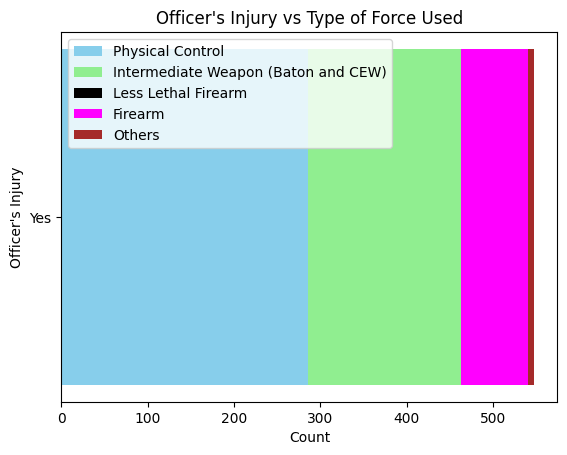

In [911]:
InjuryOfficerTypeOfForce = df_records.groupby('OfficerInvolvedInjuries_PhysicalInjuries')[['Physical_combined','IntermediateWeapon_combined', 'LessLethalFirearm_combined', 'Firearm_combined', 'TypeForceUsed_Other_Check']].sum().reset_index().drop([0])
OfficerInvolvedInjuries_PhysicalInjuries = InjuryOfficerTypeOfForce['OfficerInvolvedInjuries_PhysicalInjuries']
Physical_combined = InjuryOfficerTypeOfForce['Physical_combined']
IntermediateWeapon_combined = InjuryOfficerTypeOfForce['IntermediateWeapon_combined']
LessLethalFirearm_combined = InjuryOfficerTypeOfForce['LessLethalFirearm_combined']
Firearm_combined = InjuryOfficerTypeOfForce['Firearm_combined']
TypeForceUsed_Other_Check = InjuryOfficerTypeOfForce['TypeForceUsed_Other_Check']

fig, ax = plt.subplots()

# Plot the bars
ax.barh(OfficerInvolvedInjuries_PhysicalInjuries, Physical_combined, label='Physical Control', color='skyblue')
ax.barh(OfficerInvolvedInjuries_PhysicalInjuries, IntermediateWeapon_combined, left=Physical_combined, label='Intermediate Weapon (Baton and CEW)', color='lightgreen')
ax.barh(OfficerInvolvedInjuries_PhysicalInjuries, LessLethalFirearm_combined, left=Physical_combined + IntermediateWeapon_combined, label='Less Lethal Firearm', color='black')
ax.barh(OfficerInvolvedInjuries_PhysicalInjuries, Firearm_combined, left=Physical_combined + IntermediateWeapon_combined+LessLethalFirearm_combined, label='Firearm', color='magenta')
ax.barh(OfficerInvolvedInjuries_PhysicalInjuries, TypeForceUsed_Other_Check, left=Physical_combined + IntermediateWeapon_combined+LessLethalFirearm_combined+Firearm_combined, label='Others', color='brown')


# Add labels and title
ax.set_ylabel("Officer's Injury")
ax.set_xlabel('Count')
ax.set_title("Officer's Injury vs Type of Force Used")

# Add a legend
ax.legend()

# Show the plot
plt.show()